# E-commerce — Выявление профилей потребления  

Данное исследование проводится для интернет-магазина товаров для дома «Пока все ещё тут».  

**Задача:**  
- Сегментация покупателей по профилю потребления.

**Этапы исследования:**  
- проведение исследовательского анализ данных  
- сегментация покупателей на основе истории их покупок (что покупают, сегментация товаров на основе принадлежности к той или иной категории)  
- выдвижение вариантов сегментации покупателей  
- формулировка и проверка статистических гипотез

**Цель:**  
- помощь в разработке более персонализированных предложений для покупателей.  

Для данного исследования используются данные предоставленные магазином.

**Описание данных:**  
Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».  
Колонки в ecom_dataset_upd.csv :  
date — дата заказа;  
customer_id — идентификатор покупателя;  
order_id — идентификатор заказа;  
product — наименование товара;  
quantity — количество товара в заказе;  
price — цена товара.  

**Результатом исследования станут:**  
Полный отчет в формате ipynb (jupiter notebook)  
Презентация в формате PDF    
Дашборд в Tableau Public

**План исследования:**
1. Предварительный обзор данных и предобработка:  
- проверка типов
- выявление дубликатов (явные)  
- выявление пропусков  
- оценка на аномалии и выбросы  
- обзор данных: содержание столбцов, уникальные значения и проч. 

2. Подготовка и переработка:  
По результатам первого этапа, в случае необходимости и возможности:  
- приведение наименований столбцов к змеиному стилю, приведение к единому стилю содержания столбцов с текстовой информацией  
- изменение типов  
- удаление дубликатов (явных, + проверка на скрытые, их удаление)
- заполнение/восстановление пропусков  
- обработка аномалий и выбросов  
- добавление необходимых столбцов и рассчетов (категоризация товаров и т.п.)  
 
3. Исследовательский анализ.  
- изучение основных показателей распределение/динамика: выручка, средний чек, среднее количество товаров в чеке, среднее количество заказов на пользователя, средняя частота покупок
- исследование основных категорий товаров по стоимости/принадлежности к товарным группам/спросу 

4. Сегментация пользователей и исследование товарных предпочтений
- RFM анализ:
распределим покупателей на сегменты с учётом времени с момента последнего приобретения (Recency), частоты покупок (Frequency) и суммы потраченных средств (Monetary)
- исследование товарных предпочтений покупателей
- подведение итогов  

5. Формулировка и проверка статистических гипотез  

В первом тесте попробуем провести сравнение сегментов по среднему чеку  
H0: между сегментами нет статистически значимых различий  
H1: между сегментами имеются статистически значимые различия

Во втором проверим значимость различий в количестве покупок  
H0: между сенментами нет статистически значимых различий по количеству покупок  
H1: между сенментами имеются статистически значимые различия по количеству покупок  

6. Подведение итогов исследования
- общая информационная сводка  
- описание выявленых сегментов  
- разработка рекомендаций по работе с сегментами

## Преддварительный обзор данных  и предобработка

- проверка типов
- выявление дубликатов (явные)  
- выявление пропусков  
- оценка на аномалии и выбросы  
- обзор данных: содержание столбцов, уникальные значения и проч.  

In [1412]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

import math as mth
from scipy import stats as st

#скроем предупреждения
import warnings
warnings.filterwarnings("ignore")

In [1413]:
#распаковка файла с данными
try:
    data = pd.read_csv('C:/Users/Александра/Documents/education/data_analytics/projects/final_project/ecom_dataset_upd.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

data.head(10)

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
5  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
6  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
7  2018100108  375e0724-f033-4c76-b579-84969cf38ee2     68479   
8  2018100108  6644e5b4-9934-4863-9778-aaa125207701     68478   
9  2018100109  c971fb21-d54c-4134-938f-16b62ee86d3b     68480   

                                             product  quantity  price  
0    Комнатное растение в горшке Алое Вера, d12, h30         1  142.0  
1  Комнатное растение в горшке Кофе Арабика, d12,...         1  194.0  
2                        Радермахера d-12 см h-20 см         1  112.0  
3                   Хризолидокарпус Лутесценс d-9 см         1  179.0  
4                     Циперус Зумула d-12 см h-25 см         1  112.0  
5                            Шеффлера Лузеана d-9 см         1  164.0  
6                   Юкка нитчатая d-12 см h-25-35 см         1  134.0  
7    Настенная сушилка для белья Gimi Brio Super 100         1  824.0  
8  Таз пластмассовый 21,0 л круглый "Водолей" С61...         1  269.0  
9  Чехол для гладильной доски Colombo Persia Beig...         1  674.0

In [1414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Дата сет содержит 7474 строк, 6 колонок.  
Пропуски остутствуют.  
Требуется изменение типа столбца с датой, остальные соответствую содержанию.   
Наименования столбцов соответствуют змеиному стилю.  
Столбец с наименованиями продуктов может содержать разночтения в написании: приведем содержание к нижнему регистру и заменим возможные ошибки.

### Проверка и изменение типов, корректировка содержания столбца product

In [1415]:
#приводим столбец с информацией о датах к типу datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

#приведем содержание столбца с наименованиями товаров к нижнему регистру и изменим возможные ошибки
data['product'] = data['product'].str.lower()
data['product'] = data['product'].str.replace('ё', 'е')

#проверяем внесенные изменения
data.tail()

date                           customer_id  order_id  \
7469 2020-01-30 21:00:00  63208953-a8e4-4f77-9b47-3a46e7b72eee    104002   
7470 2020-01-30 22:00:00  d99d25f1-4017-4fcd-8d29-c580cc695a1a    107336   
7471 2020-01-31 02:00:00  2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6    106336   
7472 2020-01-31 12:00:00  cdd17932-623e-415f-a577-3b31312fd0e2    102002   
7473 2020-01-31 15:00:00  2e460a26-35af-453d-a369-a036e95a40e0    103225   

                                                product  quantity  price  
7469  томата (помидор) черниченский черри № 116 сорт...         2   38.0  
7470         дендробиум санок анна грин 1 ствол d-12 см         1  869.0  
7471  подставка для обуви резиновая attribute 80x40 ...         1  354.0  
7472  тагетис крупноцветковый рассада однолетних цве...         1  128.0  
7473  вешалка для блузок 41 см красный attribute ahm781         1  104.0

### Проверка пропусков  

In [1416]:
#проверка на пропуски
print(data.isna().sum())
pd.DataFrame(data.isna().mean()*100).sort_values(by=0, ascending=False).style.background_gradient('coolwarm')

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64


Как и было выведено в общей информации пропуки не обнаружены.

### Выявление дубликатов и предобработка 
#### Явные дубликаты

In [1417]:
#проверка на дубликаты
print('Количество явных дубликатов:', data.duplicated().sum())
print('Доля явных дубликатов:', round(data.duplicated().sum()/len(data),4))

Количество явных дубликатов: 0
Доля явных дубликатов: 0.0


Явных дубликатов не обнаружено.

#### Неявные дубликаты

Так как номер заказа уникален, то заказ может быть сделан только в одну дату и одним пользователем. 
Проверяем:  
- есть ли дубликаты заказов, относящихся к разным датам  
- есть ли дубликаты заказов, относящихся к нескольким пользователям.

In [1418]:
#выявляем order_id, у которых больше 1 уникальной даты
orders_days_not_unique = data.groupby(['order_id']).agg({'date':'nunique'}).query('date > 1').reset_index()
orders_days_not_unique

order_id  date
0       13547     7
1       14500     4
2       14504     2
3       14505     2
4       14521     6
..        ...   ...
279     73101     2
280     73104     3
281     73108     2
282     73136     3
283     73137     2

[284 rows x 2 columns]

In [1419]:
#выявляем order_id, у которых больше 1 уникального клиента
orders_customers_not_unique = data.groupby(['order_id']).agg({'customer_id':'nunique'}).query('customer_id > 1').reset_index()
orders_customers_not_unique

order_id  customer_id
0      14872            2
1      68785            2
2      69283            2
3      69310            2
4      69345            2
5      69410            2
6      69485            3
7      69531            2
8      69833            2
9      70114            2
10     70542            2
11     70631            2
12     70726            2
13     70808            2
14     70903            2
15     70946            2
16     71054            2
17     71226            2
18     71461            2
19     71480            3
20     71542            2
21     71571            2
22     71648            2
23     71663            2
24     72188            2
25     72778            2
26     72790            2
27     72845            4
28     72950            2

У некоторых заказов присутствует несколько дат и клиентов.

In [1420]:
# проверяем один из id заказа из неуникальных дат
data.query('order_id == 13547').sort_values(by=['date'])

date                           customer_id  order_id  \
102 2018-10-05 00:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
103 2018-10-05 00:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
104 2018-10-05 00:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
376 2018-10-23 13:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
377 2018-10-23 13:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
378 2018-10-23 13:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
509 2018-10-28 19:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
510 2018-10-28 19:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
511 2018-10-28 19:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
590 2018-11-02 14:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
589 2018-11-02 14:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
588 2018-11-02 14:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
758 2018-11-10 17:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
759 2018-11-10 17:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
760 2018-11-10 17:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
816 2018-11-15 15:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
817 2018-11-15 15:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
818 2018-11-15 15:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
827 2018-11-16 16:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
828 2018-11-16 16:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   
829 2018-11-16 16:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62     13547   

                                               product  quantity  price  
102  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
103  рассада зелени для кухни розмарина в кассете п...         1  207.0  
104  рассада зелени для кухни тимьяна в кассете по ...         1  162.0  
376  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
377  рассада зелени для кухни розмарина в кассете п...         1  207.0  
378  рассада зелени для кухни тимьяна в кассете по ...         1  162.0  
509  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
510  рассада зелени для кухни розмарина в кассете п...         1  207.0  
511  рассада зелени для кухни тимьяна в кассете по ...         1  162.0  
590  рассада зелени для кухни тимьяна в кассете по ...         1  162.0  
589  рассада зелени для кухни розмарина в кассете п...         1  207.0  
588  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
758  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
759  рассада зелени для кухни розмарина в кассете п...         1  207.0  
760  рассада зелени для кухни тимьяна в кассете по ...         1  162.0  
816  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
817  рассада зелени для кухни розмарина в кассете п...         1  207.0  
818  рассада зелени для кухни тимьяна в кассете по ...         1  162.0  
827  рассада зелени для кухни лаванды в кассете по ...         1  315.0  
828  рассада зелени для кухни розмарина в кассете п...         1  207.0  
829  рассада зелени для кухни тимьяна в кассете по ...         1  162.0

Заказ оформленный в несколько разных дат имеет повторяющиеся товарные наименования. Мы не знаем наверняка когда именно была совершена покупка, так же не имел ли место повтор заказа. Т.к. мы предполагаем, что id заказа уникален, то можно предположить, что имеет место техническая ошибка, например, заказ был оформлен в одно время, и тогда же был зафиксирован переход в оплату, а фактически оплата произошла в другую дату.  

In [1421]:
# проверяем один из id заказа из неуникальных клиентов
data.query('order_id == 72845')

date                           customer_id  order_id  \
6504 2019-10-03 14:00:00  d8465f63-35db-4809-aff3-a8f7ebfc257f     72845   
6505 2019-10-03 15:00:00  0309d37c-ab5f-4793-ba72-5484c019b840     72845   
6508 2019-10-04 08:00:00  25a8cd52-3efa-48ee-a6bd-d413d7e2b42f     72845   
6538 2019-10-07 20:00:00  2ac05362-3ca7-4d19-899c-7ba266902611     72845   

                                   product  quantity  price  
6504  муляж яблоко зеленый 9 см полиуретан        40   59.0  
6505  муляж яблоко зеленый 9 см полиуретан        40   59.0  
6508  муляж яблоко зеленый 9 см полиуретан        40   59.0  
6538  муляж яблоко зеленый 9 см полиуретан        40   59.0

In [1422]:
# проверяем один из id заказа из неуникальных клиентов
data.query('order_id == 71480')

date                           customer_id  order_id  \
3963 2019-05-21 02:00:00  4bd9c1e8-b2cc-4ec5-97eb-28d8f3c22d8d     71480   
4025 2019-05-24 22:00:00  d8080f8f-3685-433b-b416-beb0a8f06606     71480   
4026 2019-05-25 02:00:00  51f04abe-a71a-4694-87b7-ad9ef4930e51     71480   

                                                product  quantity  price  
3963  мята перечная шоколадная chocolate d-7 см h-10...         1   74.0  
4025  мята перечная шоколадная chocolate d-7 см h-10...         1   74.0  
4026  мята перечная шоколадная chocolate d-7 см h-10...         1   74.0

Заказы с неуникальным ID клиента так же имеют разные даты. 

In [1423]:
print('Количество дубликатов по всем столбцам кроме даты:', data.duplicated(subset=['order_id','customer_id','product','quantity','price']).sum())
print('Доля дубликатов по всем столбцам кроме даты:', data.duplicated(subset=['order_id','customer_id','product','quantity','price']).sum()/len(data))

Количество дубликатов по всем столбцам кроме даты: 1864
Доля дубликатов по всем столбцам кроме даты: 0.24939791276424939


In [1424]:
print('Количество дубликатов по всем столбцам кроме клиентского ID:', data.duplicated(subset=['order_id','date','product','quantity','price']).sum())
print('Доля дубликатов по всем столбцам кроме клиентского ID:', data.duplicated(subset=['order_id','date','product','quantity','price']).sum()/len(data))

Количество дубликатов по всем столбцам кроме клиентского ID: 1
Доля дубликатов по всем столбцам кроме клиентского ID: 0.0001337971635001338


Сначла очистим сет от дублирующихся заказов с разными датами. Т.к. нас интересует поведение клиентов в разрезе рекламы, нам нужно понять на что в первую очередь реагировали клиенты, поэтому отфильтруем данные оставив первую запись каждого id заказа и продукта.

In [1425]:
#сбрасываем неявные дубликаты с разным временем заказа, оставляя первую запись
data = data.drop_duplicates(subset=['order_id','customer_id','product','quantity','price'], keep='last')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 306.8+ KB


In [1426]:
#сбрасываем неявные дубликаты с разными клиентами, оставляя последнюю запись
data = data.drop_duplicates(subset=['order_id','date','product','quantity','price'], keep='last')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5609 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5609 non-null   datetime64[ns]
 1   customer_id  5609 non-null   object        
 2   order_id     5609 non-null   int64         
 3   product      5609 non-null   object        
 4   quantity     5609 non-null   int64         
 5   price        5609 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 306.7+ KB


In [1427]:
#Проверим дубликаты повторно
print('Количество дубликатов по всем столбцам кроме даты:', data.duplicated(subset=['order_id','customer_id','product','quantity','price']).sum())
print('Доля дубликатов по всем столбцам кроме даты:', data.duplicated(subset=['order_id','customer_id','product','quantity','price']).sum()/len(data))
print('Количество дубликатов по всем столбцам кроме клиентского ID:', data.duplicated(subset=['order_id','date','product','quantity','price']).sum())
print('Доля дубликатов по всем столбцам кроме клиентского ID:', data.duplicated(subset=['order_id','date','product','quantity','price']).sum()/len(data))

Количество дубликатов по всем столбцам кроме даты: 0
Доля дубликатов по всем столбцам кроме даты: 0.0
Количество дубликатов по всем столбцам кроме клиентского ID: 0
Доля дубликатов по всем столбцам кроме клиентского ID: 0.0


In [1428]:
#проверем order_id, у которых больше 1 уникальной даты
orders_days_not_unique = data.groupby(['order_id']).agg({'date':'nunique'}).query('date > 1').reset_index()
display(orders_days_not_unique)
print('Количество заказов с неуникальной датой:', len(orders_days_not_unique))
print('Варианты количества дат:', orders_days_not_unique['date'].unique())

order_id  date
0      14500     2
1      14541     2
2      14649     2
3      14833     2
4      14872     2
5      14897     2
6      68760     3
7      68785     2
8      68814     2
9      69282     2
10     69283     2
11     69310     2
12     69345     2
13     69410     2
14     69485     3
15     69527     2
16     69531     2
17     69750     2
18     69807     2
19     69833     2
20     69861     2
21     70031     2
22     70114     2
23     70186     2
24     70318     2
25     70463     2
26     70542     2
27     70631     2
28     70726     2
29     70742     2
30     70769     2
31     70808     2
32     70903     2
33     70946     2
34     70995     2
35     71054     2
36     71143     2
37     71148     2
38     71226     2
39     71341     2
40     71413     2
41     71426     2
42     71461     2
43     71480     3
44     71542     2
45     71648     2
46     71663     2
47     71939     2
48     72188     2
49     72517     2
50     72778     2
51     72790     2
52     72845     4
53     72950     2

Количество заказов с неуникальной датой: 54
Варианты количества дат: [2 3 4]


In [1429]:
data.query('order_id == 14649')

date                           customer_id  order_id  \
2874 2019-04-16 13:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2891 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2892 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2893 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2894 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2895 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2896 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2897 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2898 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2899 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2900 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2901 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2902 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2903 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2904 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   

                                                product  quantity  price  
2874  виола рассада однолетних цветов в кассете по 1...         1  210.0  
2891  бакопа ампельная махровая сиреневая махровая о...         1   90.0  
2892  бакопа ампельная махровая фиолетовая махровая ...         1   90.0  
2893  газания рассада однолетних цветов в кассете по...         1  210.0  
2894  калибрахоа aloha double purple сиреневая махро...         1   90.0  
2895   калибрахоа aloha tiki neon малиновая объем 0,5 л         1   90.0  
2896  калибрахоа bloomtastic blossom розово-сиренева...         1   90.0  
2897  калибрахоа mini famous double red красная махр...         1   90.0  
2898  калибрахоа rave violet сиреневая звезда объем ...         1   90.0  
2899  калибрахоа sweet bells double golden желтая ма...         1   90.0  
2900  львиный зев рассада однолетних цветов в кассет...         1  128.0  
2901  петуния махровая рассада однолетних цветов в к...         1  210.0  
2902  петуния surprice yellow желтая с прожилками об...         1   90.0  
2903   петуния sweetunia black satin черная объем 0,5 л         1   90.0  
2904  томата (помидор) баскью блю №7 сорт детерминан...         1   38.0

In [1430]:
data.query('customer_id == "0184f535-b60a-4914-a982-231e3f615206" & order_id ==14649').sort_values(by=['product','date'])

date                           customer_id  order_id  \
2891 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2892 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2874 2019-04-16 13:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2893 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2894 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2895 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2896 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2897 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2898 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2899 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2900 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2902 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2903 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2901 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2904 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   

                                                product  quantity  price  
2891  бакопа ампельная махровая сиреневая махровая о...         1   90.0  
2892  бакопа ампельная махровая фиолетовая махровая ...         1   90.0  
2874  виола рассада однолетних цветов в кассете по 1...         1  210.0  
2893  газания рассада однолетних цветов в кассете по...         1  210.0  
2894  калибрахоа aloha double purple сиреневая махро...         1   90.0  
2895   калибрахоа aloha tiki neon малиновая объем 0,5 л         1   90.0  
2896  калибрахоа bloomtastic blossom розово-сиренева...         1   90.0  
2897  калибрахоа mini famous double red красная махр...         1   90.0  
2898  калибрахоа rave violet сиреневая звезда объем ...         1   90.0  
2899  калибрахоа sweet bells double golden желтая ма...         1   90.0  
2900  львиный зев рассада однолетних цветов в кассет...         1  128.0  
2902  петуния surprice yellow желтая с прожилками об...         1   90.0  
2903   петуния sweetunia black satin черная объем 0,5 л         1   90.0  
2901  петуния махровая рассада однолетних цветов в к...         1  210.0  
2904  томата (помидор) баскью блю №7 сорт детерминан...         1   38.0

In [1431]:
data.query('order_id == 69485')

date                           customer_id  order_id  \
1282 2018-12-20 16:00:00  5be0f4b4-947f-4672-b147-73ef5936ecd4     69485   
1292 2018-12-21 11:00:00  266beb08-ec9b-43b4-89bb-ac60fa23ffee     69485   
1384 2018-12-26 23:00:00  e0461045-4fcc-4731-8837-509f6534512a     69485   

                                                product  quantity   price  
1282  набор столовых приборов 24 предмета saint germ...         1  1087.0  
1292  набор столовых приборов 24 предмета farandole ...         1  1274.0  
1384  набор столовых приборов 24 предмета farandole ...         1  1274.0

In [1432]:
data.query('order_id == 72517')

date                           customer_id  order_id  \
6258 2019-09-05 14:00:00  51851f8e-e239-4e31-ab2c-4b67ab2c76da     72517   
6263 2019-09-05 22:00:00  51851f8e-e239-4e31-ab2c-4b67ab2c76da     72517   

                                            product  quantity  price  
6258     бальзамин новогвинейский d-13 см лососевый         1  134.0  
6263  бальзамин новогвинейский d-13 см ярко красный         1  134.0

In [1433]:
#проверяем order_id, у которых больше 1 уникального клиента
orders_customers_not_unique = data.groupby(['order_id']).agg({'customer_id':'nunique'}).query('customer_id > 1').reset_index()
display(orders_customers_not_unique)
print('Количество заказов с неуникальной датой:', len(orders_customers_not_unique))
print('Варианты количества дат:', orders_customers_not_unique['customer_id'].unique())

order_id  customer_id
0      14872            2
1      68785            2
2      69283            2
3      69310            2
4      69345            2
5      69410            2
6      69485            3
7      69531            2
8      69833            2
9      70114            2
10     70542            2
11     70631            2
12     70726            2
13     70808            2
14     70903            2
15     70946            2
16     71054            2
17     71226            2
18     71461            2
19     71480            3
20     71542            2
21     71648            2
22     71663            2
23     72188            2
24     72778            2
25     72790            2
26     72845            4
27     72950            2

Количество заказов с неуникальной датой: 28
Варианты количества дат: [2 3 4]


In [1434]:
data.query('order_id == 69485')

date                           customer_id  order_id  \
1282 2018-12-20 16:00:00  5be0f4b4-947f-4672-b147-73ef5936ecd4     69485   
1292 2018-12-21 11:00:00  266beb08-ec9b-43b4-89bb-ac60fa23ffee     69485   
1384 2018-12-26 23:00:00  e0461045-4fcc-4731-8837-509f6534512a     69485   

                                                product  quantity   price  
1282  набор столовых приборов 24 предмета saint germ...         1  1087.0  
1292  набор столовых приборов 24 предмета farandole ...         1  1274.0  
1384  набор столовых приборов 24 предмета farandole ...         1  1274.0

In [1435]:
sorted(data.query('order_id == 69485')['product'])

['набор столовых приборов 24 предмета farandole domenik dm9635',
 'набор столовых приборов 24 предмета farandole domenik dm9635',
 'набор столовых приборов 24 предмета saint germain domenik dm9638']

In [1436]:
data.query('customer_id =="5be0f4b4-947f-4672-b147-73ef5936ecd4"')

date                           customer_id  order_id  \
1282 2018-12-20 16:00:00  5be0f4b4-947f-4672-b147-73ef5936ecd4     69485   
6883 2019-11-22 01:00:00  5be0f4b4-947f-4672-b147-73ef5936ecd4    108188   

                                                product  quantity   price  
1282  набор столовых приборов 24 предмета saint germ...         1  1087.0  
6883                    сушилка для белья ника сб2 20 м         1   742.0

In [1437]:
data.query('customer_id =="266beb08-ec9b-43b4-89bb-ac60fa23ffee"')

date                           customer_id  order_id  \
1292 2018-12-21 11:00:00  266beb08-ec9b-43b4-89bb-ac60fa23ffee     69485   

                                                product  quantity   price  
1292  набор столовых приборов 24 предмета farandole ...         1  1274.0

In [1438]:
data.query('customer_id =="e0461045-4fcc-4731-8837-509f6534512a"')

date                           customer_id  order_id  \
1384 2018-12-26 23:00:00  e0461045-4fcc-4731-8837-509f6534512a     69485   

                                                product  quantity   price  
1384  набор столовых приборов 24 предмета farandole ...         1  1274.0

In [1439]:
data.query('order_id == 72845')

date                           customer_id  order_id  \
6504 2019-10-03 14:00:00  d8465f63-35db-4809-aff3-a8f7ebfc257f     72845   
6505 2019-10-03 15:00:00  0309d37c-ab5f-4793-ba72-5484c019b840     72845   
6508 2019-10-04 08:00:00  25a8cd52-3efa-48ee-a6bd-d413d7e2b42f     72845   
6538 2019-10-07 20:00:00  2ac05362-3ca7-4d19-899c-7ba266902611     72845   

                                   product  quantity  price  
6504  муляж яблоко зеленый 9 см полиуретан        40   59.0  
6505  муляж яблоко зеленый 9 см полиуретан        40   59.0  
6508  муляж яблоко зеленый 9 см полиуретан        40   59.0  
6538  муляж яблоко зеленый 9 см полиуретан        40   59.0

После повторной проверки на неявные дубликаты обнаружились заказы, по прежнему имеющие несколько дат или пользователей, однако в них в них отличаются товары. Следуя той же логике, что нас интересует первое вхождение, оставим заказы с первой датой и первым набором товаров.  
Причина появления таких заказов скорее вего техническая, например пользователей оформил заказ и перешел в оплату, но не заплатил, спустя время снова зашел и продолжил оформлять тот же заказ но изменил отдельные товары

Запишем таблицу которую будет использовать как фильтр, где для каждого заказа будет максимальная дата, которую мы принимаем за настоящую дату совершения заказа.

In [1440]:
#записываем таблицу со всеми order_id и его последней датой
order_date = data.groupby(['order_id'])['date'].max().reset_index()
order_date.columns = (['order_id','true_date'])
order_date.query('order_id == 14649').sort_values(by=['true_date'])

order_id           true_date
108     14649 2019-04-16 16:00:00

In [1441]:
#присоединяем таблицу к основному сету
data = data.merge(order_date, on=['order_id'], how='left')

In [1442]:
data.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

   true_date  
0 2018-10-01  
1 2018-10-01  
2 2018-10-01  
3 2018-10-01  
4 2018-10-01

In [1443]:
#фильтруем датафрейм, оставляя только те записи в которых совпадает дата и дата из столбца true_date (настоящая)
data = data.query('date == true_date')
#проверем order_id, у которых больше 1 уникальной даты
orders_days_not_unique = data.groupby(['order_id']).agg({'date':'nunique'}).query('date > 1').reset_index()
print(orders_days_not_unique)
#выявляем order_id, у которых больше 1 уникального клиента
orders_customers_not_unique = data.groupby(['order_id']).agg({'customer_id':'nunique'}).query('customer_id > 1').reset_index()
orders_customers_not_unique

Empty DataFrame
Columns: [order_id, date]
Index: []


Empty DataFrame
Columns: [order_id, customer_id]
Index: []

In [1444]:
#проверяем один из заказов в которых была ошибка
data.query('customer_id == "0184f535-b60a-4914-a982-231e3f615206" & order_id ==14649').sort_values(by=['date'])

date                           customer_id  order_id  \
2457 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2458 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2459 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2460 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2461 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2462 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2463 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2464 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2465 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2466 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2467 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2468 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2469 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   
2470 2019-04-16 16:00:00  0184f535-b60a-4914-a982-231e3f615206     14649   

                                                product  quantity  price  \
2457  бакопа ампельная махровая сиреневая махровая о...         1   90.0   
2458  бакопа ампельная махровая фиолетовая махровая ...         1   90.0   
2459  газания рассада однолетних цветов в кассете по...         1  210.0   
2460  калибрахоа aloha double purple сиреневая махро...         1   90.0   
2461   калибрахоа aloha tiki neon малиновая объем 0,5 л         1   90.0   
2462  калибрахоа bloomtastic blossom розово-сиренева...         1   90.0   
2463  калибрахоа mini famous double red красная махр...         1   90.0   
2464  калибрахоа rave violet сиреневая звезда объем ...         1   90.0   
2465  калибрахоа sweet bells double golden желтая ма...         1   90.0   
2466  львиный зев рассада однолетних цветов в кассет...         1  128.0   
2467  петуния махровая рассада однолетних цветов в к...         1  210.0   
2468  петуния surprice yellow желтая с прожилками об...         1   90.0   
2469   петуния sweetunia black satin черная объем 0,5 л         1   90.0   
2470  томата (помидор) баскью блю №7 сорт детерминан...         1   38.0   

               true_date  
2457 2019-04-16 16:00:00  
2458 2019-04-16 16:00:00  
2459 2019-04-16 16:00:00  
2460 2019-04-16 16:00:00  
2461 2019-04-16 16:00:00  
2462 2019-04-16 16:00:00  
2463 2019-04-16 16:00:00  
2464 2019-04-16 16:00:00  
2465 2019-04-16 16:00:00  
2466 2019-04-16 16:00:00  
2467 2019-04-16 16:00:00  
2468 2019-04-16 16:00:00  
2469 2019-04-16 16:00:00  
2470 2019-04-16 16:00:00

В датасете не осталось неявных дубликатов, можем удалить вспомогательный столбец.

In [1445]:
data = data.drop(columns=['true_date'])

In [1446]:
#посчитаем долю удаленных данных, в исходном ДС было 7474 строки
print('Доля удаленных строк:', round(100 - len(data)/7474*100,2))

Доля удаленных строк: 26.18


In [1447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5608
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5517 non-null   datetime64[ns]
 1   customer_id  5517 non-null   object        
 2   order_id     5517 non-null   int64         
 3   product      5517 non-null   object        
 4   quantity     5517 non-null   int64         
 5   price        5517 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 301.7+ KB


Проверка на скрытые дубликаты показала наличие заказов с одним id на несколько дат или пользователей. После удаления скрытых дубликатов удалось сохранить 5517 строк. Было удалено 26.18% данных  
Если на сайте присутствует кнопка "повторить заказ", то стоит проверить, не отправляет ли система повторные заказы покупателей  того же набора товаров под тем же id заказа. Возможно датасет содержал объединенные данные из нескольких источников. Так же следует проверить как именно фиксируется время заказа, например, не считается переход в оплату фиксацией заказа. Так же следует проверить, если на сайте имеется кнопка повторить заказ, генерирует ли она новый id заказа или фиксирует прежний.

### Оценка на аномалии и выбросы  

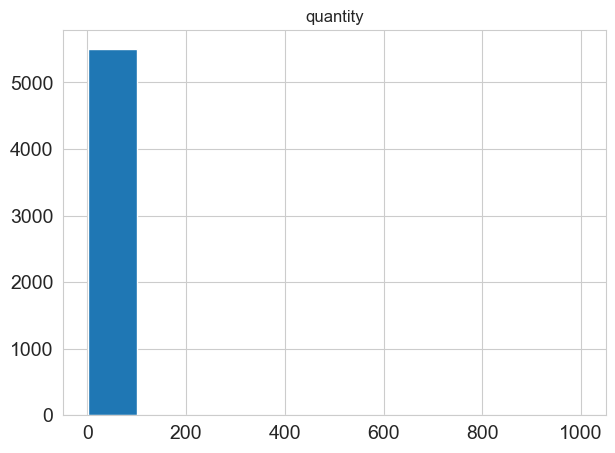

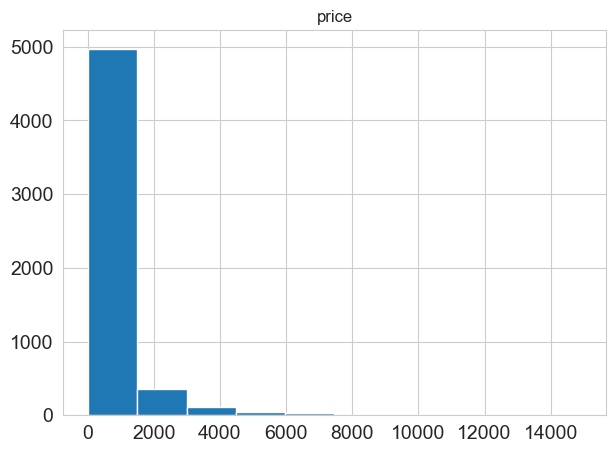

In [1448]:
data.hist(['quantity'], figsize=(7, 5))
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

data.hist(['price'], figsize=(7, 5))
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

Гистограммы по количеству товаров и цене демонстрируют не нормальное распределение, необходима проверка на выбросы.

#### Количество товара

In [1449]:
print('Количество проданного товара:', data['quantity'].sum())

Количество проданного товара: 14311


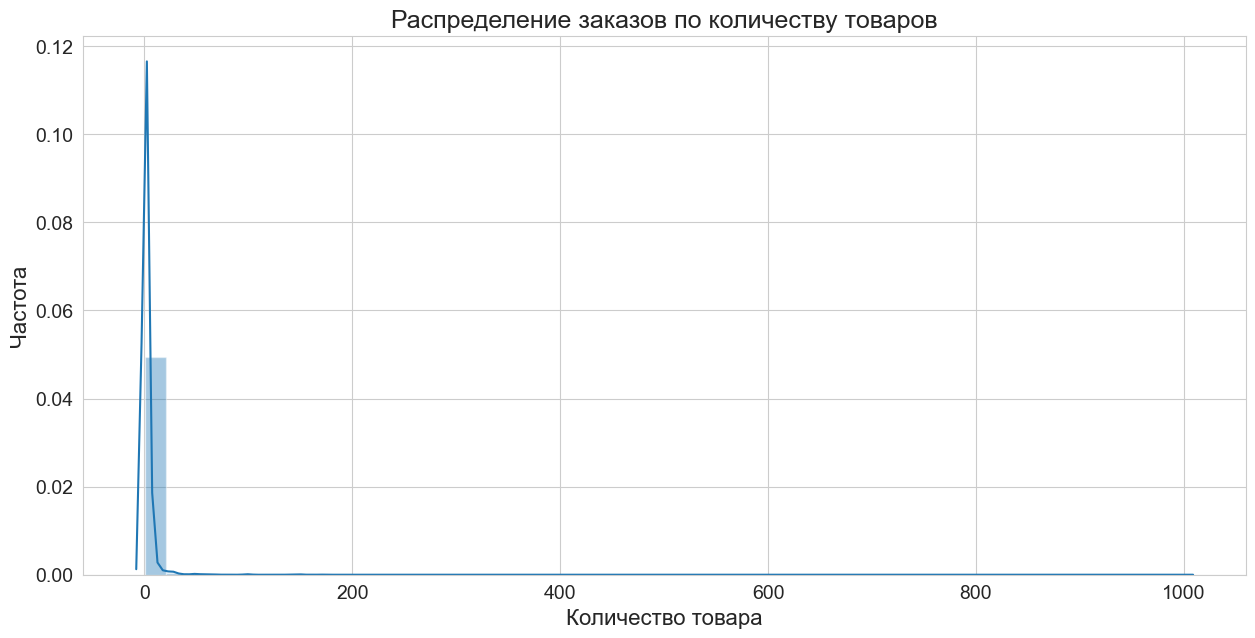

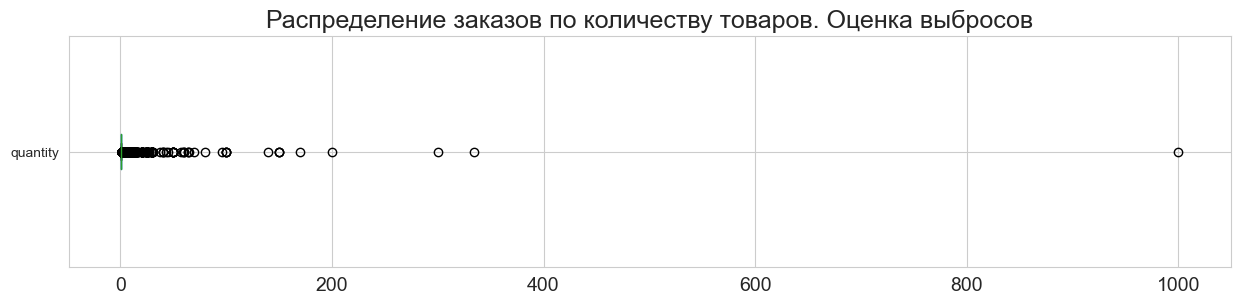

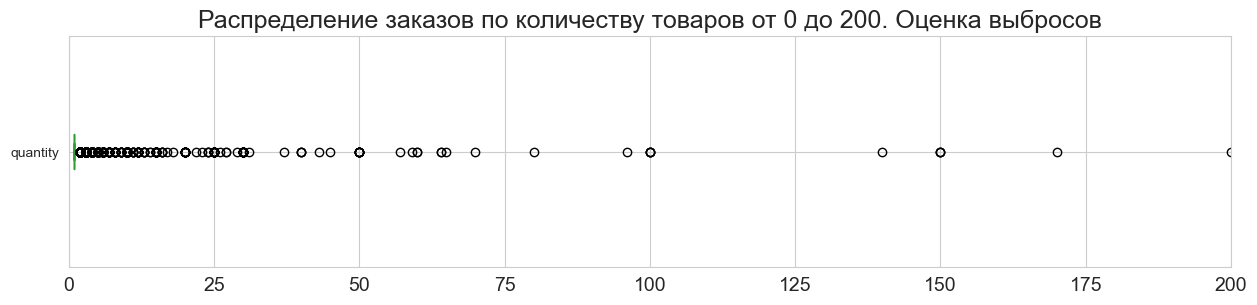

In [1450]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.distplot(data['quantity'])
plt.title('Распределение заказов по количеству товаров', size=18)
plt.xlabel('Количество товара', size=16)
plt.ylabel('Частота',size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

#полное распределение
data.boxplot(['quantity'], vert=False, figsize=(15, 3))
plt.title('Распределение заказов по количеству товаров. Оценка выбросов', size=18)
plt.xticks(size=14)
plt.show()
#распределение от 0 до 200
data.boxplot(['quantity'], vert=False, figsize=(15, 3))
plt.title('Распределение заказов по количеству товаров от 0 до 200. Оценка выбросов', size=18)
plt.xlim(0, 200)
plt.xticks(size=14)
plt.show()

В подавляющем большинстве случаев товары покупают по одной позиции.  
Примерно до 100 выбросы идут более или мене плотно. Проверим перцентили.

In [1451]:
# посчитаем перцентили выбросов в количестве товара
print(np.percentile(data['quantity'], [90, 95, 99]))

[ 3.    6.   26.84]


Меньше 1 процента пользователей заказывают больше 27 товаров.   
Посмотрим на строки, где значения превышают эту отметку 99 перцентиля.

In [1452]:
print('Количество строк в датасете, где кол-во заказов > 99 перцентиля:',len(data.query('quantity > 26').sort_values(by=['customer_id'])))
data.query('quantity > 26').sort_values(by=['customer_id'])

Количество строк в датасете, где кол-во заказов > 99 перцентиля: 56


date                           customer_id  order_id  \
4845 2019-10-28 10:00:00  018fb729-3525-4314-8e4d-1982b1062f9f     73110   
1230 2019-01-03 21:00:00  028469c0-9e87-4596-ac2e-c5b1d48ea9b6     69421   
13   2018-10-01 15:00:00  0948b0c2-990b-4a11-b835-69ac4714b21d     68486   
4649 2019-09-30 16:00:00  0af078d6-facf-4ece-ad7b-3b4446ec19a2     72811   
499  2018-11-02 11:00:00  0c5aaa88-e346-4f87-8f7a-ad8cbc04e965     68831   
3757 2019-06-11 07:00:00  146cd9bf-a95c-4afb-915b-5f6684b17444     71668   
2024 2019-03-18 10:00:00  21b4642e-9cdf-4738-a290-b42d3e748c0f     70776   
2108 2019-03-25 16:00:00  22749361-d927-47e6-a6ad-aee8becdb094     70876   
1145 2018-12-23 11:00:00  24c0b355-53e3-428a-b299-e1627b1cdd5c     69524   
2798 2019-04-29 10:00:00  259b381f-e37c-4daf-8d61-731fb94a5824     71311   
3431 2019-05-23 11:00:00  259b381f-e37c-4daf-8d61-731fb94a5824     71499   
4700 2019-10-07 20:00:00  2ac05362-3ca7-4d19-899c-7ba266902611     72845   
4828 2019-10-23 11:00:00  2fac41bf-e800-4bc3-a4b3-0df800f33e99     73073   
3825 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   
1267 2019-01-11 22:00:00  34b2bf7d-7cd8-4aba-909d-396655d77f7e     69793   
1752 2019-02-27 09:00:00  377c8a20-a3e0-4945-9fd8-a1f4ada5d8b0     70482   
2177 2019-03-29 15:00:00  37a2bf50-a4e4-491c-a1ba-e5f70e9caa05     70921   
252  2018-10-16 22:00:00  42c5db22-6046-455b-a728-ff163a1b7808     68667   
2530 2019-04-19 18:00:00  498f12a4-6a62-4725-8516-cf5dc9ab8a3a     71204   
210  2018-10-12 15:00:00  4d93d3f6-8b24-403b-a74b-f5173e40d7db     68623   
255  2018-10-17 13:00:00  4d93d3f6-8b24-403b-a74b-f5173e40d7db     68668   
254  2018-10-17 13:00:00  4d93d3f6-8b24-403b-a74b-f5173e40d7db     68668   
4822 2019-10-22 16:00:00  511115b7-e981-4069-9e0e-88a3551341a6     73063   
1296 2019-01-15 13:00:00  58a4c3cc-504f-43ea-a74a-bae19e665552     69830   
3387 2019-05-20 21:00:00  5d189e88-d4d6-4eac-ab43-fa65a3c4d106     71478   
1618 2019-02-18 15:00:00  61f60726-5362-44d0-a0ae-800730389f32     70327   
4810 2019-10-20 21:00:00  6583407e-7d0d-4ece-93f8-6f7cb64f9926     73041   
2077 2019-03-23 10:00:00  685d3d84-aebb-485b-8e59-344b3df8b3d3     70841   
1134 2018-12-21 16:00:00  6987e6d6-a63a-4ce2-a2d0-f424092d235e     69504   
588  2018-11-07 19:00:00  6ae61023-9d87-4ff3-a02e-b42eab150140     68908   
1339 2019-01-22 15:00:00  6be74251-7159-4cc0-99fb-d034a17c61b0     69928   
3902 2019-06-25 21:00:00  72df1c3c-6efc-45c5-9b12-5a48935a48a4     71802   
1620 2019-02-18 16:00:00  74b08ab4-16e9-4d83-9c31-acfc9d229bc5     70328   
966  2018-12-04 17:00:00  7d255526-fcc2-4f79-b28a-217d7d2373a8     69206   
1326 2019-01-21 09:00:00  8eabcaca-e8c8-4eee-9079-4ff5f612273a     69893   
894  2018-11-29 17:00:00  8fba3604-ef57-4b9f-b2fe-3402fa8825c8     69156   
127  2018-10-08 15:00:00  9151d307-654c-4239-a888-ada5ca45f0b2     68571   
1010 2018-12-10 14:00:00  a984c5b7-ff7e-4647-b84e-ef0b85a2762d     69289   
481  2018-11-01 08:00:00  aa42dc38-780f-4b50-9a65-83b6fa64e766     68815   
2209 2019-04-02 09:00:00  aaafc0ca-1fd4-4d0b-b7b8-37391c319fd3     70970   
955  2018-12-04 05:00:00  b0f1833c-0763-4f4e-b097-41d27a521e46     69194   
1515 2019-02-09 20:00:00  b827d1a8-5e5d-4a44-9813-2bd669471a73     70114   
3456 2019-05-27 10:00:00  b92e90cd-7904-463b-ab38-7f8c8830f777     71519   
2623 2019-04-24 12:00:00  b9ced699-9bb7-458c-bc60-a474b415ce1f     71266   
2155 2019-03-28 20:00:00  bba9b7bf-09a6-4f16-81c3-2b83dcebbc0a     70915   
4727 2019-10-10 14:00:00  bd5328dc-1e15-4757-9fe2-f56e4f8eaa7c     72920   
3539 2019-05-30 07:00:00  c03e95a5-e141-45b4-92b7-7c7734391569     71551   
139  2018-10-09 09:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b     68580   
242  2018-10-16 08:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
241  2018-10-16 08:00:00  cd09ea73-d9ce-48c3-b4c5-018113735e80     68611   
1762 2019-02-28 08:00:00  d4814734-38a6-4f99-a668-f5408e83c870     70498   
4697 2019-10-07 11:00:00  d933280e-5372-448f-be44-b269c8bafc2a     7

Количество строк 55, проверим пользователей сделавших эти заказы.

In [1453]:
##запишем этих пользователей в отдельный датасет
#abnormal_quantity_customers = data.query('quantity > 27')
##выделим все строки основного датасета, где ID клиента будет совпадать с этими пользователями
#data_extra = data.query('customer_id in @abnormal_quantity_customers["customer_id"]')
#data_extra.head()

In [1454]:
##оценим количество заказов и клиентов попавших в выборку
#data_extra.nunique()

In [1455]:
#print('Доля строк с выбросами от общего ДС', round(len(data_extra)/len(data)*100,2),'%')

In [1456]:
#print('Доля пользователей с выбросами в кол-ве товаров от общего числа пользователей', round(data_extra['customer_id'].nunique()/data['customer_id'].nunique()*100,2),'%')

По очишенным от дубликатов данным 2% пользователей совершают покупки содержащие больше 27 товаров одного наименования в заказе. Надо отметить, что в одном заказе зачастую присутствует только одна позиция.  
Можно предположить, что это пользователи - оптовики. Оставим их в ДС.  
Так же в ДС содержится заказ на 1000 это значение можно назвать экстримальным, проверим совершал ли этот клиент еще покупки.

In [1457]:
#ищем id пользователя с 
data.query('quantity >999')

date                           customer_id  order_id  \
3825 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   

                                                product  quantity  price  
3825  вантуз с деревянной ручкой d14 см красный, bur...      1000  675.0

In [1458]:
data.query('customer_id == "312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6"')

date                           customer_id  order_id  \
3825 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   

                                                product  quantity  price  
3825  вантуз с деревянной ручкой d14 см красный, bur...      1000  675.0

Данный заказчик совершил всего 1 заказ в июне 2019 г. Не смотря на то, что этот заказ вполне может быть оптовым он может повлиять на общие показатели. Удалим этого заказчика.

In [1459]:
#перезаписываем ДС исключая пользорвателя с аномальным количеством заказов
data = data.query('customer_id != "312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6"')

In [1460]:
#оценим общее количество проданного товара по данным датасета
print('Количество проданного товара:', data['quantity'].sum())

Количество проданного товара: 13311


#### Цены

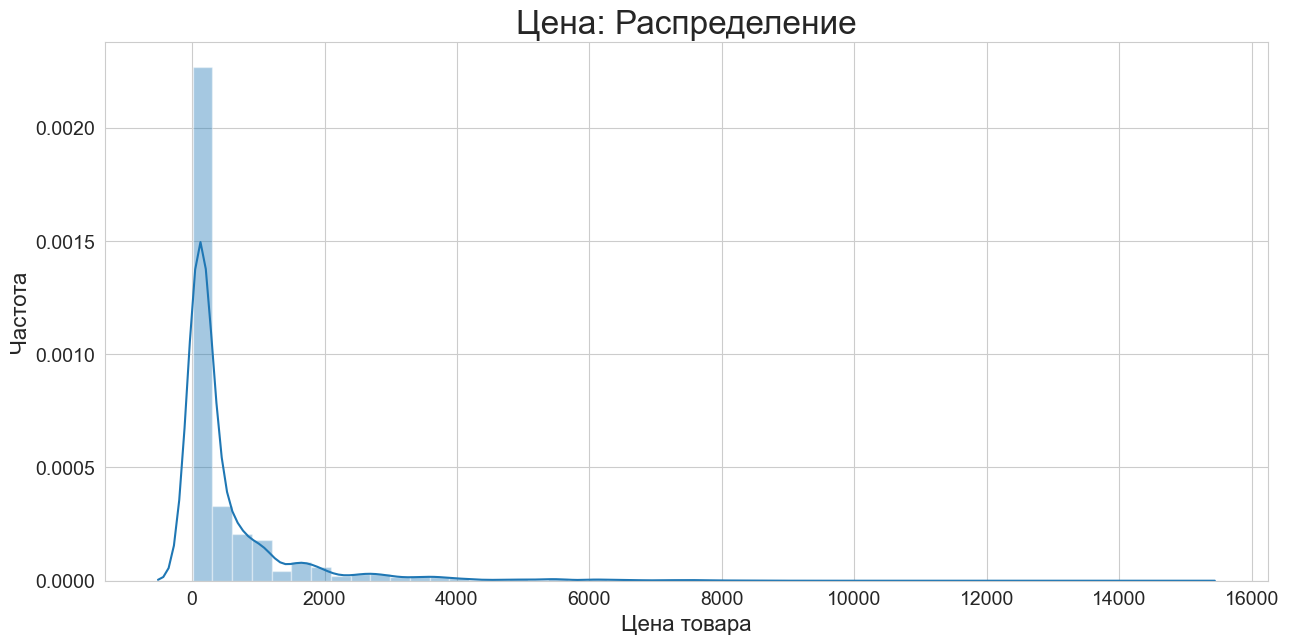

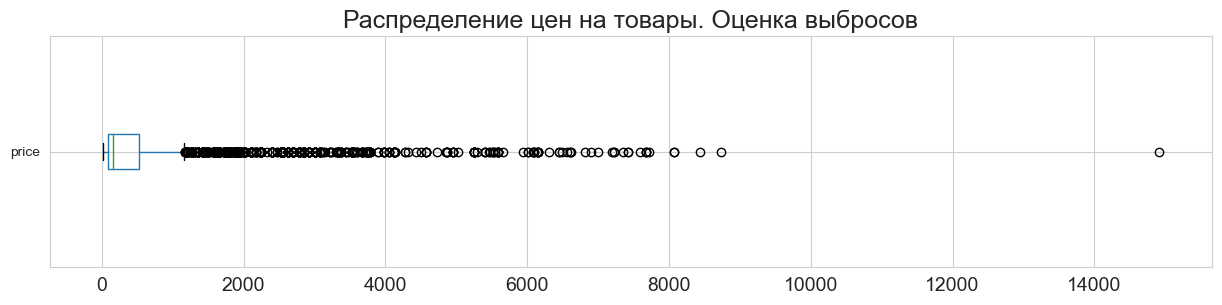

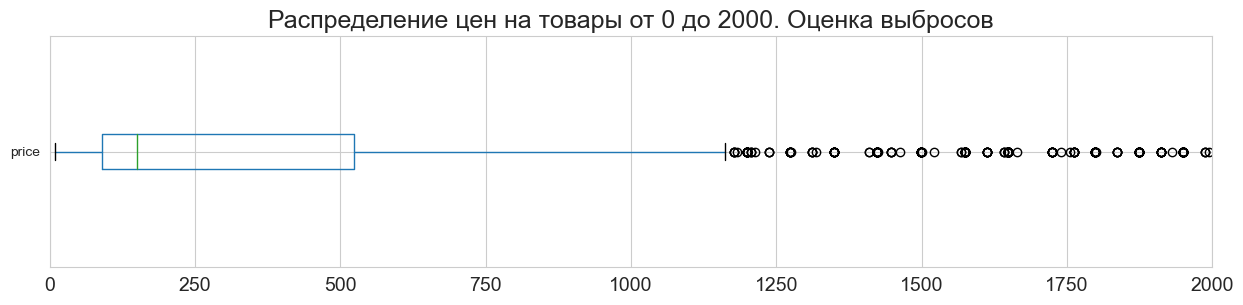

In [1461]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.distplot(data['price'])
plt.title('Цена: Распределение', size=24)
plt.xlabel('Цена товара', size=16)
plt.ylabel('Частота',size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

#полное распределение
data.boxplot(['price'], vert=False, figsize=(15, 3))
plt.title('Распределение цен на товары. Оценка выбросов', size=18)
plt.xticks(size=14)
plt.show()
#распределение от 0 до 200
data.boxplot(['price'], vert=False, figsize=(15, 3))
plt.title('Распределение цен на товары от 0 до 2000. Оценка выбросов', size=18)
plt.xlim(0, 2000)
plt.xticks(size=14)
plt.show()

Цена на большую часть товаров не превышает 1000.

### Уникальные значения  


Изучим уникальные значения столбцов

In [1462]:
# выведем количество уникальных значений столбца с датами
print('Количество уникальных наименований в столбце с датой:', data['date'].nunique())
print()
# выведем количество уникальных значений столбца с ID клиетов
print('Количество уникальных наименований столбце с ID клиента:', data['customer_id'].nunique())
print()
# выведем количество уникальных значений столбца с ID заказов
print('Количество уникальных наименований в столбце с ID заказа:', data['order_id'].nunique())  
print()
# выведем количество уникальных значений столбца с наименованиями продуктов
print('Количество уникальных наименований товаров:', data['product'].nunique())

Количество уникальных наименований в столбце с датой: 2719

Количество уникальных наименований столбце с ID клиента: 2429

Количество уникальных наименований в столбце с ID заказа: 3520

Количество уникальных наименований товаров: 2333


In [1463]:
# выведем уникальные значения столбца с наименованиями продуктов
print(sorted(data['product'].unique()))

['tepмокружка avex freeflow 700 мл зеленый avex0759', 'tepмокружка avex freeflow 700 мл сталь avex0776', 'tepмокружка avex recharge 500 мл голубой avex0681', 'автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114', 'агератум рассада однолетних цветов в кассете по 10 шт', 'адиантум лиза d-12 см', 'азалия индика биколор d-12 см', 'азалия индика биколор d-12 см h-20', 'азалия индика розовая d-12 см h-20', 'азалия индика фиолетовая d-10 см h-20', 'аквилегия махровая тауэр смесь окрасок объем 1 л', 'аквилегия обыкновенная барлоу микс объем 1 л', 'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302', 'алиссум рассада однолетних цветов в кассете по 10 шт', 'алиссум рассада однолетних цветов в кассете по 6 шт', 'алиссум скальный желтый объем 1 л', 'алоэ вера d-12 см h-25 см', 'альбука спиралис фризл-сизл d-12 см', 'амариллис red lion темно-красный в горшке d-12 см 1 луковица', 'анемона белый объем 0,5 л', 'антижир posh one magnum 828 мл россия 4580390-927058', 'антинакипин для 

In [1464]:
# выведем количество уникальных значений столбца с количеством товаров
print('Количество уникальных значений столбца с количеством товаров:', data['quantity'].nunique())
# выведем уникальные значения столбца
print(sorted(data['quantity'].unique()))

Количество уникальных значений столбца с количеством товаров: 48
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 37, 40, 43, 45, 50, 57, 59, 60, 64, 65, 70, 80, 96, 100, 140, 150, 170, 200, 300, 334]


In [1465]:
# посчитаем перцентили выбросов в количестве товара
print(np.percentile(data['quantity'], [90, 95, 99]))

[ 3.    6.   25.85]


После отметки в 30 разрыв в количестве товаров увеличивается.  
Как было сказано ранее количество товаров одной позиции в заказе меньше, чем в 10 процентах случаев составляет 3, и меньше 5% - 6, меньше 1 процента - 26.  

Проверим ценник на товары

In [1466]:
# выведем количество уникальных значений столбца с количеством товаров
print('Количество уникальных значений столбца с ценами:', data['quantity'].nunique())
# выведем уникальные значения столбца
print(sorted(data['price'].unique()))

Количество уникальных значений столбца с ценами: 48
[9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 19.0, 20.0, 20.33333333333333, 21.0, 22.0, 24.0, 26.0, 27.0, 28.0, 29.0, 30.0, 32.0, 34.0, 35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 43.0, 44.0, 45.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.333333333333336, 55.66666666666666, 56.0, 56.5, 57.0, 58.0, 59.0, 60.0, 62.0, 63.0, 64.0, 67.0, 68.0, 70.0, 71.0, 74.0, 75.0, 76.0, 78.0, 81.0, 82.0, 83.0, 86.0, 88.0, 89.0, 90.0, 92.0, 94.0, 97.0, 97.5, 98.0, 101.0, 104.0, 105.0, 106.0, 109.0, 112.0, 114.0, 115.0, 116.0, 118.0, 119.0, 119.5, 120.0, 121.0, 127.0, 128.0, 132.0, 134.0, 134.5, 135.0, 139.0, 139.33333333333334, 142.0, 146.0, 148.0, 149.0, 150.0, 157.0, 158.0, 161.0, 162.0, 164.0, 165.0, 167.0, 169.0, 172.0, 178.0, 179.0, 186.5, 187.0, 187.5, 188.0, 191.0, 193.0, 194.0, 195.0, 196.0, 202.0, 206.0, 207.0, 209.0, 210.0, 214.0, 217.0, 218.0, 223.0, 224.0, 225.0, 228.0, 232.0, 235.0, 239.0, 243.0, 246.5, 247.0, 250.0, 254.0, 262.0, 263.0, 265.0, 269

In [1467]:
# посчитаем перцентили выбросов в количестве товара
print(np.percentile(data['price'], [50, 90, 95, 99]))

[ 150. 1499. 2399. 5249.]


Цены в магазине варируются от 9 у.е. до 14917 у.е. Половина товаров стоит меньше 150 у.е. и 10% процентов больше 1499, 1% цен выходит за пределы  пяти тысяч.

### Общая информация

In [1468]:
data.describe(include='all')

date                           customer_id  \
count                  5516                                  5516   
unique                 2719                                  2429   
top     2019-04-27 16:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
freq                     51                                   143   
first   2018-10-01 00:00:00                                   NaN   
last    2020-01-31 15:00:00                                   NaN   
mean                    NaN                                   NaN   
std                     NaN                                   NaN   
min                     NaN                                   NaN   
25%                     NaN                                   NaN   
50%                     NaN                                   NaN   
75%                     NaN                                   NaN   
max                     NaN                                   NaN   

             order_id                                            product  \
count     5516.000000                                               5516   
unique            NaN                                               2333   
top               NaN  пеларгония розебудная red pandora укорененный ...   
freq              NaN                                                 66   
first             NaN                                                NaN   
last              NaN                                                NaN   
mean     56076.837382                                                NaN   
std      32451.596198                                                NaN   
min      12624.000000                                                NaN   
25%      14809.750000                                                NaN   
50%      69218.500000                                                NaN   
75%      71953.250000                                                NaN   
max     112789.000000                                                NaN   

           quantity         price  
count   5516.000000   5516.000000  
unique          NaN           NaN  
top             NaN           NaN  
freq            NaN           NaN  
first           NaN           NaN  
last            NaN           NaN  
mean       2.413162    532.251103  
std        9.628902    975.682997  
min        1.000000      9.000000  
25%        1.000000     90.000000  
50%        1.000000    150.000000  
75%        1.000000    524.000000  
max      334.000000  14917.000000

Можно отметить, что чаще всего в заказах один предмет одного типа, возможно уже на этом этапе можно было бы предложить отделу маркетинга увеличиь чек за счет каких-то акций которые будут стимулировать покупателя к покупке сразу нескольких одинаковых товаров, из серии "1+1=3", или скидка на второй товар той же позиции.  

Минимальная дата 2018-10-01  
Максимальная дата 2020-01-31  
В ДС содержатся данные с начала октября 2018 по конец января 2020, т.е. за год и 4 месяца.  

Наиболее часто встречающаяся дата 27 апреля 2019 г. на этот день приходится 51 запись.  
Больше всего покупок совершил заказчик с id c971fb21-d54c-4134-938f-16b62ee86d3b - на него приходится 143 записи.  
Самый популярный товар пелагония - 66 записей.  

По количеству товара на позицию в среднем приходится 2.4, при этом медиана - 1.

### Итоги первичного обзора данных  

По итогам проверки:  
В датасете наименования столбцов корректны, приведение к змеиному стилю не потребуется.  
Явных дубликатов не обнаружено.  
Явных пропусков не обнаружено, датасет содержал неявные дубликатов, которые были удалены.  
Возможно имеют место технические ошибки, например, система перезаписывает брошенные карзины, или при переходе в оплату фиксирует заказ даже если фактически оплата была совершена в другое время/дату, так же если на сайте ест кнопка повторить заказ, возможно она отправляет его с тем же id.  

В результате проверки на выбросы и аномалии:  
В столбце с количеством товаров большая часть заказов содержит на одной позиции каждого товара, 1 процент заказов содержит больше 26 позиций одного товарного наименования.  
Цены в магазине варируются от 9 у.е. до 14917 у.е. Половина товаров стоит меньше 150 у.е. и 10% процентов больше 1499б 1% цен выходит за пределы пяти тысяч.

По проверке на уникальные значения:    
Количество уникальных наименований в столбце с датой: 2719  
Количество уникальных наименований столбце с ID клиента: 2429  
Количество уникальных наименований в столбце с ID заказа: 3520  
Количество уникальных наименований товаров: 2333  

В процессе предобработки:  
Был изменен тип данных в столбце с датой на datetime.  
Переработано содержание столбца с наименованиями.   
Удалены не явные дубликаты. Доля удаленных строк: 26.18  
Было принято решение не удалять пользователей в заказах которых содержатся выбросы по количестве товаров - это могут быть оптовые заказчики (2% пользователей), кроме единственного пользователя совершившего единственный заказ, который можно отнести к экстримальным значениям (1000 товаров):   
Для некоторых наименований количество больше 30 вполне нормально, тем не менее рядовой человек в обычных обстоятельствах все же редко покупает товары этих наименований в таких количествах, можно предположить, что эти покупки могли быть совершены не для личного пользования.
Из увиденного можно предположить, что ряд товаров имеет потенциал для бизнеса, например, судя по наименованиям, для стоителей, отелей, кафе, прачечных.  

После очистки датасет содержит:  
5516 строк

Минимальная дата 2018-10-01  
Максимальная дата 2020-01-31  
В ДС содержатся данные с начала октября 2018 по конец января 2020, т.е. за год и 4 месяца.  

Наиболее часто встречающаяся дата 27 апреля 2019 г. на этот день приходится 51 запись.  
Больше всего покупок совершил заказчик с id c971fb21-d54c-4134-938f-16b62ee86d3b - на него приходится 143 записи.  
Самый популярный товар пелагония - 66 записей.  

## Подготовка данных

На этом этапе подготовим необходимые для последующего исследования данные:
- добавим столбец с категорией товара  
- добавим столбец с годом и месяцем  
- а так же столбцы с порядковыми номерами месяца, недели, днем недели и часом
- рассчитаем стоимость товаров в заказе

### Категоризация товара  

В первую очередь добавим столбец с типами товаров.  
При просмотре уникальных значений товаров можно выделить следующие крупные категории:  
- Сад и огород. К нему можно отрести цветы, семена и рассаду.  
- Товары для одежды. Вешалки для одежды (плечики), гладильные доски, сушилки для белья, аксессуары для гладильных досок.  
- Текстиль. Подушки, наволочки, простыни, покрывала, полотенца, скатерти, салфетки.  
- Мебель и ремонт. Полки, вешалки напольные и крючки, пружины для дверей, ручки скобы, стремянки, ящики для хранения.    
- Техника и комплектующие. Пылесосы, утюги, фены и проч..  
- Товары для кухни. В них в свою очередь 2 подкатегории: посуда и аксессуары для кухни. К первым чайники, тарелки, термокружки, салатники, ко вторым ножи, разделочные доски, протвини, терки, сковороды и крышки, просеиватели для муки, тазы пищевые, пьезозажигалки (последнее можно перенести в категорию техники и комплектующих).  
- Хозтовары и средства для уборки. Чистящие средства, щетки, ткани для поверхностей и т.п.  
- Товары для ванной и сан. узла. Стаканы для ванной, шторки для ванной, вантузы, коврики и т.п..  
- Сумки и тележки. Сумки-тележки, тележки багажные, тележки хозяйственные.
- Декор и подарки. К разделу отнесем комнатные растения, горшки и кашпо, искусственные растения и муляжи, аксессуары для интерьера и т.п.

Для того чтобы присвоить катгории всем товарам в таблице для начала создадим словарь который будет содержать товары и их принадлежность к категории.

In [1469]:
# выведем количество уникальных значений столбца с наименованиями продуктов (было 2343 уникальных значения)
print('Количество уникальных наименований товаров:', data['product'].nunique())
# выведем уникальные значения столбца
print(sorted(data['product'].unique()))

Количество уникальных наименований товаров: 2333
['tepмокружка avex freeflow 700 мл зеленый avex0759', 'tepмокружка avex freeflow 700 мл сталь avex0776', 'tepмокружка avex recharge 500 мл голубой avex0681', 'автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114', 'агератум рассада однолетних цветов в кассете по 10 шт', 'адиантум лиза d-12 см', 'азалия индика биколор d-12 см', 'азалия индика биколор d-12 см h-20', 'азалия индика розовая d-12 см h-20', 'азалия индика фиолетовая d-10 см h-20', 'аквилегия махровая тауэр смесь окрасок объем 1 л', 'аквилегия обыкновенная барлоу микс объем 1 л', 'алиссум (лобулярия) снежные одежды 0,2 г 4650091480302', 'алиссум рассада однолетних цветов в кассете по 10 шт', 'алиссум рассада однолетних цветов в кассете по 6 шт', 'алиссум скальный желтый объем 1 л', 'алоэ вера d-12 см h-25 см', 'альбука спиралис фризл-сизл d-12 см', 'амариллис red lion темно-красный в горшке d-12 см 1 луковица', 'анемона белый объем 0,5 л', 'антижир posh one magnum

In [1470]:
category_dict={
    'closing':['гладильная доска', 'ложка обувная', 'прищеп', 'сушилка для белья','чехол для гладильной доски',
               'доск','бельевые прищепки','чехол для одежды','чехол','корзина','подрукавник','для глаж',
               'сушилка','для белья','корзинка с крышкой'],
    'textile':['скатерть', 'постельное белье', 'хлопковый', 
               'махров','полотенце', 'наволочка', 'наматрацник', 'салфетк', 'одеяло',
               'кольца для штор','наматрасник','плед','покрывало','пододеяльник',
               'простын','халат'],
    'furniture_and_repair':['подставка для обуви','вешалк','набор вешалок', 'завертка', 'угольник', 'ключница', 
                            'комод', 'контейнер для мусора', 'корзина для белья', 'коробка', 'кофр', 
                            'крепеж', 'крючок', 'лестница', 'линейка', 'инструмент', 'вешалка', 'напильн', 
                            'свер', 'обувница', 'основание для пробки','шпингалет','пружин','этажерка','ящик','уголок',
                            'полки','петля','плечики','подголовник','полка','решетка вентиляционная','светильник',
                            'ручка мебельная','ручка-скоба','пуф','стеллаж','стремянк','стяжка','шпагат','шило',
                            'шнур','штангенциркуль','веревка','карниз','фал','фиксатор-шар'],
    'appliances':['утюг', 'весы', 'миксер','электроштопор','кипятильник','рассекатель пламени',
                  'пьезозажигалка','соковарка','соковыжималка','термометр','бензин','фен','сварка'],
    'citchen':['кухня','кухонн', 'кухонный', 'кружка', 'банка', 'бидон', 'блюд', 'вакуумный пакет',
               'вилка' ,'разделочная' , 'для свч', 'дуршлаг', 'измельчитель овощей', 'картофелемялка',
               'кастрюля', 'для выпечки', 'ковш', 'контейнер для овощей', 'контейнер для пр',
               'контейнер для свч', 'крышка', 'кувшин', 'ложка столовая', 'ложка чайная', 'лопатка','лоток',
               'мантоварка', 'масленка', 'сковород', 'миска', 'бокал', 'пикник', 'нож', 'стакан',
               'набор столовых приборов' ,'форм для кексов' ,'фужер' ,'салатник', 'овощеварка', 'овощечистка',
               'овсянница', 'орехоколка', 'отделитель косточек','кондитер','чайный набор','чайник','чашка','торт',
               'котел','контейнер герметичный','набор кружек','противень','для муки','рыбочистка','салфетница','сахарница',
              'сито','скалка','сотейник','ложка','тарелка','терка','термос','толкушка','хлебница','бульонница','венчик',
               'для соуса','половник', 'пресс для чеснока','для яйца','вкладыши для хранения посуды','набор посуды'],
    'cleanup':['средство', 'ведро', 'веник', 'губка', 'ерш', 'мыло', 'защитная соль для посудомоечных машин', 'паста',
               'для мытья', 'кондиционер для белья', 'концентрат для мытья', 'корыто', 'мерный стакан',
               'мешок', 'мусор', 'насадка для ведра', 'швабр', 'насадка-моп', 'насадка-отжим', 'мойка',
               'отбеливатель', 'отжим для ведра','таз','щетка-сметка','бальзам для мытья','урна','тряпкодержатель',
               'тряпка','мыльниц','перчатки','для чистки','для стирки','сменный блок для ролика',
               'для тряпки','скребок','сметка с совком','совок','стиральный','из микрофибры','щетка','антижир',
               'ткань для окон','чистящий','ополаскиватель для посудомоечных машин'],
    'bathroom':['ванна', 'вантуз', 'дозатор для мыла', 'душ', 'туалет', 'коврик противоскользящий',
                'коврик резиновый','штора текстильная для ванны и душа','для ванн','коврик в ванну',
                'коврик влаговпитывающий','в ванну'],
    'bags_n_carts':['сумка','тележк'],
    'decor_and_gifts':['комнатное растение', 'комнатное растение в горшке','ваза', 'кашпо','искусственный цветок',
                       'муляж', 'новогоднее дерево','горшок','цветок искусственный',
                       'декоративная композиция искуственных цветов','в горшке','искусственная','искусственный',
                       'комнатная','комнатный','d-','на 8 марта', 'подставка для цветов','кофе','фото','маска', 'домашняя',
                       'ковер', 'придверный','коврик интерьерный','коврик'],
    'gardening':['рассада','адиантум','азалия','аквилегия','алисс','алоэ','альбука','анемона','антуриум','аптения',
                 'арбуз','артемизия','аспарагус','астра','афеляндра', 'бадан', 'базилик','баклажан', 'бакопа','бальзамин',
                 'барвинок', 'бархатцы', 'бегония','бузульник','валериана','вербе','вероника', 'вигна',
                 'виола', 'гайлардия', 'гардения','гвоздика','георгина','герань','гербера',
                 'гимнокалициум', 'гиностемма', 'гипсофила', 'глоксиния', 'годеция', 'горох', 'гортензия','виноград',
                 'дендробиум','джункус','диффенбахия','драцена','дыня','замиокулькас',
                 'зверобой','земляника','змееголовник','импатиенс', 'иссоп','кабачок','каланхое','калатея', 'календула','калибрахоа','калла','каллуна', 'калоцефалус', 'камнеломка','капсикум', 'капуста','клубника','укорененный','колокольчик','кореопсис', 'кориандр','космея',
                 'котовник','крассула', 'лаванда','лаватера', 'лавр','лантана', 'лапчатка','лен ',
                 'лилейник', 'литопс', 'лобелия','в кассете','фиалка', 'мединилла', 'мелисса', 'мимоза',
                 'мирт', 'молодило','монарда', 'морковь', 'муррайя', 'мята','гибридная','настурция',
                 'незабудка', 'нефролепис', 'нивянник','ромашка', 'крупноцветковый', 'нолина', 'огурец','осина',
                 'папоротник','патиссон','раннеспелый', 'пахира', 'пеларгония','пеперомия', 'петрушка', 'петуния',
                 'пиретрум', 'подсолнечник','примула',
                 'пряные травы','пуансеттия','пуансетия','день учителя', 'радермахера', 'ранункулус', 'роза',
                 'розмарин', 'рудбекия', 'салат','сантолина', 'седум','очиток', 
                 'седум','почвопокровный', 'скиммия', 'смолевка', 'соланум', 'солидаго', 'спатифиллум','суккулент',
                 'тимьян','томат','тюльпан','укроп','фатсия','физостегия','фиттония','фикус','диаметр горшка',
                 'флокс','фуксия','хамедорея', 'хлорофитум','хоста', 'хризантема','хризолидокарпус', 'цикламен',
                 'цинерария', 'цинния','циперус', 'цитрофортунелла', 'чабер','шеффлера', 'эвкалипт','энотера',
                 'эпипремнум','эхеверия', 'эхинацея','кактус','эшшольция', 'юкка', 'ясколка'],
}

In [1471]:
def product_typing(row):
    for category, items in category_dict.items():
        for item in items:
            if item in row:
                return category
    return 'other'

data['type'] = data['product'].apply(product_typing)

In [1472]:
data.head(5)

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

              type  
0  decor_and_gifts  
1  decor_and_gifts  
2  decor_and_gifts  
3  decor_and_gifts  
4  decor_and_gifts

In [1473]:
data.groupby(['type'])['product'].nunique().sort_values(ascending=False)

type
decor_and_gifts         516
gardening               498
closing                 296
citchen                 275
furniture_and_repair    192
cleanup                 168
textile                 152
bathroom                106
bags_n_carts            104
appliances               26
Name: product, dtype: int64

In [1474]:
print(sorted(data.query('type == "other"')['product'].unique()))
print('Количество позиций в категории "другое"', data.query('type == "other"')['product'].nunique())

[]
Количество позиций в категории "другое" 0


Товары по категориям распределены не равномерно.  
Cамая общирная категория Декор и подарки, а так же Сад и огород, наименее широкая по ассортименту Техника и комплектующие.  

### Добавление столбцов с датой и расчетом стоимости

In [1475]:
#добавляем столбец со стоимостью товара в заказе
data['cost'] = data['price']*data['quantity']
#добавляем столбец с годом и месяцем
data['month'] = data['date'].dt.strftime('%Y-%m')
data['week'] = data['date'].dt.strftime('%Y-%U')
data['month_n'] = data['date'].dt.month
data['day'] = data['date'].dt.dayofweek
data['order_date'] = data['date'].dt.date
data['hour'] = data['date'].dt.hour
data.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

              type   cost    month     week  month_n  day  order_date  hour  
0  decor_and_gifts  142.0  2018-10  2018-39       10    0  2018-10-01     0  
1  decor_and_gifts  194.0  2018-10  2018-39       10    0  2018-10-01     0  
2  decor_and_gifts  112.0  2018-10  2018-39       10    0  2018-10-01     0  
3  decor_and_gifts  179.0  2018-10  2018-39       10    0  2018-10-01     0  
4  decor_and_gifts  112.0  2018-10  2018-39       10    0  2018-10-01     0

### Итог  (подготовки данных)

В результате подготовки:

была произведена категоризация товаров, были выделены следующие типы (по количеству товарных наименований по убыванию):   
Декор и подарки (decor_and_gifts)         516  
Сад и огород (gardening)               498  
Товары для одежды (closing)                 296  
Товары для кухни (citchen)                 275  
Медель и товары для ремонта (furniture_and_repair)    192  
Товары для уборки (cleanup)                 168  
Текстиль (textile)                 152  
Товары для ванной (bathroom)                106  
Сумки и тележки (bags_n_carts)            104  
Техника и комплектующие (appliances)               26  

были доставлены столбцы с расчетом стоимости товара, номером недели, номером дня недели, датой совершения заказа (без времени) и часом совершения покупки.

## Исследовательский анализ.  
- изучение основных показателей распределение/динамика: выручка, средний чек, среднее количество товаров в чеке, среднее количество заказов на пользователя, средняя частота покупок
- исследование основных категорий товаров по стоимости/принадлежности к товарным группам/спросу 

### Основные показатели
- изучение основных показателей распределение/динамика: выручка, средний чек, среднее количество товаров в чеке, среднее количество заказов на пользователя, средняя частота покупок

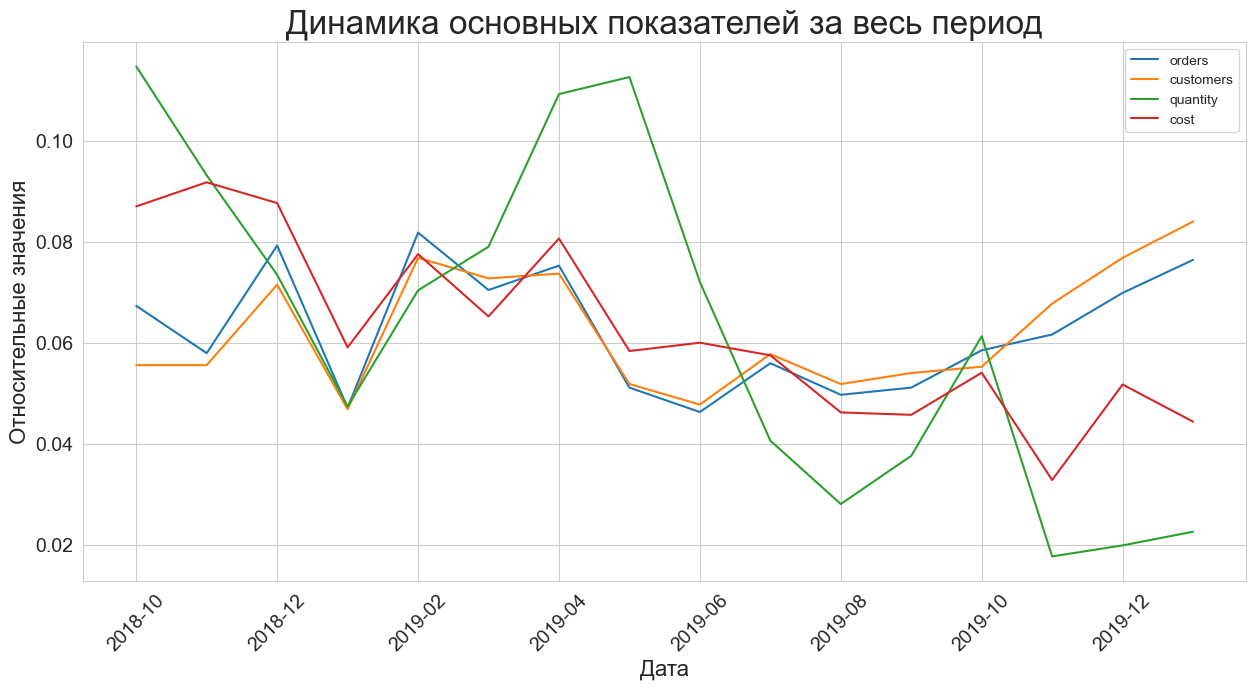

In [1476]:
month_pivot = data.groupby('month').agg({'order_id':'nunique','customer_id':'nunique','quantity':'sum','cost':'sum'})#.plot(figsize=(15, 10), legend=False)
month_pivot.columns = ['orders','customers','quantity','cost']
month_pivot['orders'] = (month_pivot['orders']/month_pivot['orders'].sum())
month_pivot['customers'] = (month_pivot['customers']/month_pivot['customers'].sum())
month_pivot['quantity'] = (month_pivot['quantity']/month_pivot['quantity'].sum())
month_pivot['cost'] = (month_pivot['cost']/month_pivot['cost'].sum())

month_pivot.plot(figsize=(15, 7), legend=True)
sns.set_style("whitegrid")
plt.title('Динамика основных показателей за весь период', size=24)
plt.xlabel('Дата',size=16)
plt.ylabel('Относительные значения',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()

Количество клиентов к концу исследуемого периода вырасло, количество заказов так же имеет положительную динамику, количество проданных товароов и выручка упали.

In [1477]:
#запишем функцию для визуализации динамики
def show_dinamics(value, funct, name, measure):
    data.groupby('order_date').agg({value:funct}).plot(figsize=(15, 7), legend=False)
    sns.set_style("whitegrid")
    plt.title(f'{name} динамика за весь период', size=24)
    plt.xlabel('Дата',size=16)
    plt.ylabel(f'{measure}',size=16)
    plt.xticks(rotation=45,size=14)
    plt.yticks(size=14)
    plt.show()

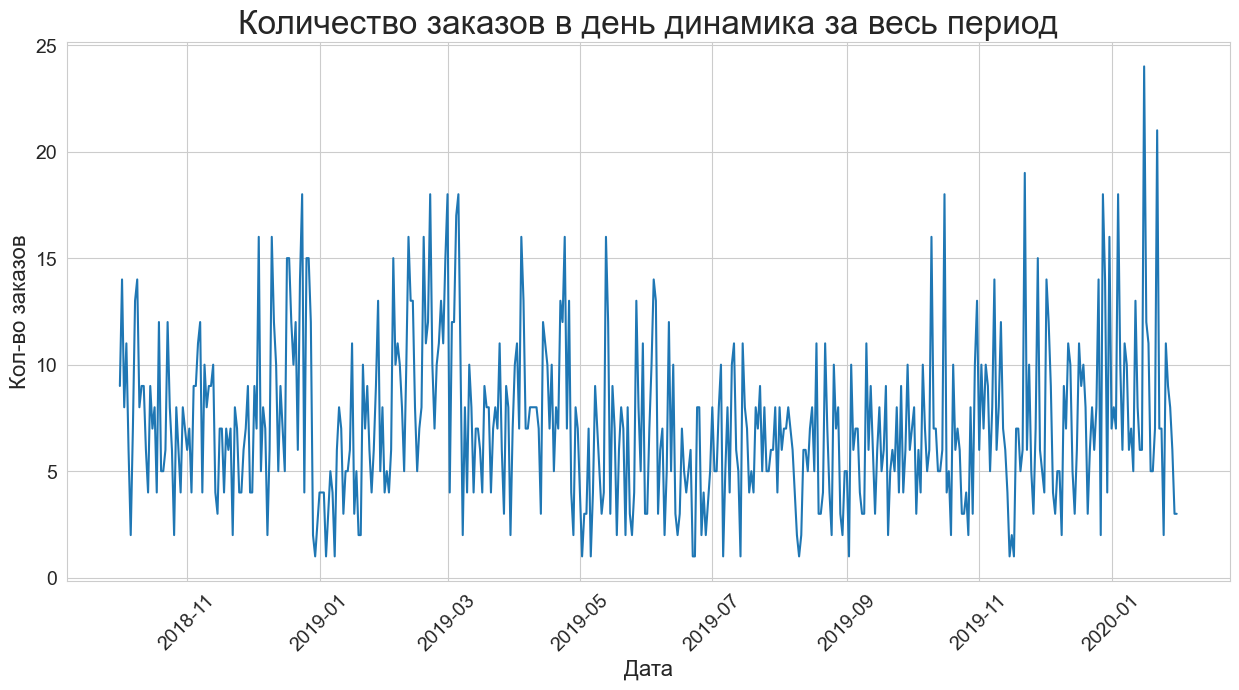

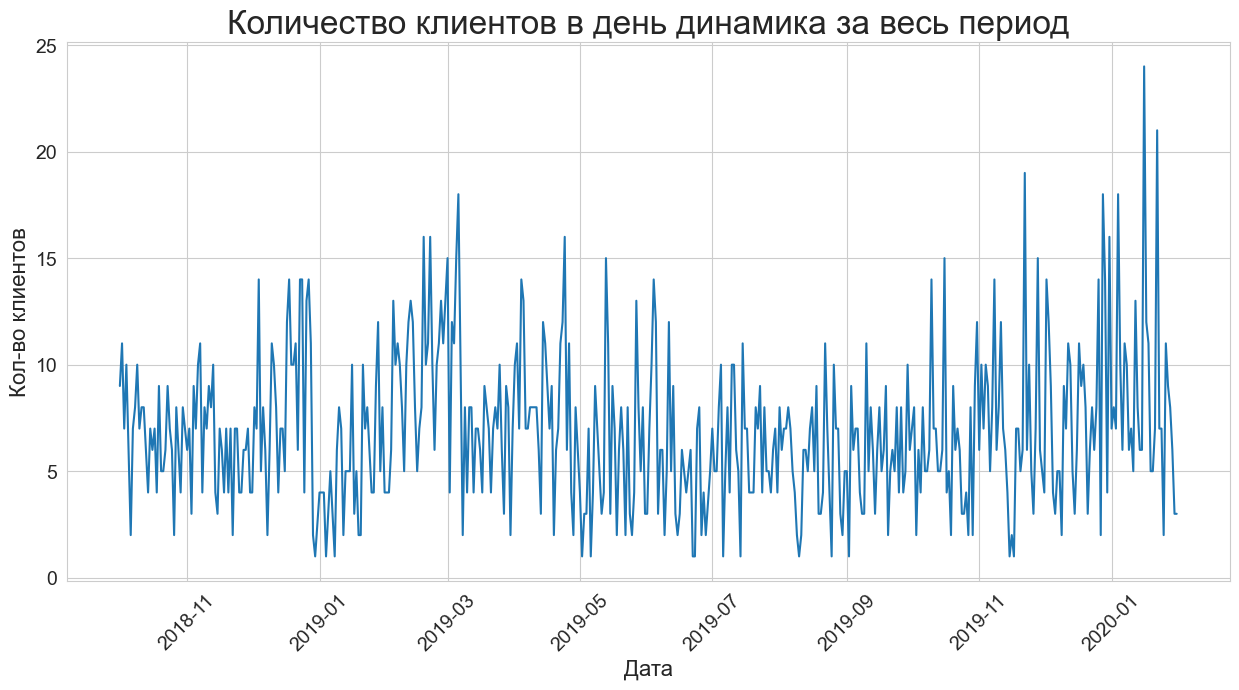

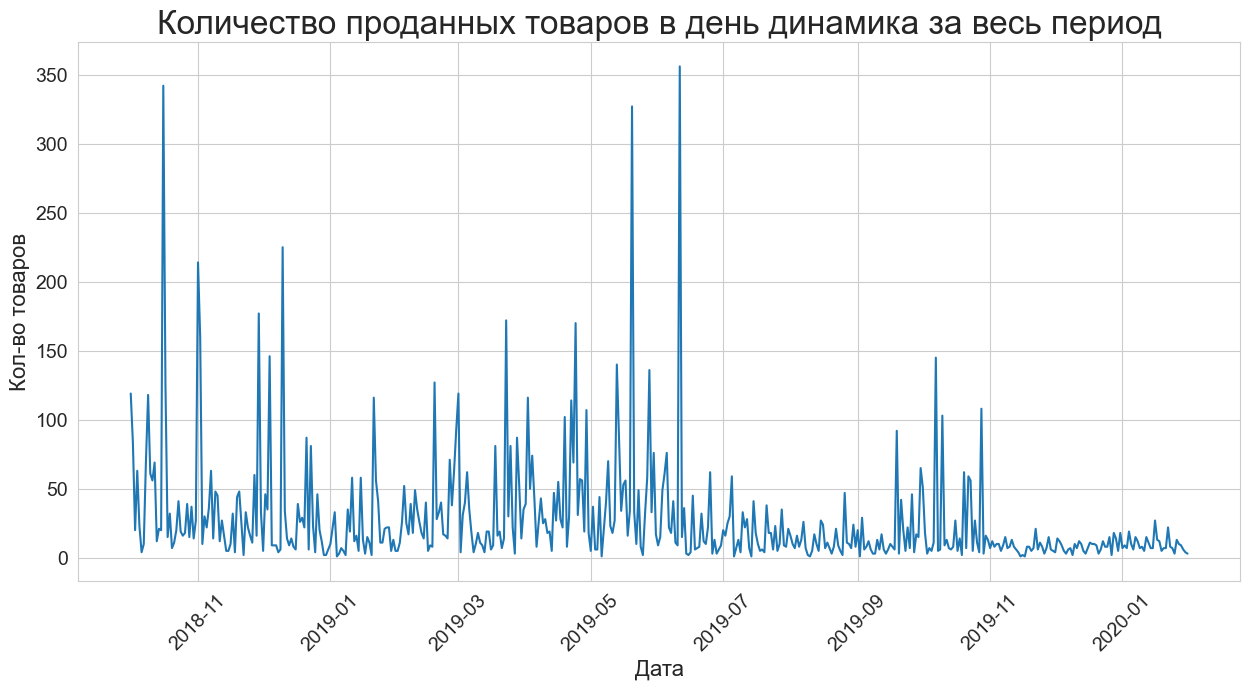

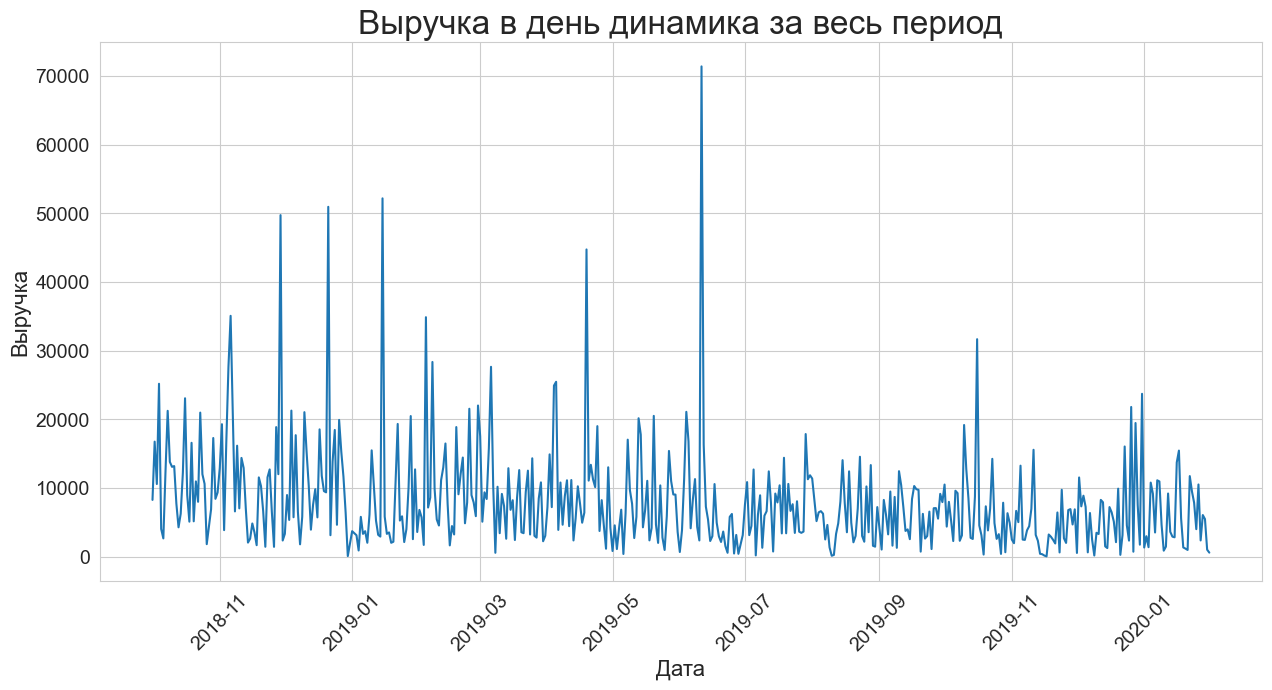

In [1478]:
#выводим динамику количества заказов
show_dinamics('order_id','nunique','Количество заказов в день','Кол-во заказов')
#выводим динамику количества клиентов
show_dinamics('customer_id','nunique','Количество клиентов в день','Кол-во клиентов')
# выведем динамику количества товаров
show_dinamics('quantity','sum','Количество проданных товаров в день','Кол-во товаров')
#выведем динамику выручки
show_dinamics('cost','sum','Выручка в день','Выручка')

Количество заказов в конце исслебуемого периода доходит до 25 в день, то же касается и количества покупателей.  

До начала лета 2019 можно увидеть достаточно много всплесков по количеству товаров больше 50, то же касается выручки.  
Так же в количестве товаров наблюдается всплеск в осенний период: октябрь/ноябрь. Выручка тоже снижается к концу исследуемого периода, однако, как мы видели на графике динамике основных показателей в относительных значениях спад не такой резкий, как у количества заказов. Можно предположить, что ноябре 2019/декабре 2019/январе 2020, покупатели хоть и брали небольшое количество товаров, они относились к более дорогостоящим категориям.  

Несмотря на то что динамика получилась довольно шумной при детализации по дням, графики дают нам представление, о том в какие промежутки времени имели место крупные заказы.

#### Выручка по месяцам.

In [1479]:
data_month_revenue = data.pivot_table(index=['month'], values=['cost'], aggfunc=['sum']).reset_index()
data_month_revenue.columns = ['month','revenue']
data_month_revenue.sort_values(by=['revenue'],ascending=False)

month        revenue
1   2018-11  359772.000000
2   2018-12  343676.000000
0   2018-10  341089.000000
6   2019-04  316183.000000
4   2019-02  304054.000000
5   2019-03  255704.000000
8   2019-06  235319.000000
3   2019-01  231657.000000
7   2019-05  228857.000000
9   2019-07  225526.000000
12  2019-10  212040.000000
14  2019-12  202885.333333
10  2019-08  181231.000000
11  2019-09  179346.000000
15  2020-01  174036.333333
13  2019-11  128791.750000

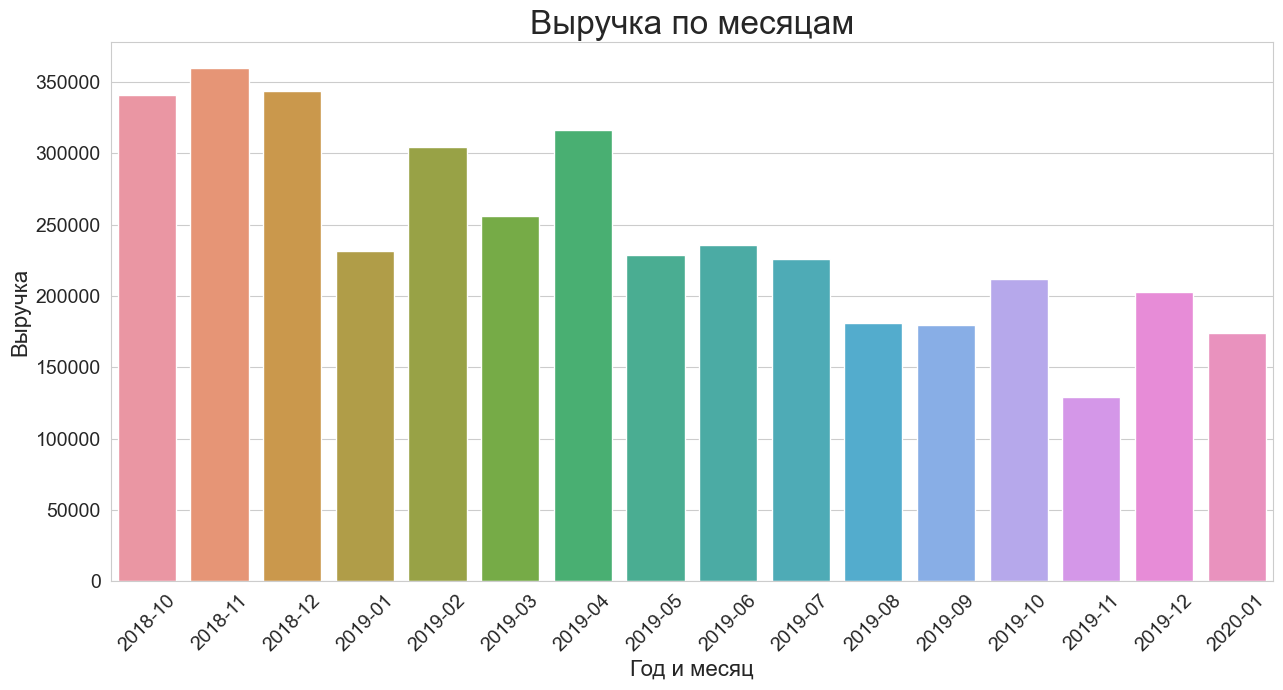

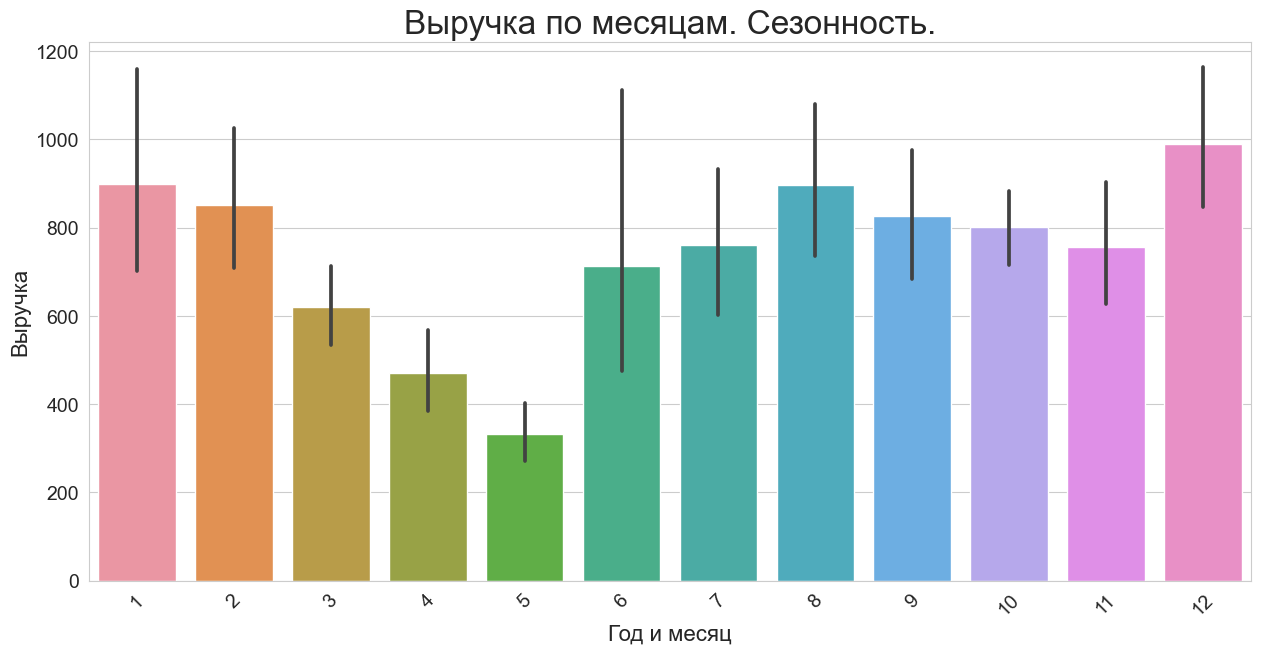


Средняя выручка в месяц 230257.0


In [1480]:
#визуализируем выручку по месяца
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=data_month_revenue, x='month', y='revenue')
plt.title('Выручка по месяцам', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Выручка',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
#проверяем сезонность
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=data, x=data['month_n'], y='cost')
plt.title('Выручка по месяцам. Сезонность.', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Выручка',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
#выводим среднюю выручку
print('Средняя выручка в месяц', round(data_month_revenue['revenue'].median(), 2))

Средняя выручка в месяц 230257.0

Заметно постепенное снижение выручки с течением времени. Вторая половина 2019 года по выручке ниже средней.  

**По убыванию выручки**:

TОП 3:  
2018-Ноябрь	359772.000000  
2018-Декабрь 343676.000000  
2018-Октябрь 341089.000000  

АНТИ ТОП 3: 

2019-Сентябрь	179346.000000  
2020-Январь	174036.333333  
2019-Ноябрь	128791.750000 

В целом наихудшие показатели по выручке приходятся на май, лучшие на декабрь-январь и август.

Оценим количество заказов.

#### Количество заказов

In [1481]:
data_month_orders = data.pivot_table(index=['month'], values=['order_id'], aggfunc=['nunique']).reset_index()
data_month_orders.columns = ['month','orders_quantity']
data_month_orders.sort_values(by=['orders_quantity'], ascending=False)

month  orders_quantity
4   2019-02              288
2   2018-12              279
15  2020-01              269
6   2019-04              265
5   2019-03              248
14  2019-12              246
0   2018-10              237
13  2019-11              217
12  2019-10              206
1   2018-11              204
9   2019-07              197
7   2019-05              180
11  2019-09              180
10  2019-08              175
3   2019-01              166
8   2019-06              163

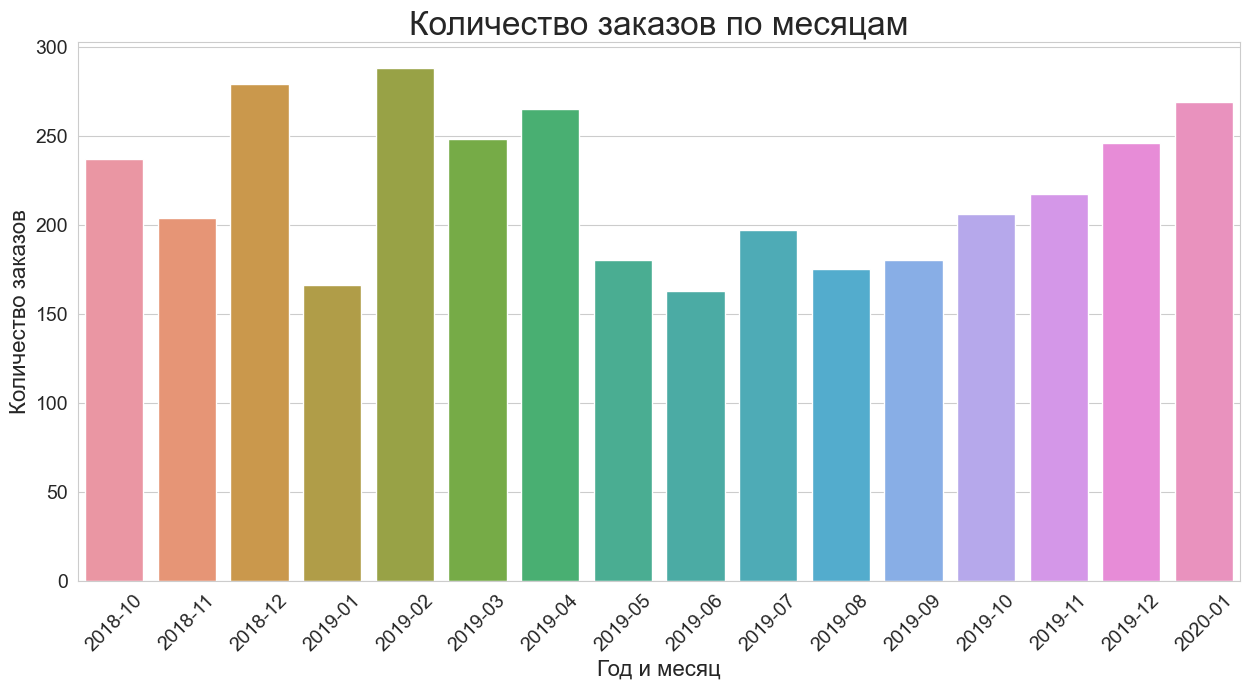


Среднее количество заказов в месяц 212


In [1482]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=data_month_orders, x='month', y='orders_quantity')
plt.title('Количество заказов по месяцам', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Количество заказов',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
print('Среднее количество заказов в месяц', round(data_month_orders['orders_quantity'].median()))

Среднее количество заказов в месяц 212

ТОП 3:  
2019-Февраль	288  
2018-Декабрь	279  
2020-Январь	269  

АНТИ ТОП 3:  
2019-Август	175    
2019-Январь	166  
2019-Июнь	163  

#### Средний чек

In [1483]:
monthly_avg_bill = data_month_revenue.merge(data_month_orders, on=['month'], how='left')

In [1484]:
monthly_avg_bill['avg_bill'] = round(monthly_avg_bill['revenue']/monthly_avg_bill['orders_quantity'],2)
monthly_avg_bill.sort_values(by=['avg_bill'], ascending=False).reset_index()

index    month        revenue  orders_quantity  avg_bill
0       1  2018-11  359772.000000              204   1763.59
1       8  2019-06  235319.000000              163   1443.67
2       0  2018-10  341089.000000              237   1439.19
3       3  2019-01  231657.000000              166   1395.52
4       7  2019-05  228857.000000              180   1271.43
5       2  2018-12  343676.000000              279   1231.81
6       6  2019-04  316183.000000              265   1193.14
7       9  2019-07  225526.000000              197   1144.80
8       4  2019-02  304054.000000              288   1055.74
9      10  2019-08  181231.000000              175   1035.61
10      5  2019-03  255704.000000              248   1031.06
11     12  2019-10  212040.000000              206   1029.32
12     11  2019-09  179346.000000              180    996.37
13     14  2019-12  202885.333333              246    824.74
14     15  2020-01  174036.333333              269    646.98
15     13  2019-11  128791.750000              217    593.51

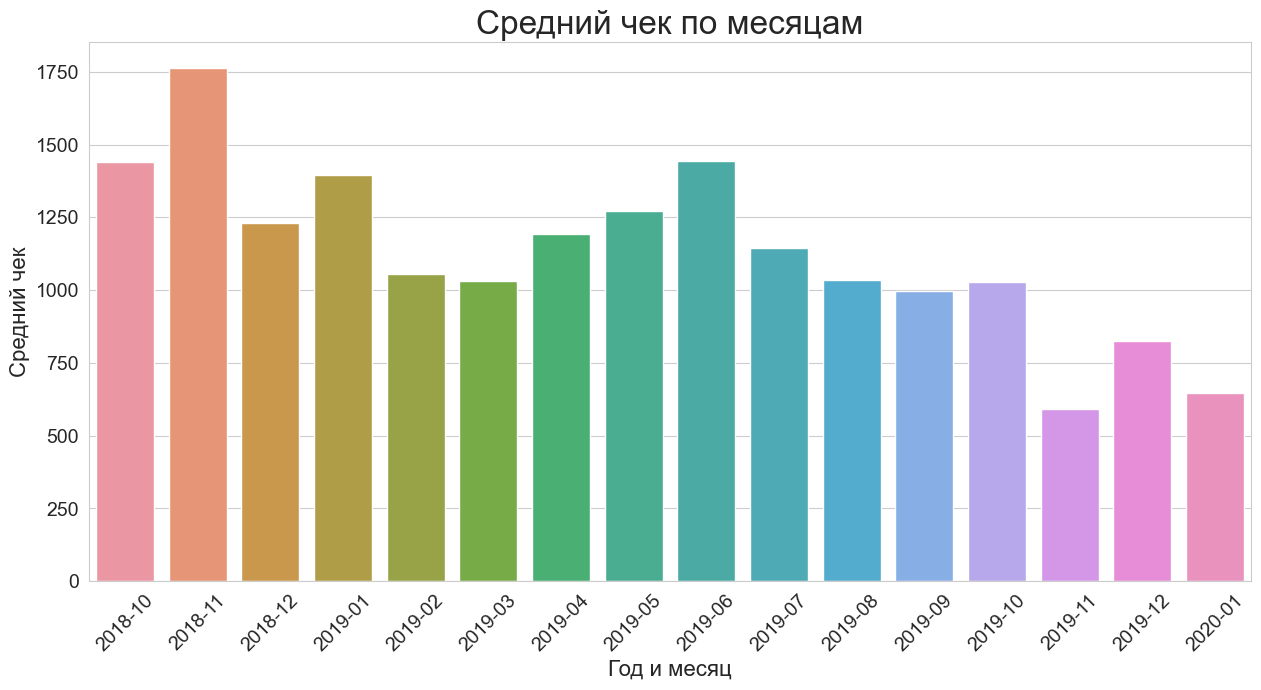


Средний чек 1100.27


In [1485]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=monthly_avg_bill, x='month', y='avg_bill')
plt.title('Средний чек по месяцам', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Средний чек',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
print('Средний чек', round(monthly_avg_bill['avg_bill'].median(),2))

Средний чек 1100.27   

На начало исследуемого периода средний чек выше.  
В целом можно сказать, что начало исследуемого периода было более удачным,  
Показатель количества заказов растет в конце периода, но показатели среднего чека и выручка падают.  

ТОП 3:  
2018-Ноябрь	1763.59   
2019-Июнь	1443.67   
2018-Октябрь	1439.19    

АНТИ ТОП 3:  
2019-Декабрь	824.74  
2020-Январь	646.98  
2019-Ноябрь	593.51  

#### Среднее количество наименований товаров в чеке

In [1486]:
#Посчитаем количество товаров по месяцам
month_quantity_in_bill = data.pivot_table(index=['month','order_id'], values=['quantity'], aggfunc=['sum']).reset_index()
month_quantity_in_bill.columns = ['month','order_id','quantity']
month_quantity_in_bill

month  order_id  quantity
0     2018-10     14480         3
1     2018-10     14481         4
2     2018-10     14482         2
3     2018-10     14485         4
4     2018-10     14486        10
...       ...       ...       ...
3515  2020-01    112601         1
3516  2020-01    112635         1
3517  2020-01    112657         1
3518  2020-01    112691         1
3519  2020-01    112779         1

[3520 rows x 3 columns]

In [1487]:
#посчитаем медианный показатель
round(month_quantity_in_bill.groupby(['month'])['quantity'].median().sort_values(ascending=False))

month
2019-05    2.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
2019-01    1.0
2019-02    1.0
2019-03    1.0
2019-04    1.0
2019-06    1.0
2019-07    1.0
2019-08    1.0
2019-09    1.0
2019-10    1.0
2019-11    1.0
2019-12    1.0
2020-01    1.0
Name: quantity, dtype: float64

In [1488]:
#посчитаем средний
round(month_quantity_in_bill.groupby(['month'])['quantity'].mean().sort_values(ascending=False))

month
2019-05    8.0
2018-10    6.0
2018-11    6.0
2019-06    6.0
2019-04    5.0
2019-03    4.0
2019-10    4.0
2019-01    4.0
2018-12    4.0
2019-02    3.0
2019-09    3.0
2019-07    3.0
2019-08    2.0
2020-01    1.0
2019-11    1.0
2019-12    1.0
Name: quantity, dtype: float64

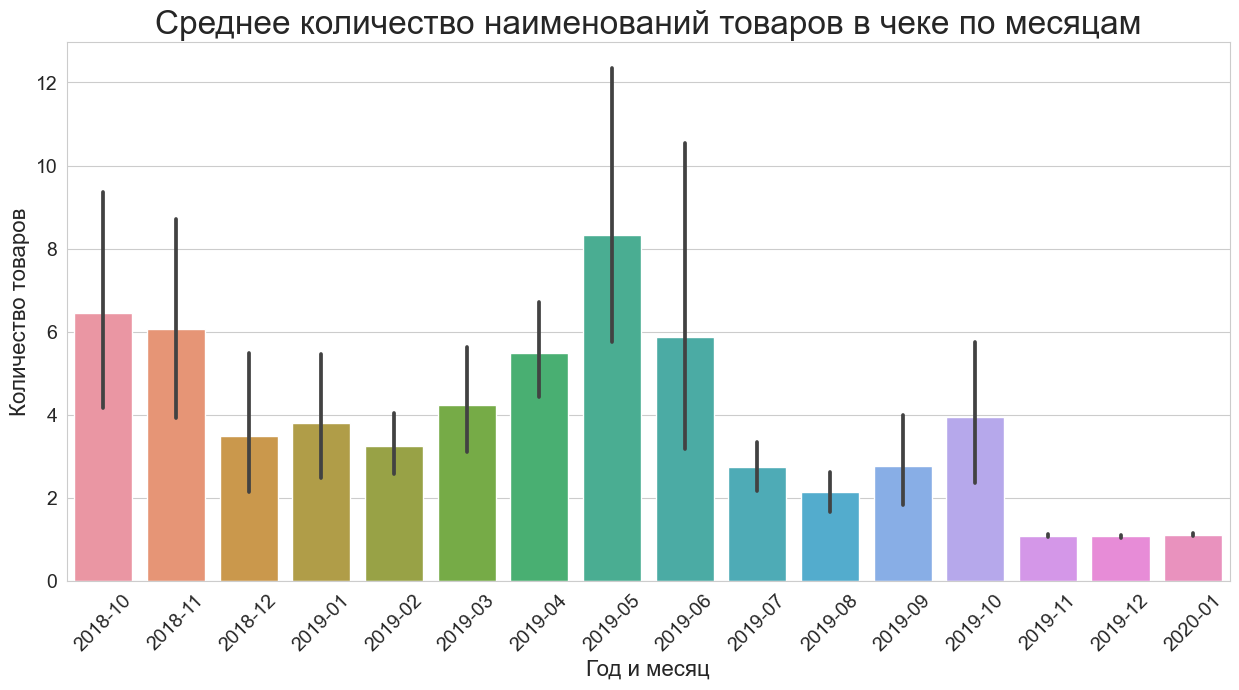

In [1489]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=month_quantity_in_bill, x='month', y='quantity')
plt.title('Среднее количество наименований товаров в чеке по месяцам', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Количество товаров',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()

In [1490]:
print('Среднее количество товаров в чеке по медиане', round(month_quantity_in_bill['quantity'].median()))
print('Среднее количество товаров в чеке по среднему', round(month_quantity_in_bill['quantity'].mean()))

Среднее количество товаров в чеке по медиане 1
Среднее количество товаров в чеке по среднему 4


Среднее количество товаров чеке в зависимости от месяца сезона варируется, количество товаров в чеке резко падает с ноября 2019.  

Наблюдается пик к маю.    
Самый лучший результат по среднему количеству товаров в чеке:  
Май 2019  
Октябрь 2018  
ноябрь 2018   

имеют худший показатель.  
ноябрь 2019   
декабрь 2019   
и январь 2020  

Сильный рост к июню может быть связан с дачным сезоном.  
А Новогодний сезон 2019-2020 в сравнение с предыдущим годом имеет большой разрыв.



In [1491]:
#посмотрим июнь поближе
#посчитаем количество купленых товаров на категорию
data.query('month == "2019-06"').groupby('type')['quantity'].sum().sort_values(ascending=False)

type
furniture_and_repair    427
gardening               163
decor_and_gifts         130
textile                 119
closing                  38
bathroom                 35
bags_n_carts             19
citchen                  19
cleanup                   8
appliances                1
Name: quantity, dtype: int64

In [1492]:
#посчитаем количество заказов на категорию в июне месяце
data.query('month == "2019-06"').groupby('type')['order_id'].nunique().sort_values(ascending=False)

type
gardening               38
decor_and_gifts         33
closing                 32
textile                 26
bags_n_carts            18
furniture_and_repair    15
bathroom                11
citchen                  9
cleanup                  7
appliances               1
Name: order_id, dtype: int64

In [1493]:
#посмотрим конец периода поближе
#посчитаем количество купленых товаров на категорию
data.query('month == "2019-11" or month =="2019-12" or month =="2020-01"').groupby('type')['quantity'].sum().sort_values(ascending=False)

type
gardening               180
decor_and_gifts         172
closing                 107
citchen                  94
cleanup                  61
furniture_and_repair     56
textile                  45
bags_n_carts             42
bathroom                 28
appliances               17
Name: quantity, dtype: int64

In [1494]:
#посчитаем количество заказов на категорию в июне месяце
data.query('month == "2019-11" or month =="2019-12" or month =="2020-01"').groupby('type')['order_id'].nunique().sort_values(ascending=False)

type
gardening               163
decor_and_gifts         159
closing                  97
citchen                  91
furniture_and_repair     53
cleanup                  51
textile                  41
bags_n_carts             38
bathroom                 26
appliances               13
Name: order_id, dtype: int64

Интересно, что в июне наибольшее количество купленых товаров приходится на категорию - Мебель и ремонт,  
а заказов на сад и огород.   
Летний сезон как правило сопряжен со стройкой, этим объесняется популярность категории Мебель и ремонт, в которой так же много комплектующих для мебели, которые можно поместить в сопутствующие товары.  
Сад и огород объясним дачным сезоном. Декор и подарки так же тематически связан, как и текстиль.  

В конце исследуемого периода наибольшей популярностью пользуются категории Сад и огород, Декор и подарки, Товары для одежды, как по заказам, так и по количеству товаров.

#### Количество клиентов по месяцам

In [1495]:
month_customers = data.pivot_table(index=['month'], values=['customer_id'], aggfunc=['nunique']).reset_index()
month_customers.columns = ['month','customers_quantity']
month_customers.sort_values(by=['customers_quantity'],ascending=False).reset_index()

index    month  customers_quantity
0      15  2020-01                 269
1       4  2019-02                 246
2      14  2019-12                 246
3       6  2019-04                 236
4       5  2019-03                 233
5       2  2018-12                 229
6      13  2019-11                 217
7       9  2019-07                 185
8       0  2018-10                 178
9       1  2018-11                 178
10     12  2019-10                 177
11     11  2019-09                 173
12      7  2019-05                 166
13     10  2019-08                 166
14      8  2019-06                 153
15      3  2019-01                 150

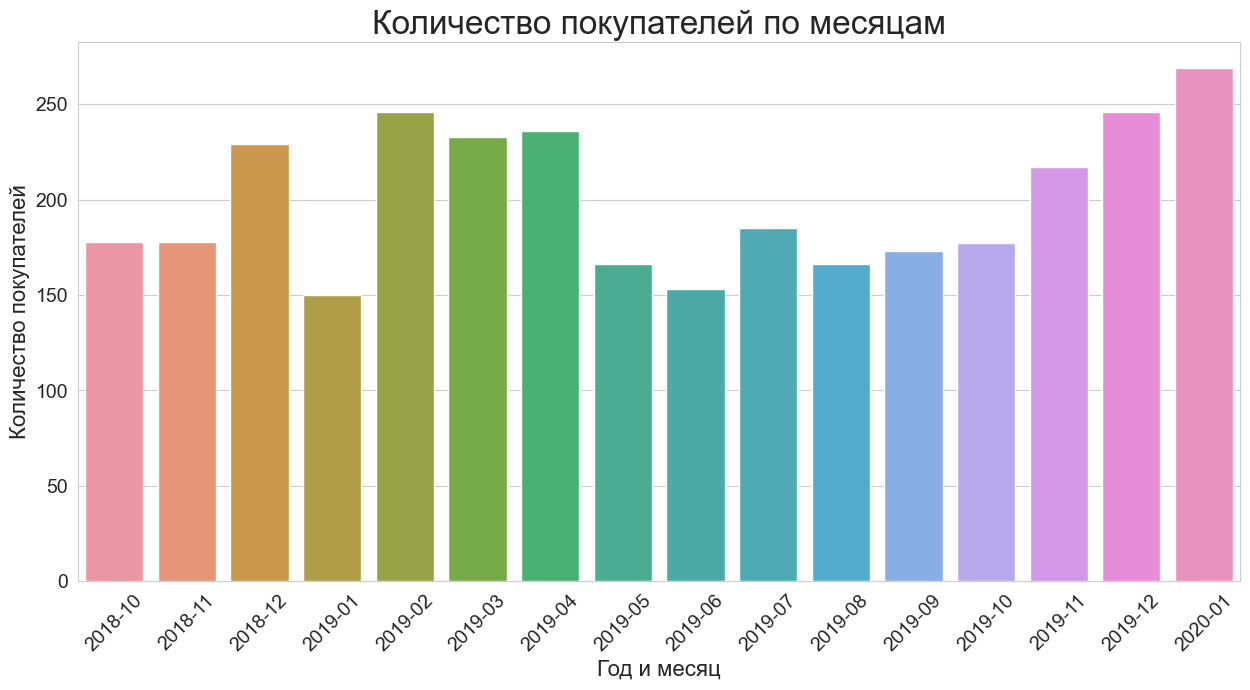

In [1496]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=month_customers, x='month', y='customers_quantity')
plt.title('Количество покупателей по месяцам', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Количество покупателей',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()

In [1497]:
print('Среднее количество покупателей в месяц', month_customers['customers_quantity'].median())

Среднее количество покупателей в месяц 181.5


In [1498]:
#посмотрим январь поближе
#посчитаем количество клиентов на категорию
data.query('month == "2020-01"').groupby('type')['customer_id'].nunique().sort_values(ascending=False)

type
gardening               67
decor_and_gifts         61
closing                 36
citchen                 34
furniture_and_repair    20
cleanup                 17
textile                 15
bags_n_carts             9
appliances               5
bathroom                 5
Name: customer_id, dtype: int64

In [1499]:
#посчитаем количество заказов на категорию в июне месяце
data.query('month == "2020-01"').groupby('type')['order_id'].nunique().sort_values(ascending=False)

type
gardening               67
decor_and_gifts         61
closing                 36
citchen                 34
furniture_and_repair    20
cleanup                 17
textile                 15
bags_n_carts             9
appliances               5
bathroom                 5
Name: order_id, dtype: int64

In [1500]:
#посчитаем количество товаров на категорию в июне месяце
data.query('month == "2020-01"').groupby('type')['quantity'].sum().sort_values(ascending=False)

type
gardening               78
decor_and_gifts         67
closing                 40
citchen                 36
furniture_and_repair    22
cleanup                 20
textile                 16
bags_n_carts            10
appliances               7
bathroom                 5
Name: quantity, dtype: int64

Среднее количество покупателей в месяц 181.5

ТОП 3  
2020-Январь	269  
2019-Февраль	246  
2019-Декабрь	246  

АНТИ ТОП 3:  
2019-Август	166  
2019-Июнь	153  
2019-Январь	150  

Можно отметить положительную динамику к концу исследуемого периода.  
В топе по категориям в январе 2020 Сад и огород, Декор и подарки, Товары для одежды.

#### Среднее количество заказов на покупателя в месяц.

In [1501]:
month_orders_by_customers = data.pivot_table(index=['month','customer_id'], values=['order_id'], aggfunc=['nunique']).reset_index()
month_orders_by_customers.columns = ['month','customer_id','orders_quantity']
month_orders_by_customers
round(month_orders_by_customers.groupby(['month'])['orders_quantity'].median())

month
2018-10    1.0
2018-11    1.0
2018-12    1.0
2019-01    1.0
2019-02    1.0
2019-03    1.0
2019-04    1.0
2019-05    1.0
2019-06    1.0
2019-07    1.0
2019-08    1.0
2019-09    1.0
2019-10    1.0
2019-11    1.0
2019-12    1.0
2020-01    1.0
Name: orders_quantity, dtype: float64

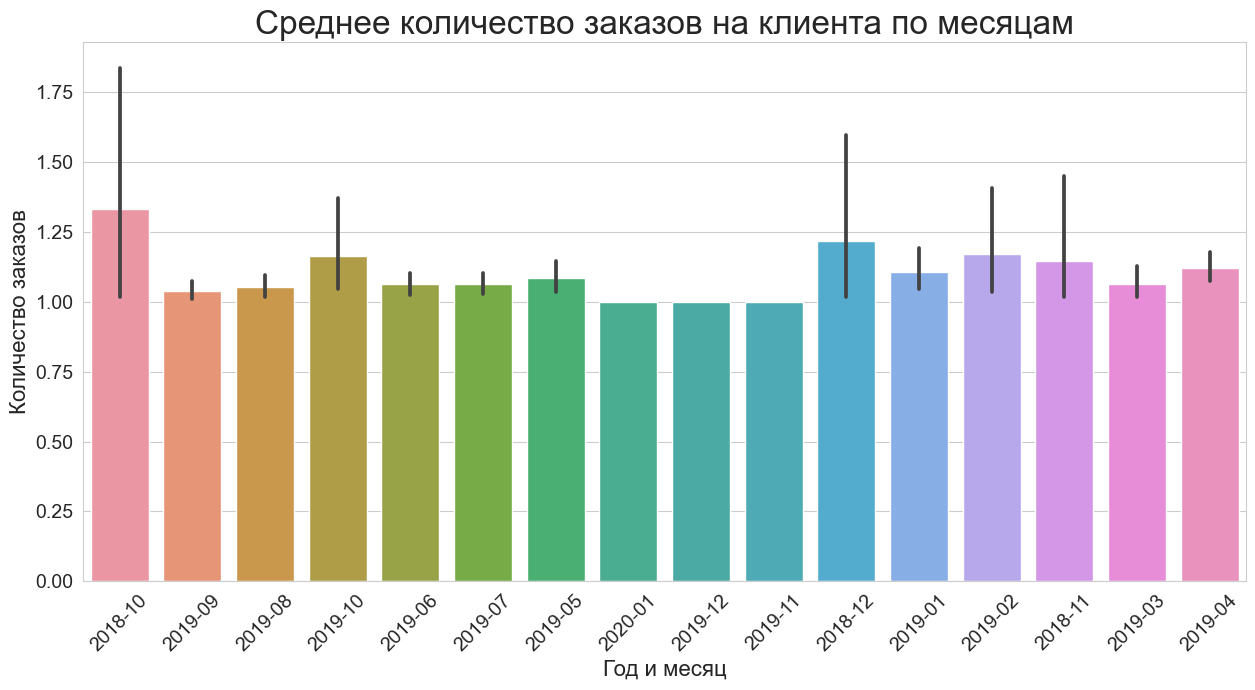

In [1502]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=month_orders_by_customers.sort_values(by=['orders_quantity']), x='month', y='orders_quantity')
plt.title('Среднее количество заказов на клиента по месяцам', size=24)
plt.xlabel('Год и месяц',size=16)
plt.ylabel('Количество заказов',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()

In [1503]:
print('Среднее количество заказов на клиента', data.groupby(['customer_id'])['order_id'].nunique().median())
print('Минимальное количество заказов на клиента', data.groupby(['customer_id'])['order_id'].nunique().min())
print('Максимальное количество заказов на клиента', data.groupby(['customer_id'])['order_id'].nunique().max())

Среднее количество заказов на клиента 1.0
Минимальное количество заказов на клиента 1
Максимальное количество заказов на клиента 126


Среднем клиенты не совершают больше одной покупки. Это касается как каждого отдельно взятого месяца, так и всего исследуемого периода вместе взятого. Посмотрим распределение количества заказов на покупателя за все время.

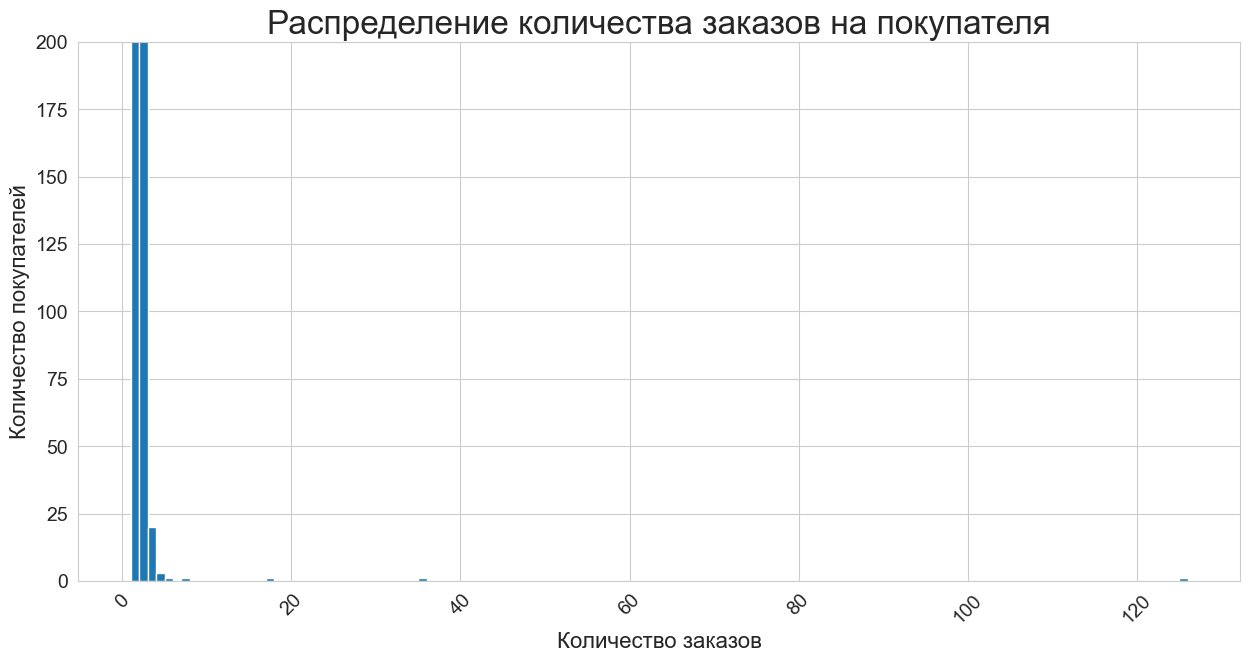

In [1504]:
plt.subplots(figsize=(15, 7))
data.groupby(['customer_id'])['order_id'].nunique().hist(bins=125)
plt.title('Распределение количества заказов на покупателя', size=24)
plt.xlabel('Количество заказов',size=16)
plt.ylabel('Количество покупателей',size=16)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.ylim(0, 200)
plt.show()

Видны небольшие пеньки в районе около 20 заказов, около 40 заказов и пенек по всей видимости с 125 заказами.


#### Средняя частота покупок  
Посмотрим среднюю частоту покупок.  
В дс собраны данные за 1 год и 4 месяца (т.е. 1.33... года).

In [1505]:
print('Средняя частота покупок на весь исследуемый период:', round(data['customer_id'].nunique()/data['order_id'].nunique(),2))

Средняя частота покупок на весь исследуемый период: 0.69


In [1506]:
print('Среднее время между покупками {} года'.format(1.33/data['customer_id'].nunique()/data['order_id'].nunique()))

Среднее время между покупками 1.5555410007859577e-07 года


In [1507]:
print('Средняя частота покупок в год (данные за 2019 г.):', round(data.query('date.dt.year == 2019')['customer_id'].nunique()/data.query('date.dt.year == 2019')['order_id'].nunique(),2))
print('Среднее время между покупками:', 365/round(data.query('date.dt.year == 2019')['customer_id'].nunique()/data.query('date.dt.year == 2019')['order_id'].nunique(),2))

Средняя частота покупок в год (данные за 2019 г.): 0.8
Среднее время между покупками: 456.25


Как было видно из количества заказов на покупателя, пользователи в среднем совершают 1 заказ.  
Средняя частота покупок в год по 2019 году - 0.8, что значит что в среднем покупатели совершают повторные покупки реже раза в год.  

####  Итог  (основные показатели)

**Общие показатели** 
Количество клиентов к концу исследуемого периода вырасло, количество заказов так же имеет положительную динамику, количество проданных товароов и выручка упали.  
Количество заказов в конце исслебуемого периода доходит до 25 в день, то же касается и количества покупателей.  
До начала лета 2019 можно увидеть достаточно много всплесков по количеству товаров больше 50, то же касается выручки.  
Так же в количестве товаров наблюдается всплеск в осенний период: октябрь/ноябрь. Выручка тоже снижается к концу исследуемого периода, однако, как мы видели на графике динамике основных показателей в относительных значениях спад не такой резкий, как у количества заказов. 

**Выручка** 

Средняя выручка в месяц 230257.0

TОП 3:
2018-Ноябрь 359772.000000
2018-Декабрь 343676.000000
2018-Октябрь 341089.000000

АНТИ ТОП 3:

2019-Сентябрь 179346.000000
2020-Январь 174036.333333
2019-Ноябрь 128791.750000  

**Количество заказов** 

Среднее количество заказов в месяц 212

ТОП 3:  
2019-Февраль	288  
2018-Декабрь	279  
2020-Январь	269  

АНТИ ТОП 3:  
2019-Август	175    
2019-Январь	166  
2019-Июнь	163  

**Средний чек** 

Средний чек 1100.27   

На начало исследуемого периода средний чек выше.  
В целом можно сказать, что начало исследуемого периода было более удачным,  
Показатель количества заказов растет в конце периода, но показатели среднего чека и выручка падают.  

ТОП 3:  
2018-Ноябрь	1763.59   
2019-Июнь	1443.67   
2018-Октябрь	1439.19    

АНТИ ТОП 3:  
2019-Декабрь	824.74  
2020-Январь	646.98  
2019-Ноябрь	593.51  

**Количество наименований в чеке**  

Наблюдается пик к маю.    
Самый лучший результат по среднему количеству товаров в чеке:  
Май 2019  
Октябрь 2018  
ноябрь 2018   

имеют худший показатель.  
ноябрь 2019   
декабрь 2019   
и январь 2020  

**Количество покупателей**

Среднее количество покупателей в месяц 181.5

ТОП 3  
2020-Январь	269  
2019-Февраль	246  
2019-Декабрь	246  

АНТИ ТОП 3:  
2019-Август	166  
2019-Июнь	153  
2019-Январь	150  

С среднем покупатели не делают больше одного заказа.  

Средняя **частота покупок** на весь исследуемый период: 0.69
Как было видно из количества заказов на покупателя, пользователи в среднем совершают 1 заказ. 
Средняя частота покупок в год по 2019 году - 0.8, что значит что в среднем покупатели совершают повторные покупки реже раза в год.  

В целом можно наблюдать снижение выручки к концу исследуемого периода при возросшем количестве заказов, что свидетельствует о снижении среднего чека.  
Наибольшее количество заказов приходится на период новогодних праздников.  

Всплеск количества проданных товаров в апреле может быть связан с подготовкой к летнему дачному сезону, выручка небольшая, возможно закупалось большое количество товаров небольшой стоимости, рассаду к примеру, редко покупают по 1.  

В первой половине исслед. периода так же заметны всплески по количеству товаров, которые могут быть связаны с оптовыми закупками.  
Количество заказов в летние месяцы снижается, что может быть связано с сезоном отпусков.  

Среднее количество заказов на одного клиента практически не изменяется на протяжение всего времени, это говорит о слабом удержании, что подтверждается и низкой частотой. Следует обратить внимание на систему лояльности, выявить огрехи если она есть, или разработать ее если она не практикуется.  

Интересно что в начале исследуемого периода количество проданных товаров находится на самом пике, вместе с этим и самая высокая выручка, в конце исследуемого периода на меньшее количество проданного товара приходится большая выручка. Можно предположить, что в конце периода приобретались товары более догорих категорий.  

### Исследование основных категорий товаров   

Рассмотрим основные категории товаров по стоимости/спросу.  
Сначала оценим визуально в целом распределение количества товаров по категориям

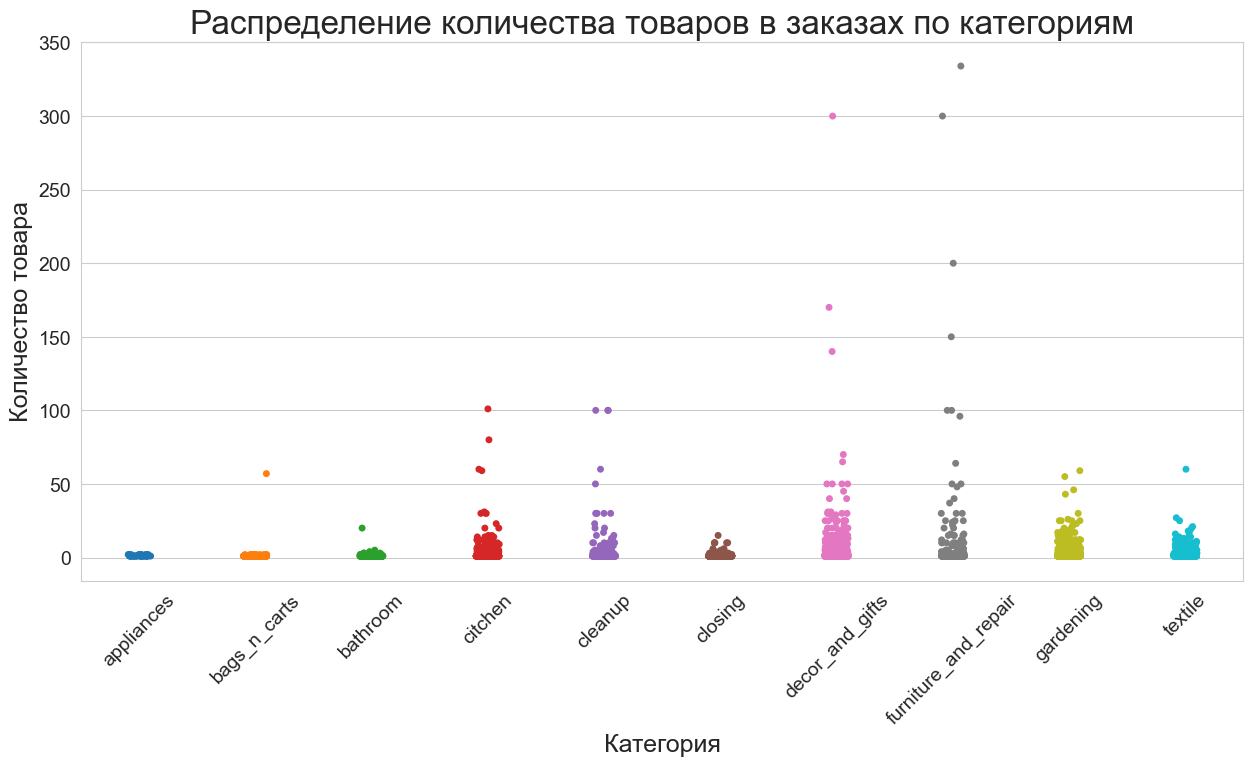

In [1508]:
quantity_in_orders = data.groupby(['type', 'order_id']).agg(
    {'quantity':'sum'}).reset_index()

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.stripplot(data=quantity_in_orders, x='type', y='quantity')
plt.title('Распределение количества товаров в заказах по категориям', size=24)
plt.xlabel('Категория', size=18)
plt.ylabel('Количество товара',size=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Наибольшее количество товаров в заказ приходится на категорию Мебель и ремонт, далее Декор и подарки, Товары для кухни и Товары для уборки.   

Наименьшее на категории Техника, Сумкии тележки и Товары для ванной.

#### Стоимость 

In [1509]:
data.groupby(['type'])['price'].median().sort_values(ascending=False)

type
bags_n_carts            1087.0
closing                  614.0
bathroom                 600.0
furniture_and_repair     389.0
appliances               280.5
cleanup                  224.0
citchen                  187.0
textile                  150.0
gardening                120.0
decor_and_gifts          112.0
Name: price, dtype: float64

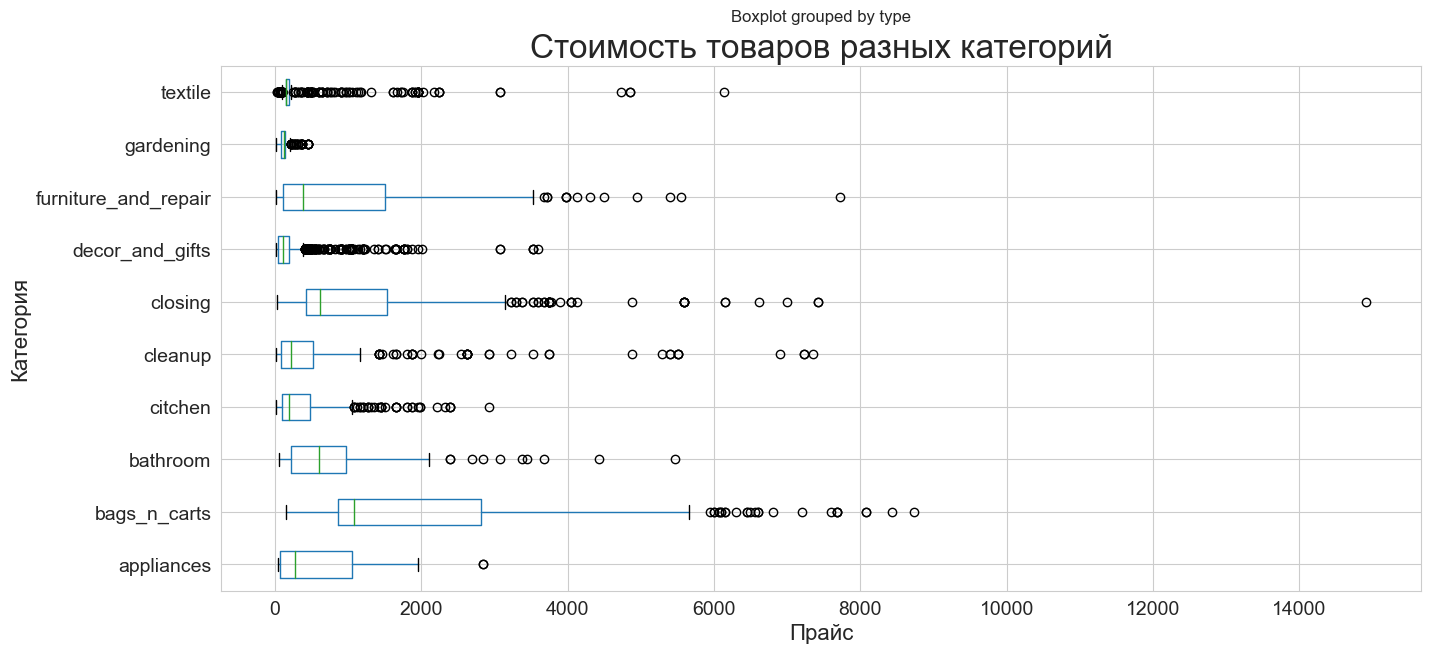

In [1510]:
data.boxplot(column=['price'], by=['type'], vert=False, figsize=(15, 7))
plt.title('Стоимость товаров разных категорий', size=24)
plt.xlabel('Прайс',size=16)
plt.ylabel('Категория',size=16)
plt.xticks(size=14)
plt.yticks(size=14)
#plt.ylim(0,8000)
plt.show()

Самой дорогой категорией можно назвать сумки и тележки, а самой дешевой категорию Сад и огород.  
Топ 3 категорий товаров по выгодности продаж: Сумки и тележки, Товары для одежды, Мебель и ремонт.  
Наименее выгодные Сад и огород, Другое, Товары для кухни, Текстиль.

#### Спрос

In [1511]:
type_pivot = data.pivot_table(index=['month','type'], values=['quantity'], aggfunc=['sum']).reset_index()
type_pivot.columns = ['month','type','pieces_amount']
type_pivot.groupby(['type'])['pieces_amount'].sum().sort_values(ascending=False)

type
decor_and_gifts         3695
furniture_and_repair    2401
gardening               2099
citchen                 1273
textile                 1163
cleanup                 1144
closing                  808
bags_n_carts             434
bathroom                 243
appliances                51
Name: pieces_amount, dtype: int64

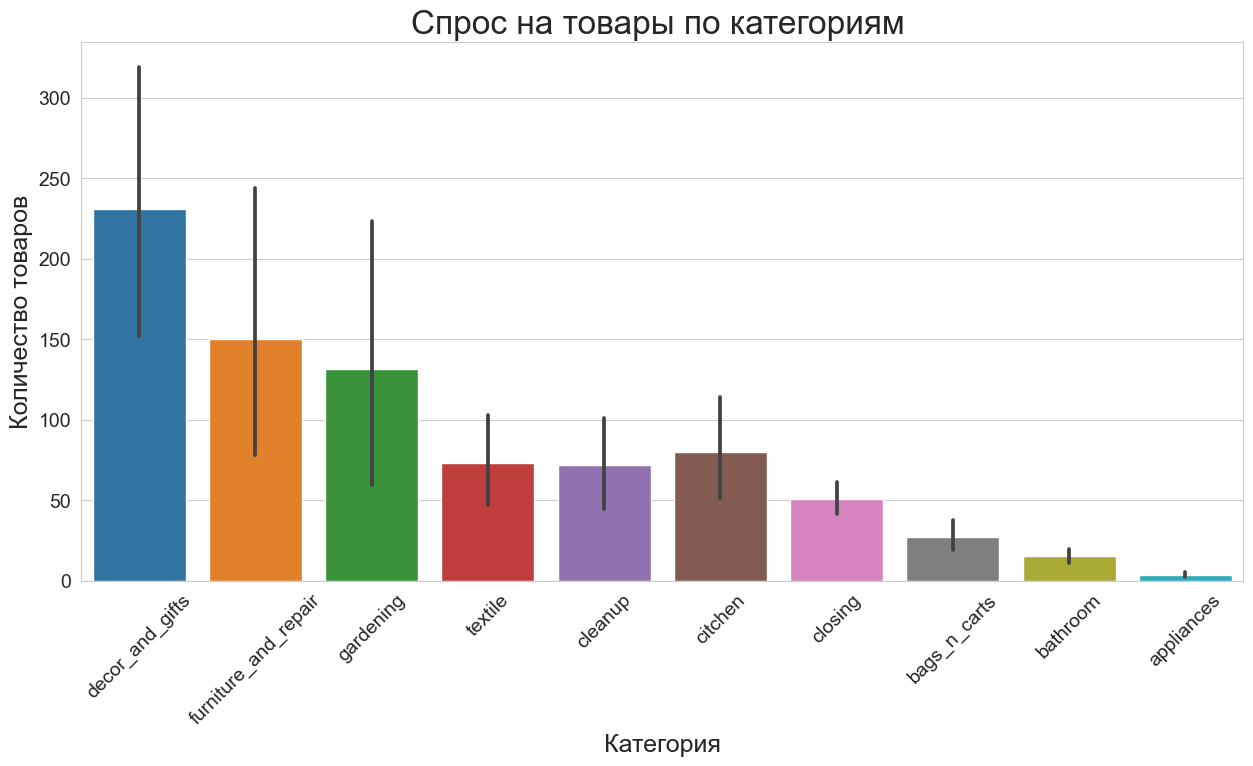

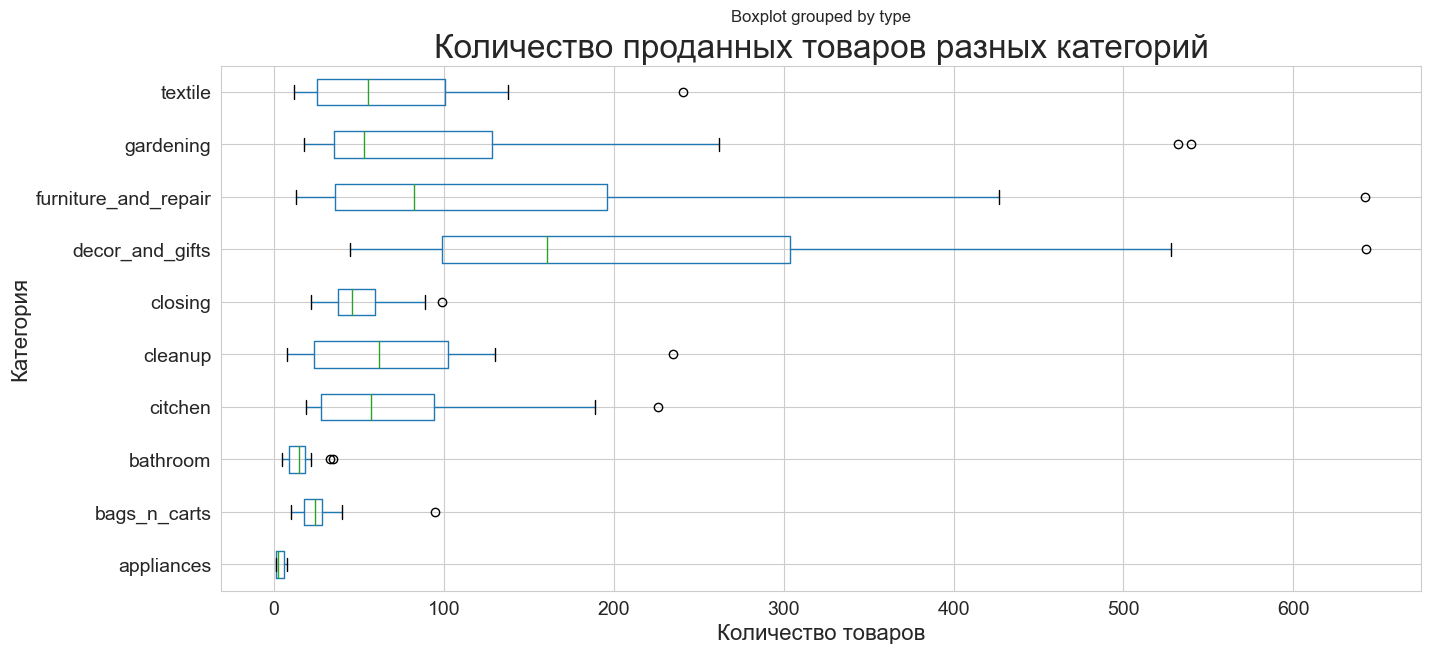

In [1512]:
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.barplot(data=type_pivot.sort_values(by=['pieces_amount'],ascending=False), x='type', y='pieces_amount')
plt.title('Cпрос на товары по категориям ', size=24)
plt.xlabel('Категория', size=18)
plt.ylabel('Количество товаров',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
type_pivot.boxplot(column=['pieces_amount'], by=['type'], vert=False, figsize=(15, 7))
plt.title('Количество проданных товаров разных категорий', size=24)
plt.xlabel('Количество товаров',size=16)
plt.ylabel('Категория',size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

По суммарным показателям.

ТОП 3:  
Декор и подарки,  
Мебель и ремонт,  
Сад и огород  

АНТИ ТОП 3:  
Сумки и тележки,  
Товары для ванной,  
Техника и комплектующие

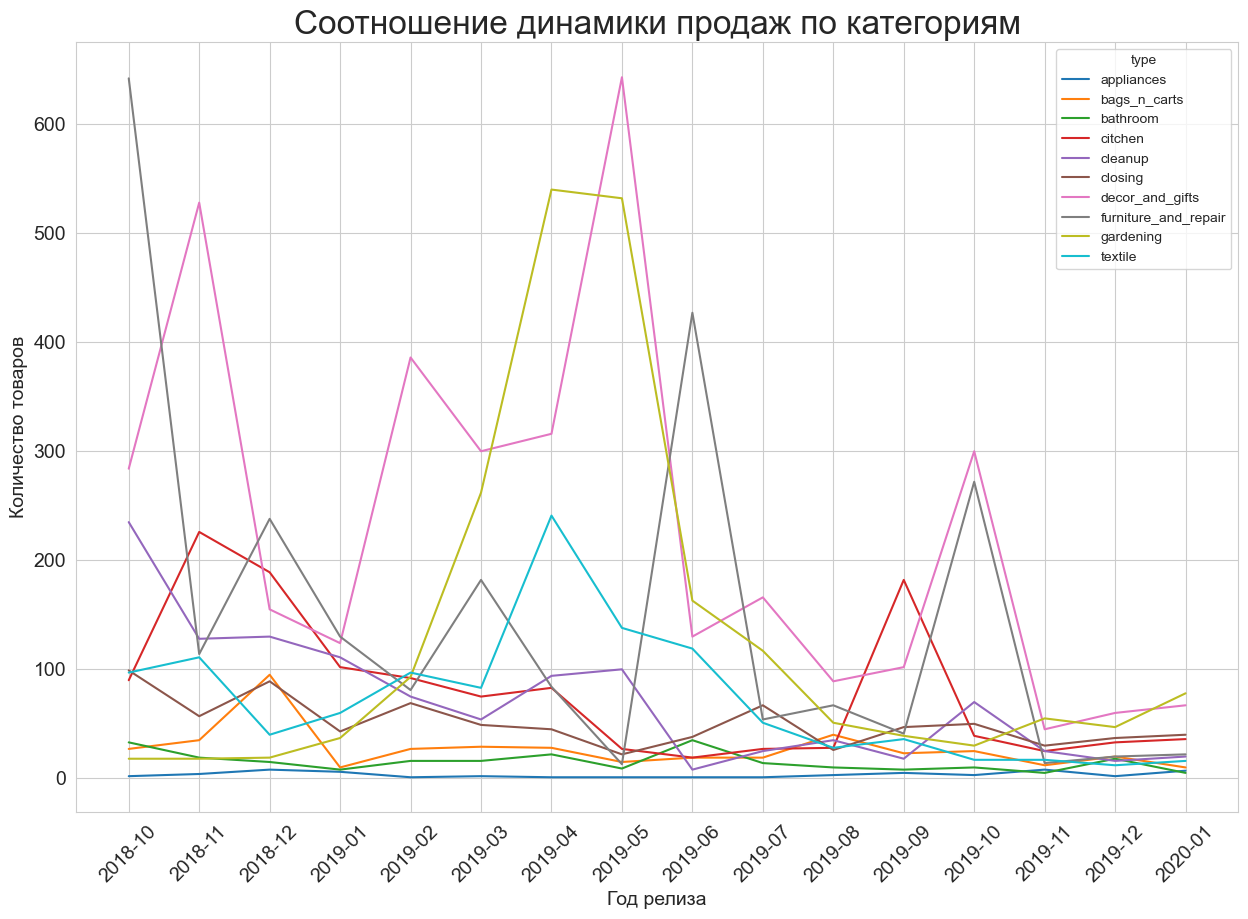

In [1513]:
plt.subplots(figsize=(15, 10))
sns.set_style("whitegrid")
sns.lineplot(data=type_pivot,
             x='month', y='pieces_amount', hue='type')
plt.title('Соотношение динамики продаж по категориям', size=24)
plt.xlabel('Год релиза', size=14)
plt.ylabel('Количество товаров',size=14)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
#plt.ylim(0,200)
plt.show()

Сумки и тележки: пик в декабре 2018, небольшой подъем в августе 2019. 

Товары для одежды: Декабрь 2018, Июль 2019, сентябрь-октябрь 2019.  

Товары для ванной: небольшой подъем в Июне 2019. В целом товары для ванной одна из категорий с наименьшим спросом.

Мебель и ремонт имеет пики: Декабрь 2018, Март 2019, Июнь 2019, Октябрь 2019.  

Техника и комплектующие: не имеет выраженных типов, спрос самый низкий.  

Товары для уборки: постепенное снижение во второй половине исследуемого периода, подьемы в мае и октябре 2019

Товары для кухни: удачные месяцы ноябрь 2018 и сентябрь 2019.  

Вспышка покупок Текстиля происходит в Апреле 2019.  

Для категории Сад и огород самый активный период апрель-май 2019.  

Категория Декор и подарки имеет 4 выраженных пика: Ноябрь 2018, Февраль 2019, Май 2019, Октябрь 2019.  

#### Итог (категории товаров)

**Средняя цена товара по категориям**  по убыванию средней стоимости.  
bags_n_carts            1087.0  
closing                  614.0  
bathroom                 600.0  
furniture_and_repair     389.0  
appliances               280.5  
cleanup                  224.0   
citchen                  187.0  
textile                  150.0  
gardening                120.0  
decor_and_gifts          112.0  


Самой дорогой категорией можно назвать сумки и тележки, а самой дешевой категорию Декор и подарки.  

**Количество товаров по категориям**  
decor_and_gifts         3695  
furniture_and_repair    2401  
gardening               2099  
citchen                 1273  
textile                 1163  
cleanup                 1144  
closing                  808  
bags_n_carts             434  
bathroom                 243  
appliances                51  

**Динамика продаж**   

Сумки и тележки: пик в декабре 2018, небольшой подъем в августе 2019. 

Товары для одежды: Декабрь 2018, Июль 2019, сентябрь-октябрь 2019.  

Товары для ванной: небольшой подъем в Июне 2019. В целом товары для ванной одна из категорий с наименьшим спросом.

Мебель и ремонт имеет пики: Декабрь 2018, Март 2019, Июнь 2019, Октябрь 2019.  

Техника и комплектующие: не имеет выраженных типов, спрос самый низкий.  

Товары для уборки: постепенное снижение во второй половине исследуемого периода, подьемы в мае и октябре 2019

Товары для кухни: удачные месяцы ноябрь 2018 и сентябрь 2019.  

Вспышка покупок Текстиля происходит в Апреле 2019.  

Для категории Сад и огород самый активный период апрель-май 2019.  

Категория Декор и подарки имеет 4 выраженных пика: Ноябрь 2018, Февраль 2019, Май 2019, Октябрь 2019.  

## Сегментация пользователей и исследование товарных предпочтений
- RFM анализ:
распределим покупателей на сегменты с учётом времени с момента последнего приобретения (Recency), частоты покупок (Frequency) и суммы потраченных средств (Monetary)
- исследование товарных предпочтений покупателей
- подведение итогов  

### Сегментация пользователей RFM   

Для данного исследования мы выбрали RFM анализ.  
Нам необходимо разделить пользователей по трем параметрам: давности приобретеня ими товаров, частеоте покупок и сумме потраченых средств.  
Для этого анализа нам необходимо создать отдельный датасет.  
Для определения параметра давности датой "отсчета" будем считать дату последнего совершенного заказа 2020-01-31 15:00:00

#### Подготовка данных для RFM анализа

In [1514]:
# создаем датасет с необходимыми данными
now=data['date'].max()
rfm_data = data.groupby('customer_id').agg({'date': lambda x: (now - x.max()).days, #считаем давность последней покупки
                                                'order_id': lambda x: len(x.unique()), # частоту
                                                'cost': lambda x: x.sum()}) #сумму потраченых средств

rfm_data.columns=['recency','frequency','monetary'] #переименуем столбцы

#смотри данные отсортированные по частоте
rfm_data.sort_values(by=['frequency'], ascending=False).head()

recency  frequency  monetary
customer_id                                                       
c971fb21-d54c-4134-938f-16b62ee86d3b      331        126  159508.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db      464         35   57278.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58       92         17   21361.0
b7b865ab-0735-407f-8d0c-31f74d2806cc      282          7    3779.0
0184f535-b60a-4914-a982-231e3f615206      253          5    5681.0

In [1515]:
#Смотрим показатели клиентов по давности (ТОП 5) (недавно совершившие покупку)
rfm_data.sort_values(by=['recency']).head()

recency  frequency  monetary
customer_id                                                       
2e460a26-35af-453d-a369-a036e95a40e0        0          2     223.0
cdd17932-623e-415f-a577-3b31312fd0e2        0          2     727.0
63208953-a8e4-4f77-9b47-3a46e7b72eee        0          2     675.0
2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6        0          2     953.0
d99d25f1-4017-4fcd-8d29-c580cc695a1a        0          2    1993.0

In [1516]:
#Смотрим показатели клиентов по монетизации (ТОП 5)
rfm_data.sort_values(by=['monetary'], ascending=False).head()

recency  frequency  monetary
customer_id                                                       
c971fb21-d54c-4134-938f-16b62ee86d3b      331        126  159508.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db      464         35   57278.0
58a4c3cc-504f-43ea-a74a-bae19e665552      381          2   53232.0
146cd9bf-a95c-4afb-915b-5f6684b17444      234          1   49432.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a      286          4   41900.0

In [1517]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2429 entries, 000d6849-084e-4d9f-ac03-37174eaf60c4 to ffe82299-3f5b-4214-87fe-3d36ecccfac3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    2429 non-null   int64  
 1   frequency  2429 non-null   int64  
 2   monetary   2429 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.9+ KB


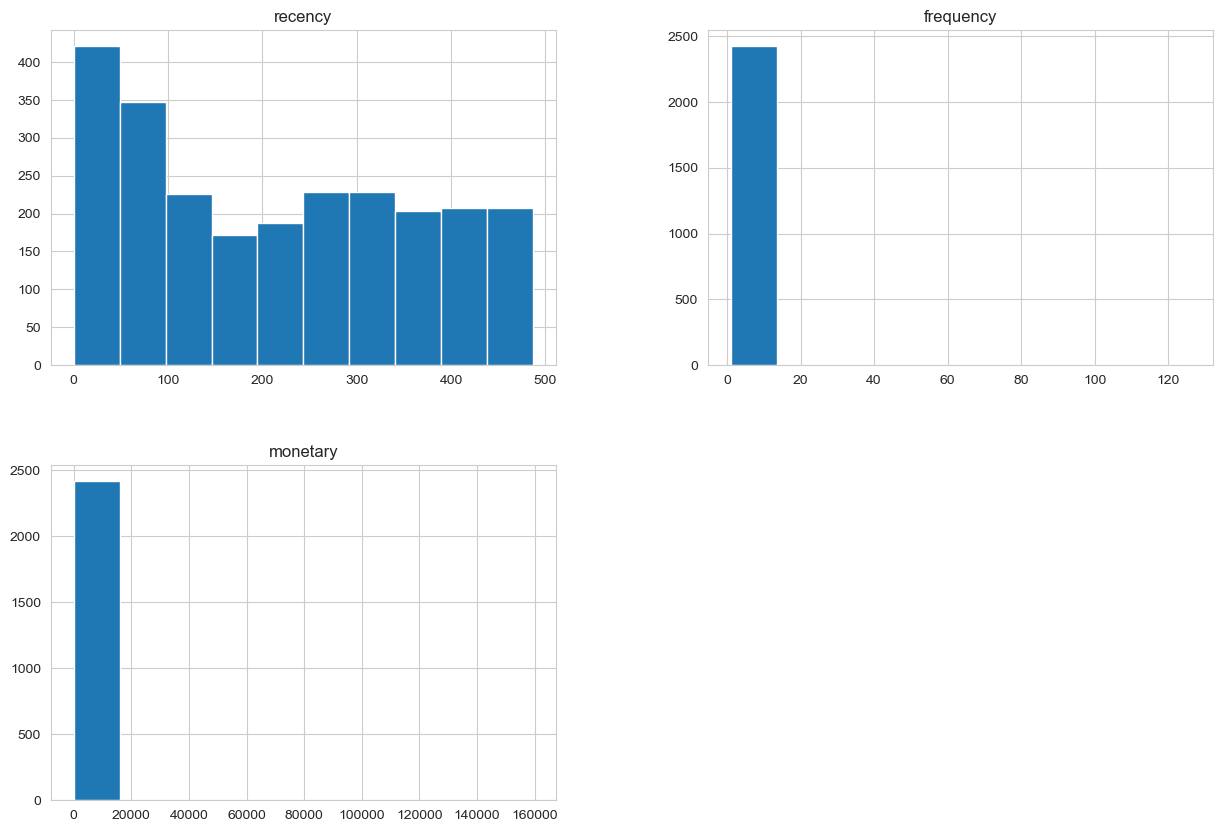

In [1518]:
rfm_data.hist(figsize=(15, 10))
plt.show()

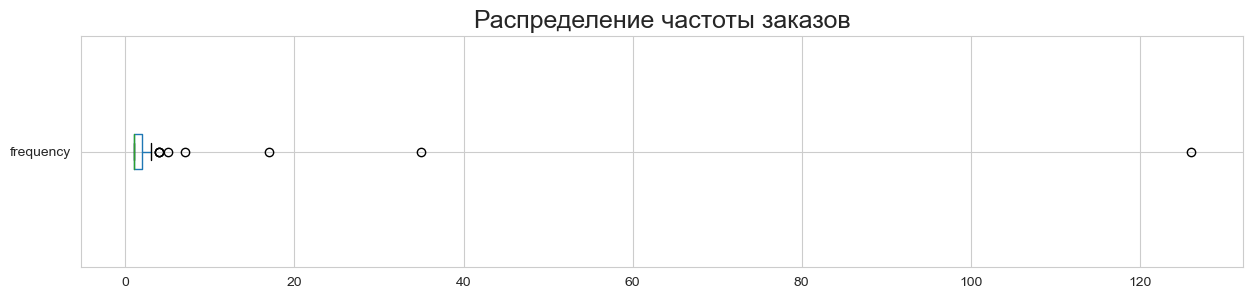

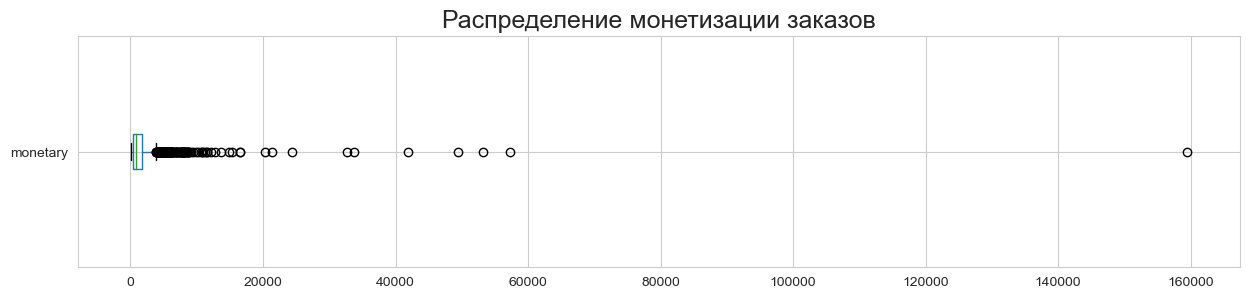

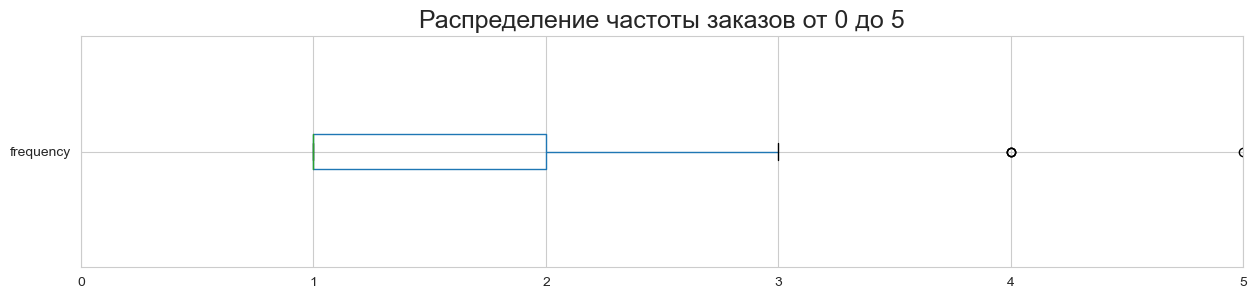

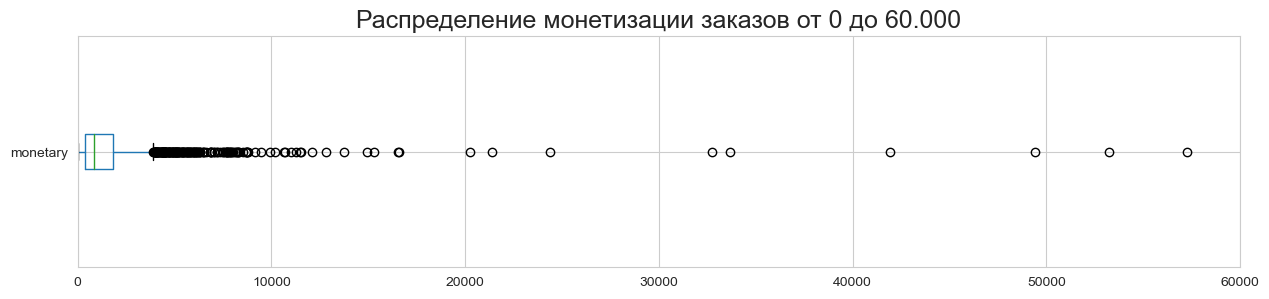

In [1519]:
rfm_data.boxplot(['frequency'], vert=False, figsize=(15, 3))
plt.title('Распределение частоты заказов', size=18)
plt.show()

rfm_data.boxplot(['monetary'], vert=False, figsize=(15, 3))
plt.title('Распределение монетизации заказов', size=18)
plt.show()

rfm_data.boxplot(['frequency'], vert=False, figsize=(15, 3))
plt.title('Распределение частоты заказов от 0 до 5', size=18)
plt.xlim(0,5)
plt.show()

rfm_data.boxplot(['monetary'], vert=False, figsize=(15, 3))
plt.title('Распределение монетизации заказов от 0 до 60.000', size=18)
plt.xlim(0,60000)
plt.show()

In [1520]:
rfm_data.describe()

recency    frequency       monetary
count  2429.000000  2429.000000    2429.000000
mean    215.182380     1.449156    1613.901777
std     148.993814     2.689519    4312.268637
min       0.000000     1.000000      15.000000
25%      73.000000     1.000000     396.000000
50%     208.000000     1.000000     831.000000
75%     343.000000     2.000000    1797.000000
max     487.000000   126.000000  159508.000000

Посчитаем границы групп используя квинтили.

In [1521]:
#применим метод 
quantiles = rfm_data.quantile(q=[0.25,0.5,0.75])
quantiles

recency  frequency  monetary
0.25     73.0        1.0     396.0
0.50    208.0        1.0     831.0
0.75    343.0        2.0    1797.0

В целом о потребительском поведении можно сказать следующее:  
Давность покупки. В первый квинтиль попали пользователи совершившие покупку в течение последних полутора месяцев, второй - от полутора до 7 месяцев, от семи месяцев до года(11,5 месяцев), и последняя группа больше 11,5.  
Частота. Первый и второй квинтили имеют одинаковое значение - 1, у третьей группы 2, и четвертой частота больше 2.  
Монетизация. В первой группе оказались пользователи в общей сложности потратившие меньше 396.5 р. Во второй от 396.5 до 840, в третьей 840.0 - 1798.5р, и четвертой больше 1798.5. 

Чтобы разделить группы нам нужно обозначить примерные рамки, которые характерны для товаров предствленных в магазине.  

Согласно исследованиям характерная частота покупки бытовой химии: 2-3 раза в месяц (https://flagranit.ru/himiya/kak-chasto-vy-pokupayete-bytovuyu-khimiyu) - в нашем случае бытовая химия попала в категорию товаров для уборки. Эту категорию условно можно отнести к товарам повседневного спроса.
В то же время в магазине представлены категории которые очевидно не закупаются с такой частотой: это мебелть и товары для ремонта (по данным разных источников для разных типов потребителей и разных типов мебели от раза в 1-2 года, 5-10 лет и др.. источники: https://scienceforum.ru/2017/article/2017038450 , http://minregion.ru/publication/2429-kak-chasto-lyudi-pokupayut-mebel-kak-chasto-zadumyvayutsya-gde-ee-kupit.html) - цикл продажи куда более сложный.  
В магазине есть товары с ярковыраженным сезонным характером, такие как семена и рассада, они могут закупаться в больших колличествах но происходит это очевидно в преддверии дачного сезона, то есть примерно раз в год.  
Большинство товаров в магазине скорее можно отнести к товарам преддварительного выбора.   

Исходя из всего вышесказанного вероятно будет более удобно делить не на 4 группы по каждому показателю, а на 3.  
Согласно схеме:  
Давность: недавние - 1 место, "спящие" - 2 место, давние - 3 место.  
Частота: частые - 1 место, редкие - 2 место, одноразовые - 3 место.  
Монетизация: высокая - 1 балла, средняя - 2 место, низкая - 3 место.  
Так получится что наиболее интересные клиенты должны иметь RFM класс 111, наиболее проблемные 333.  
Посчитаем квинтили для 33% и 66%

In [1522]:
#перезапишем квантили
quantiles = rfm_data.quantile(q=[0.33,0.66])
quantiles

recency  frequency  monetary
0.33    105.0        1.0    524.00
0.66    299.0        2.0   1313.92

Группы будут делиться по следующим границам:  
Давность:  
1 квантиль: недавние: до 105 дней (3,5 месяца)  
2 квантиль: спящие: 105-299 дней (около 10 мес)    
3 квантиль: давние: более 10 месяцев  

Частота:  
1 квантиль: одноразовые: 1 покупка  
2 квантиль: редкие: 2 покупки  
3 квантиль: частые: больше 2х покупок  

Монетизация:  
1 квантиль: низкая: до 524 р.  
2 квантиль: средняя: 524 - 1313.92 р.  
3 квантиль: высокая: от 1313.92 р.

#### Присвоение RFM классов

In [1523]:
#выведем повторно квантили
quantiles

recency  frequency  monetary
0.33    105.0        1.0    524.00
0.66    299.0        2.0   1313.92

In [1524]:
#скопируем данные сгенерированые для анализа
RFM_Segment = rfm_data.copy()
# зададим функции в качестве агрументов будем передавать x = значения, p = давность, частота, сумма средств, 
# d = значения таблицы с границами групп 

#функция для давности
def R_Class(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]: 
        return 2
    else:
        return 3

# функция для частоты и суммы
def FM_Class(x,p,d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
    
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary'].apply(FM_Class, args=('monetary',quantiles,))
RFM_Segment['RFM_Class'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

RFM_Segment.head(5)

recency  frequency  monetary  \
customer_id                                                          
000d6849-084e-4d9f-ac03-37174eaf60c4      107          1     555.0   
001cee7f-0b29-4716-b202-0042213ab038      349          1     442.0   
00299f34-5385-4d13-9aea-c80b81658e1b      108          1     914.0   
002d4d3a-4a59-406b-86ec-c3314357e498      368          1    1649.0   
003bbd39-0000-41ff-b7f9-2ddaec152037      123          1    2324.0   

                                      R_Quartile  F_Quartile  M_Quartile  \
customer_id                                                                
000d6849-084e-4d9f-ac03-37174eaf60c4           2           3           2   
001cee7f-0b29-4716-b202-0042213ab038           3           3           3   
00299f34-5385-4d13-9aea-c80b81658e1b           2           3           2   
002d4d3a-4a59-406b-86ec-c3314357e498           3           3           1   
003bbd39-0000-41ff-b7f9-2ddaec152037           2           3           1   

                                     RFM_Class  
customer_id                                     
000d6849-084e-4d9f-ac03-37174eaf60c4       232  
001cee7f-0b29-4716-b202-0042213ab038       333  
00299f34-5385-4d13-9aea-c80b81658e1b       232  
002d4d3a-4a59-406b-86ec-c3314357e498       331  
003bbd39-0000-41ff-b7f9-2ddaec152037       231

In [1525]:
#посмотрим как много получилось сегментов
print('Количество сегментов:', RFM_Segment['RFM_Class'].nunique())
print('Финальные сегменты:', sorted(RFM_Segment['RFM_Class'].unique()))

Количество сегментов: 24
Финальные сегменты: ['111', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '313', '321', '322', '323', '331', '332', '333']


In [1526]:
#посмотрим количество клиентов в каждом сегменте
RFM_Segment.groupby(['RFM_Class'])['RFM_Class'].count()

RFM_Class
111      1
121    317
122    252
123    164
131     13
132     20
133     38
211     12
212      5
213      2
221     36
222     19
223     16
231    187
232    227
233    299
311      7
313      1
321     22
322     17
323     14
331    231
332    254
333    275
Name: RFM_Class, dtype: int64

In [1527]:
#посмотрим количество клиентов в каждом сегменте
print('RECENCY', RFM_Segment.groupby(['R_Quartile'])['R_Quartile'].count())
print()
print('FREQUENCY',RFM_Segment.groupby(['F_Quartile'])['F_Quartile'].count())
print()
print('MONERATY',RFM_Segment.groupby(['M_Quartile'])['M_Quartile'].count())

RECENCY R_Quartile
1    805
2    803
3    821
Name: R_Quartile, dtype: int64

FREQUENCY F_Quartile
1      28
2     857
3    1544
Name: F_Quartile, dtype: int64

MONERATY M_Quartile
1    826
2    794
3    809
Name: M_Quartile, dtype: int64


In [1528]:
#посмотрим количество клиентов в каждом сегменте
print('RECENCY/FREQUENCY/MONETARY', RFM_Segment.groupby(['R_Quartile','F_Quartile','M_Quartile'])['R_Quartile'].count())
print()

RECENCY/FREQUENCY/MONETARY R_Quartile  F_Quartile  M_Quartile
1           1           1               1
            2           1             317
                        2             252
                        3             164
            3           1              13
                        2              20
                        3              38
2           1           1              12
                        2               5
                        3               2
            2           1              36
                        2              19
                        3              16
            3           1             187
                        2             227
                        3             299
3           1           1               7
                        3               1
            2           1              22
                        2              17
                        3              14
            3           1             231
              

In [1529]:
#посмотрим количество клиентов в каждом сегменте в группировке по давности и частоте
print('RECENCY/FREQUENCY', RFM_Segment.groupby(['R_Quartile','F_Quartile'])['R_Quartile'].count())
print()
print('FREQUENCY/MONETARY',RFM_Segment.groupby(['F_Quartile','M_Quartile'])['F_Quartile'].count())
print()
print('RECENCY/MONETARY',RFM_Segment.groupby(['R_Quartile','M_Quartile'])['M_Quartile'].count())

RECENCY/FREQUENCY R_Quartile  F_Quartile
1           1               1
            2             733
            3              71
2           1              19
            2              71
            3             713
3           1               8
            2              53
            3             760
Name: R_Quartile, dtype: int64

FREQUENCY/MONETARY F_Quartile  M_Quartile
1           1              20
            2               5
            3               3
2           1             375
            2             288
            3             194
3           1             431
            2             501
            3             612
Name: F_Quartile, dtype: int64

RECENCY/MONETARY R_Quartile  M_Quartile
1           1             331
            2             272
            3             202
2           1             235
            2             251
            3             317
3           1             260
            2             271
            3             290
Nam

In [1530]:
#посмотрим количество клиентов в каждом сегменте в группировке по разным показателям
print('FREQUENCY/RECENCY', RFM_Segment.groupby(['F_Quartile','R_Quartile'])['R_Quartile'].count())
print()
print('FREQUENCY/MONETARY',RFM_Segment.groupby(['F_Quartile','M_Quartile'])['F_Quartile'].count())
print()
print('RECENCY/MONETARY',RFM_Segment.groupby(['R_Quartile','M_Quartile'])['M_Quartile'].count())

FREQUENCY/RECENCY F_Quartile  R_Quartile
1           1               1
            2              19
            3               8
2           1             733
            2              71
            3              53
3           1              71
            2             713
            3             760
Name: R_Quartile, dtype: int64

FREQUENCY/MONETARY F_Quartile  M_Quartile
1           1              20
            2               5
            3               3
2           1             375
            2             288
            3             194
3           1             431
            2             501
            3             612
Name: F_Quartile, dtype: int64

RECENCY/MONETARY R_Quartile  M_Quartile
1           1             331
            2             272
            3             202
2           1             235
            2             251
            3             317
3           1             260
            2             271
            3             290
Nam

In [1531]:
#посмотрим количество клиентов в каждом сегменте
print('FREQUENCY/RECENCY/MONETARY', RFM_Segment.groupby(['F_Quartile','R_Quartile','M_Quartile'])['R_Quartile'].count())
print()

FREQUENCY/RECENCY/MONETARY F_Quartile  R_Quartile  M_Quartile
1           1           1               1
            2           1              12
                        2               5
                        3               2
            3           1               7
                        3               1
2           1           1             317
                        2             252
                        3             164
            2           1              36
                        2              19
                        3              16
            3           1              22
                        2              17
                        3              14
3           1           1              13
                        2              20
                        3              38
            2           1             187
                        2             227
                        3             299
            3           1             231
              

Основные вопросы для данной части исследования кластеризация пользователей и ответы на вопросы:  
Клиентам какого кластера когда и какие товары рассылать в рекламных предложениях.  
Как и для какого кластера можно попытаться увеличить количество продаваемого товара и возвращаемость покупателей.  

По монетизации и давности покупки группы распределяются более или менее равномерно, по количеству заказов как уже было замечено ранее львиная доля покупателей не совершает более одного.  

По принципу деления должно было получиться 27 сегментов, однако в данном случае их получилось 24:  
отсутствую 112,113 и 132, то есть пользователи которые:  
недавно покупали+покупали больше 2х раз+сумма покупок средняя,  
недавно покупали+покупали больше 2х раз+сумма покупок низкая, а так же те,  
недавно покупали+покупали давно+низкая сумма покупок.  

Распределим кластеры:  
1 R3—F3—M(1–3) — потерянные;  
2 R3—F(1–2)—M(1–3) — лояльные клиенты, потерявшие активность;    
3 R2—F(2-3)—M(1–3) — спящие;  
4 R2—F1—M(1–3) — лояльные спящие клиенты;    
5 R1—F3—M(1–3) — новички;   
6 R1—F2—M(1–3) — развивающиеся;  
7 R1—F1—M(2-3) — постоянные;      
8 R1—F1—M1 — VIP.  

Постоянные при таком распределении отсутствуют, поэтому по факту делить будем на 7 групп.


#### Распределение пользователей по сегментам (кластерам)

In [1532]:
#присоединяем таблицу
data = data.merge(RFM_Segment, on=['customer_id'], how='left')
data.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

              type   cost    month     week  ...  day  order_date hour  \
0  decor_and_gifts  142.0  2018-10  2018-39  ...    0  2018-10-01    0   
1  decor_and_gifts  194.0  2018-10  2018-39  ...    0  2018-10-01    0   
2  decor_and_gifts  112.0  2018-10  2018-39  ...    0  2018-10-01    0   
3  decor_and_gifts  179.0  2018-10  2018-39  ...    0  2018-10-01    0   
4  decor_and_gifts  112.0  2018-10  2018-39  ...    0  2018-10-01    0   

   recency  frequency  monetary  R_Quartile  F_Quartile  M_Quartile  RFM_Class  
0      487          1    1037.0           3           3           2        332  
1      487          1    1037.0           3           3           2        332  
2      487          1    1037.0           3           3           2        332  
3      487          1    1037.0           3           3           2        332  
4      487          1    1037.0           3           3           2        332  

[5 rows x 21 columns]

In [1533]:
#формируем списки RFM классов для каждого кластера
lost = ['331', '332', '333'] #потеряные
loyal_not_activ = ['311','312','313', '321','322','323'] #лояльные потерявшие активность
sleeping = ['221','222','223', '231','232','233'] #спящие
loyal_sleeping = ['211','212','213'] #лояльные спящие
new = ['131','132','133'] #новички
growing = ['121','122','123'] #развивающиеся
loyal = ['112', '113'] #постоянные
vip = ['111'] #VIP

# добавляем столбец с кластерами
def clustering(segment):
    try:
        if segment in (lost):
            return 'потерянные'
        elif segment in loyal_not_activ:
            return 'лояльные потерявшие активность'
        elif segment in sleeping:
            return 'спящие'
        elif segment in loyal_sleeping:
            return 'лояльные спящие'
        elif segment in new:
            return 'новички'
        elif segment in growing:
            return 'развивающиеся'
        elif segment in loyal:
            return 'лояльные'
        elif segment in vip:
            return 'VIP'
        else:
            return 'ошибка'
    except:
        pass

data['cluster'] = data['RFM_Class'].apply(clustering)
data.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0   
2                        радермахера d-12 см h-20 см         1  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0   

              type   cost    month     week  ...  order_date  hour recency  \
0  decor_and_gifts  142.0  2018-10  2018-39  ...  2018-10-01     0     487   
1  decor_and_gifts  194.0  2018-10  2018-39  ...  2018-10-01     0     487   
2  decor_and_gifts  112.0  2018-10  2018-39  ...  2018-10-01     0     487   
3  decor_and_gifts  179.0  2018-10  2018-39  ...  2018-10-01     0     487   
4  decor_and_gifts  112.0  2018-10  2018-39  ...  2018-10-01     0     487   

   frequency  monetary  R_Quartile  F_Quartile  M_Quartile  RFM_Class  \
0          1    1037.0           3           3           2        332   
1          1    1037.0           3           3           2        332   
2          1    1037.0           3           3           2        332   
3          1    1037.0           3           3           2        332   
4          1    1037.0           3           3           2        332   

      cluster  
0  потерянные  
1  потерянные  
2  потерянные  
3  потерянные  
4  потерянные  

[5 rows x 22 columns]

In [1534]:
data.groupby(['cluster'])['customer_id'].nunique().sort_values(ascending=False)

cluster
спящие                            784
потерянные                        760
развивающиеся                     733
новички                            71
лояльные потерявшие активность     61
лояльные спящие                    19
VIP                                 1
Name: customer_id, dtype: int64

Группы получились разные по размерам.  
Для спящих потеряных и развивающихся клиентов размер выборок достаточно большой, а вот в сегмент вип попал только один пользователь. Новички и лояльные потерявшие активность выборки скромные но больше 30. В кластер лояльные спящие попало 19 покупателей.  

Цель нашей работы - разделить пользователей на сегменты, с которыми дальше будет работать отдел маркетинга, вырабатывая для них отдельные программы удержания. Т.к. для одного клиента вырабатывать отдельную программу не рентабельно.  
Вычислим id нашего VIP клиента, после чего определим его в группу развивающихся, т.к. его показатели похожи по давности и монетизации (пусть и лучше по частоте).

In [1535]:
data.query('cluster == "VIP"').describe(include='all')

date                           customer_id  \
count                    17                                    17   
unique                   16                                     1   
top     2019-10-16 11:00:00  73d1cd35-5e5f-4629-8cf2-3fda829d4e58   
freq                      2                                    17   
first   2019-10-02 15:00:00                                   NaN   
last    2019-10-31 14:00:00                                   NaN   
mean                    NaN                                   NaN   
std                     NaN                                   NaN   
min                     NaN                                   NaN   
25%                     NaN                                   NaN   
50%                     NaN                                   NaN   
75%                     NaN                                   NaN   
max                     NaN                                   NaN   

            order_id                                            product  \
count      17.000000                                                 17   
unique           NaN                                                 17   
top              NaN  чайник электрический василиса т31-2000 нержаве...   
freq             NaN                                                  1   
first            NaN                                                NaN   
last             NaN                                                NaN   
mean    72994.882353                                                NaN   
std        95.099870                                                NaN   
min     72836.000000                                                NaN   
25%     72913.000000                                                NaN   
50%     72993.000000                                                NaN   
75%     73055.000000                                                NaN   
max     73164.000000                                                NaN   

        quantity        price     type         cost    month     week  ...  \
count       17.0    17.000000       17    17.000000       17       17  ...   
unique       NaN          NaN        7          NaN        1        5  ...   
top          NaN          NaN  closing          NaN  2019-10  2019-41  ...   
freq         NaN          NaN        5          NaN       17        6  ...   
first        NaN          NaN      NaN          NaN      NaN      NaN  ...   
last         NaN          NaN      NaN          NaN      NaN      NaN  ...   
mean         1.0  1256.529412      NaN  1256.529412      NaN      NaN  ...   
std          0.0  1581.899535      NaN  1581.899535      NaN      NaN  ...   
min          1.0   187.000000      NaN   187.000000      NaN      NaN  ...   
25%          1.0   404.000000      NaN   404.000000      NaN      NaN  ...   
50%          1.0   697.000000      NaN   697.000000      NaN      NaN  ...   
75%          1.0  1649.000000      NaN  1649.000000      NaN      NaN  ...   
max          1.0  6600.000000      NaN  6600.000000      NaN      NaN  ...   

        order_date       hour recency  frequency  monetary  R_Quartile  \
count           17  17.000000    17.0       17.0      17.0        17.0   
unique          11        NaN     NaN        NaN       NaN         NaN   
top     2019-10-16        NaN     NaN        NaN       NaN         NaN   
freq             4        NaN     NaN        NaN       NaN         NaN   
first          NaN        NaN     NaN        NaN       NaN         NaN   
last           NaN        NaN     NaN        NaN       NaN         NaN   
mean           NaN  11.882353    92.0       17.0   21361.0         1.0   
std            NaN   2.712986     0.0        0.0       0.0         0.0   
min            NaN   9.000000    92.0       17.0   21361.0         1.0   
25%            NaN  10.000000    92.0       17.0   21361.0         1.0   
50%            NaN  11.000000    92.0       17.0   21361.0         1.0   
75%            NaN  14.0

ID нашего ВИП клиента: "73d1cd35-5e5f-4629-8cf2-3fda829d4e58"

In [1536]:
data.cluster = data.cluster.replace("VIP", "развивающиеся")
data.groupby(['cluster'])['customer_id'].nunique().sort_values(ascending=False)

cluster
спящие                            784
потерянные                        760
развивающиеся                     734
новички                            71
лояльные потерявшие активность     61
лояльные спящие                    19
Name: customer_id, dtype: int64

### Итог  (сегментация пользователей)

В финальном варианте сегментации мы получили следующие группы:  
спящие                            784  
потерянные                        760  
развивающиеся                     734  
новички                            71  
лояльные потерявшие активность     61  
лояльные спящие                    19  

Проверим есть ли статистически значимые отличия между группами.  

## Проверка статистических гипотез  

В первом тесте попробуем провести сравнение сегментов по среднему чеку  
H0: между сегментами нет статистически значимых различий  
H1: между сегментами имеются статистически значимые различия

Во втором проверим значимость различий в количестве покупок  
H0: между сегментами нет статистически значимых различий по количеству покупок  
H1: между сегментами имеются статистически значимые различия по количеству покупок  

Создадим выборки:  
разобьем по сегментам  
посчитаем средний чек каждого клиента в разбивке  
посчитаем количество покупок в развибке

In [1537]:
# создаем таблицы для каждого кластера
#спящие покупатели
sleeping = data.query('cluster == "спящие"').groupby(['customer_id']).agg({'cost':'sum','order_id':'nunique'})
sleeping['avg_bill'] = sleeping['cost']/sleeping['order_id']
#потерянные покупатели
lost = data.query('cluster == "потерянные"').groupby(['customer_id']).agg({'cost':'sum','order_id':'nunique'})
lost['avg_bill'] = lost['cost']/lost['order_id']
#развивающиеся
growing = data.query('cluster == "развивающиеся"').groupby(['customer_id']).agg({'cost':'sum','order_id':'nunique'})
growing['avg_bill'] = growing['cost']/growing['order_id']
#новые
new = data.query('cluster == "новички"').groupby(['customer_id']).agg({'cost':'sum','order_id':'nunique'})
new['avg_bill'] = new['cost']/new['order_id']
#лояльные потерявшие активность
loyal_lost_activity = data.query('cluster == "лояльные потерявшие активность"').groupby(['customer_id']).agg({'cost':'sum','order_id':'nunique'})
loyal_lost_activity['avg_bill'] = loyal_lost_activity['cost']/loyal_lost_activity['order_id']
#лояльные спящие
loyal_sleeping = data.query('cluster == "лояльные спящие"').groupby(['customer_id']).agg({'cost':'sum','order_id':'nunique'})
loyal_sleeping['avg_bill'] = loyal_sleeping['cost']/loyal_sleeping['order_id']

#зададим имена таблицам
sleeping.name = 'Спящие'
lost.name = 'Потеряные'
growing.name = 'Развивающиеся'
new.name = 'Новички'
loyal_lost_activity.name = 'Лояльные потерявшие активность'
loyal_sleeping.name = 'Лояльные спящие'

#создадим список кластаров для перебора таблиц в цикле
clusters_list=[sleeping,lost,growing,new,loyal_lost_activity,loyal_sleeping]

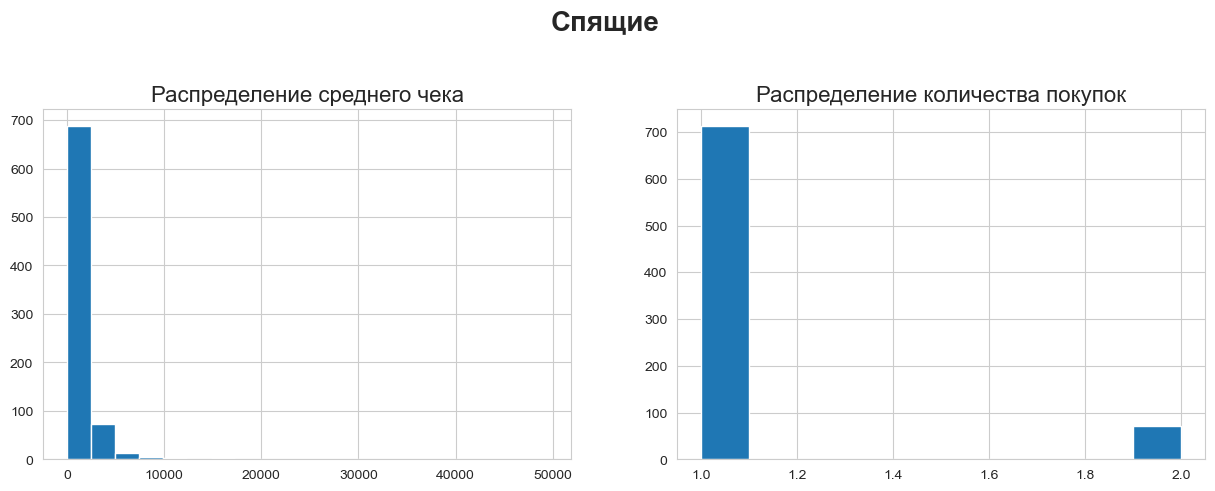

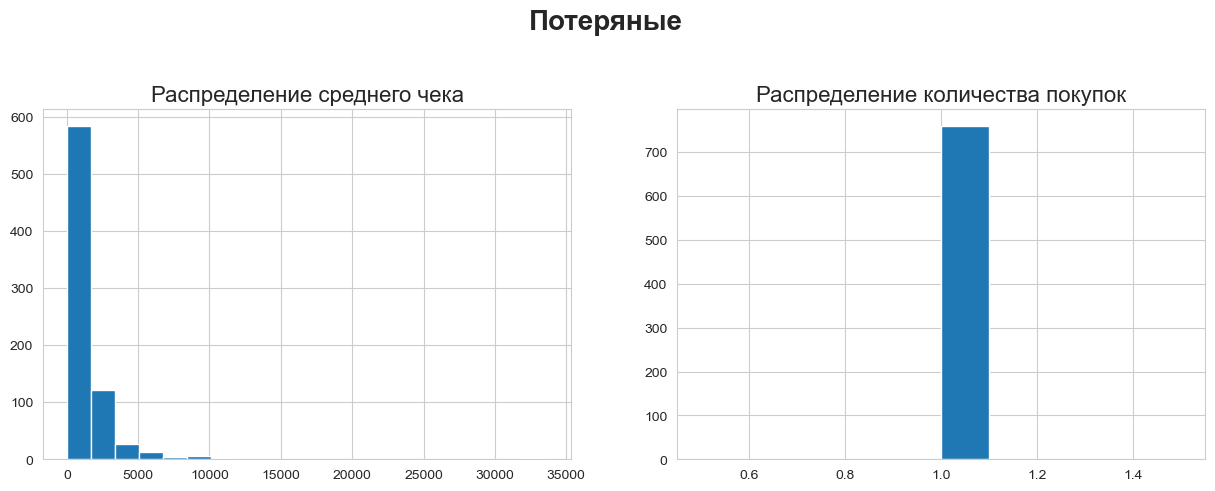

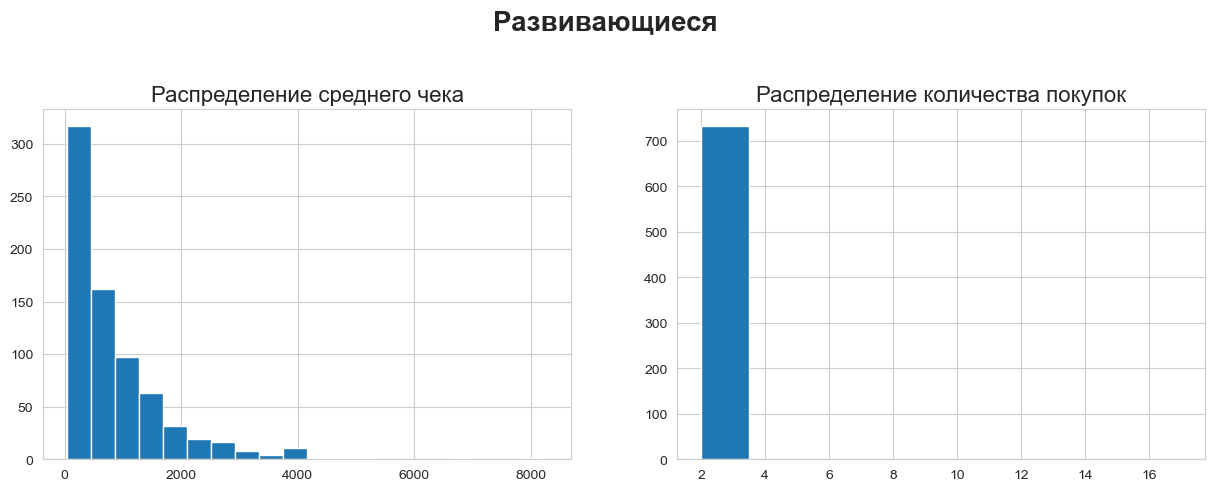

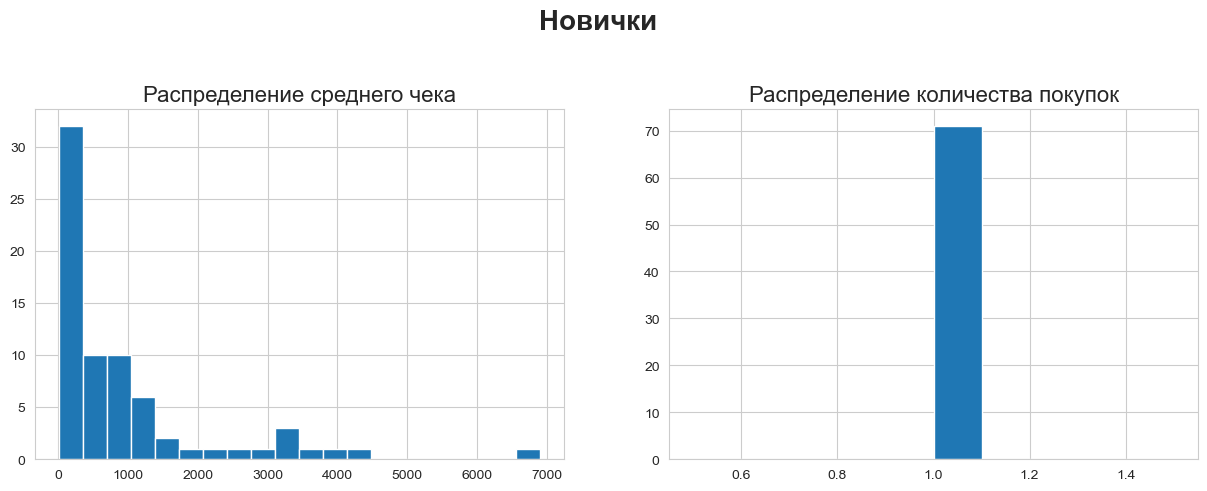

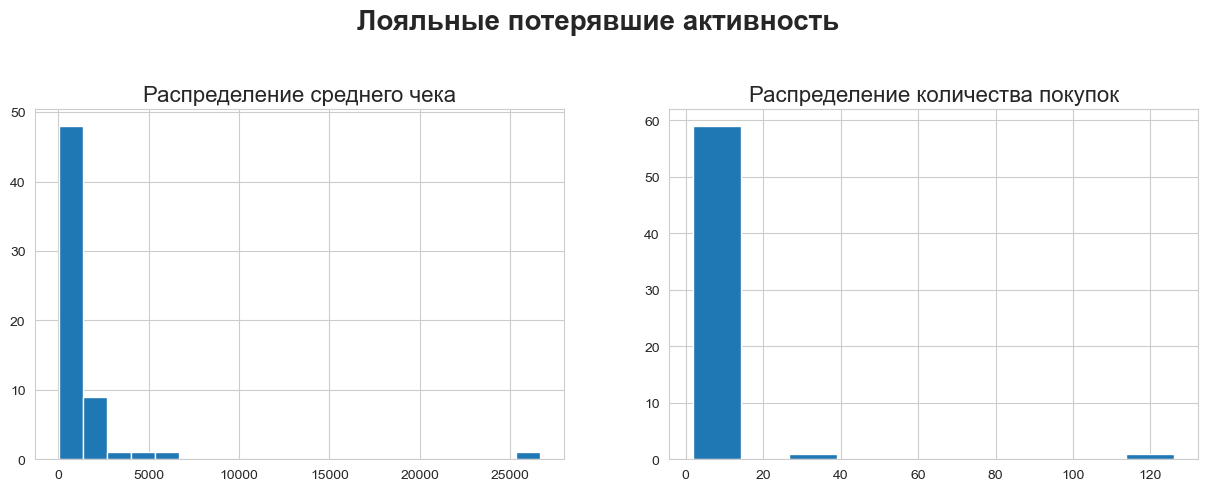

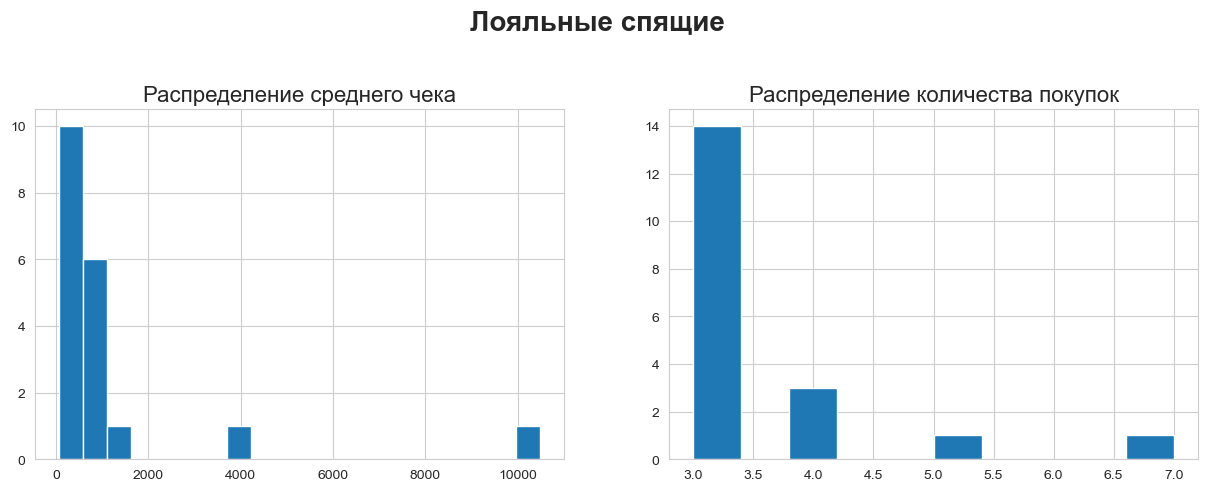

In [1538]:
# строим графики распределения для среднего чека и количества заказов
# задаем функцию для создания графиков
def plot_distr(tab):
    fig = plt.figure(figsize=(15, 10))
    fig.suptitle(f'{tab.name}', fontsize=20, fontweight='bold')
    ax1 = plt.subplot(2, 2, 1)
    tab['avg_bill'].hist(bins=20,ax=ax1)
    plt.title('Распределение среднего чека',size=16)
    ax1 = plt.subplot(2, 2, 2)
    tab['order_id'].hist(ax=ax1)
    plt.title('Распределение количества покупок',size=16)
    plt.show()
    print()
    
#в цикле вызываем функцию для создания графиков, перебирая список кластеров    
for i in clusters_list:
  plot_distr(i)

Оценим разброс данных.

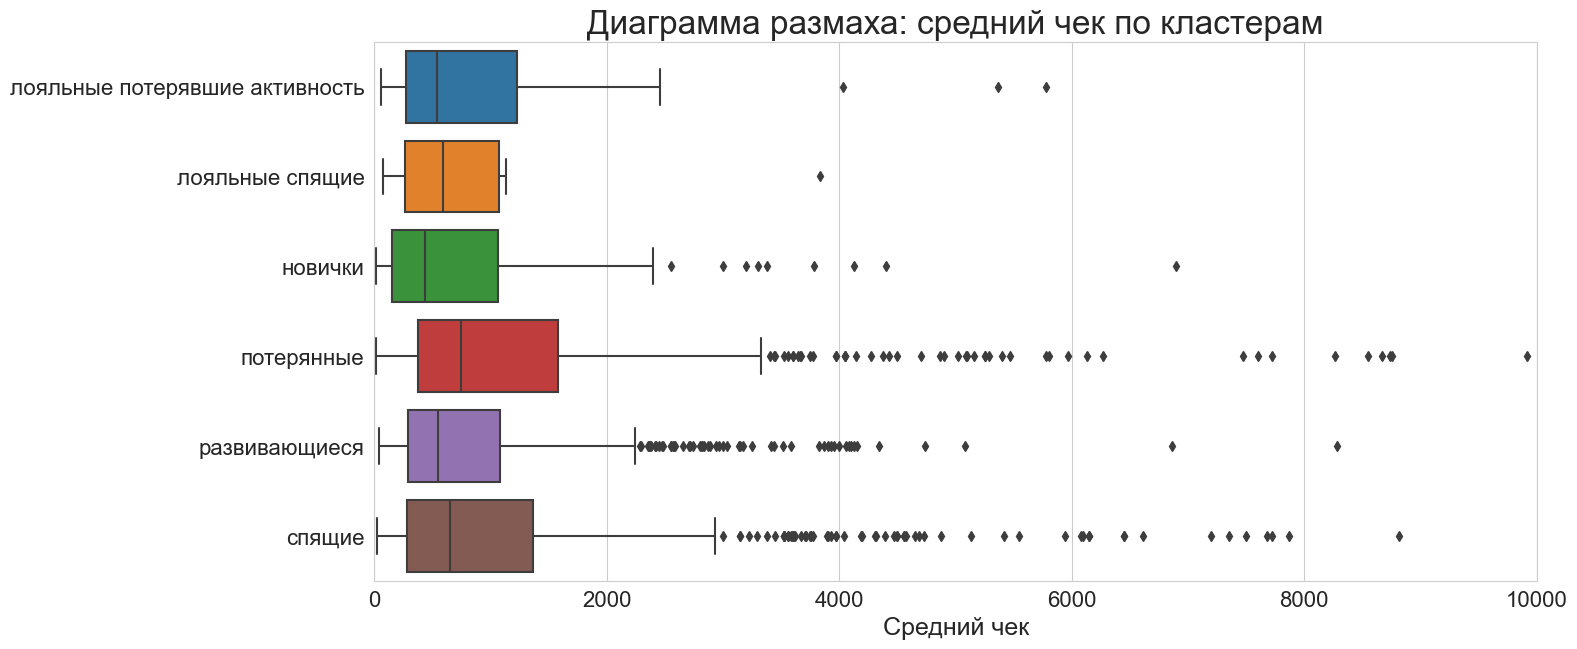

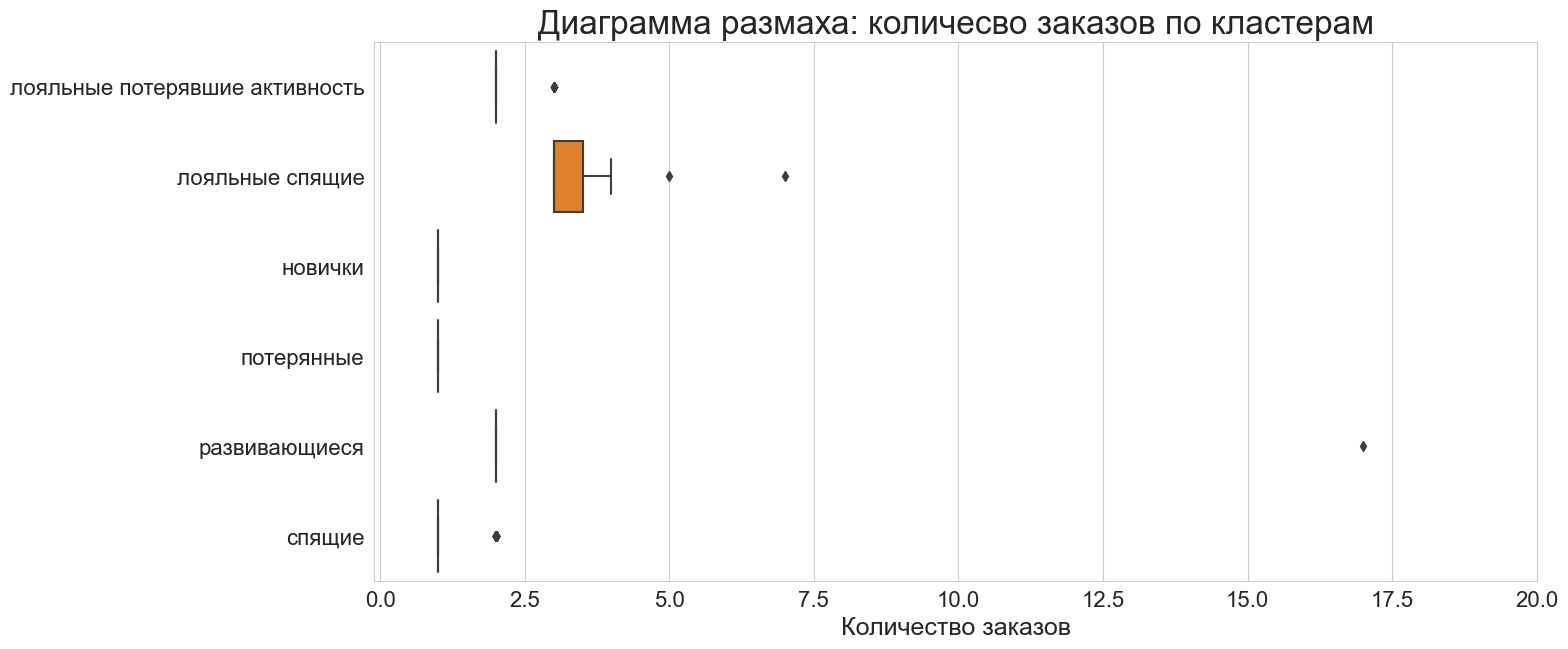

In [1539]:
# Оценим разброс данных 
# посчитаем средний чек для каждого клиента в каждой категории и количество заказов
avg_bill = data.groupby(['cluster','customer_id']).agg({'cost':'sum','order_id':'nunique'}).reset_index()
avg_bill.columns = ['cluster','customer_id','revenue','orders']
avg_bill['avg_bill'] = avg_bill['revenue']/avg_bill['orders']
avg_bill.head()

#построим диаграмы размаха
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.boxplot(data=avg_bill, y='cluster', x='avg_bill')
plt.xlim(-0.1, 10000)

plt.title('Диаграмма размаха: средний чек по кластерам', size=24)
plt.xlabel('Средний чек', size=18)
plt.xticks(size=16)
plt.ylabel('')
plt.yticks(size=16)
plt.show()

plt.figure(figsize=(15, 7))
sns.boxplot(data=avg_bill, y='cluster', x='orders')
plt.xlim(-0.1, 20)

plt.title('Диаграмма размаха: количесво заказов по кластерам', size=24)
plt.xlabel('Количество заказов', size=18)
plt.xticks(size=16)
plt.ylabel('')
plt.yticks(size=16)
plt.show()

Размер выборок разный,  
Распеделения внутри групп по среднему чеку и количеству совершенных заказов не нормальны,  
Показатели по среднему чеку визуально отличаются не значительно, разброс данных для кластеров Потеряные, Лояльные потерявшие активность, Спящие наиболее широкий.
Показатели по среднему количеству заказов для групп Новички, Потерянные и Спящие практически одинаковые.   

Проверим дисперсии

In [1540]:
#функция для расчета дисперсии в среднем чеке
def chek_var_bill(tab):
    print(f'{tab.name}',': {}'.format(np.var(tab['avg_bill'], ddof=1)))
#функция для расчета дисперсии в количестве заказов на покупателя
def chek_var_ord(tab):
    print(f'{tab.name}',': {}'.format(np.var(tab['order_id'], ddof=1)))

#вызываем функции в цикле для каждого из показателей
print('Дисперсии СРЕДНЕГО ЧЕКА по кластерам')
for i in clusters_list:
  chek_var_bill(i)
print()
print('Дисперсии КОЛИЧЕСТВА ЗАКАЗОВ по кластерам')
for i in clusters_list:
  chek_var_ord(i)

Дисперсии СРЕДНЕГО ЧЕКА по кластерам
Спящие : 5406738.922752207
Потеряные : 5962784.837632622
Развивающиеся : 821370.6278003599
Новички : 1652256.9456740438
Лояльные потерявшие активность : 12125978.496885639
Лояльные спящие : 5609389.411193628

Дисперсии КОЛИЧЕСТВА ЗАКАЗОВ по кластерам
Спящие : 0.08246507415226507
Потеряные : 0.0
Развивающиеся : 0.30653950953678005
Новички : 0.0
Лояльные потерявшие активность : 267.25737704918015
Лояльные спящие : 1.0409356725146195


Дисперсии не равны.  

Проверим гиппотезу о нормальности распределения данных

In [1541]:
def distr_check(i, name):
    dt = i
    alpha = 0.05
    results = st.shapiro(dt)
    p_value = results[1]
    print('{}:'.format(name))
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('Распределение не нормально')
    else:
        print('Распределеление нормально')
    print()
        
distr_check(avg_bill['avg_bill'], 'Средний чек')
distr_check(avg_bill['orders'], 'Количество заказов')

Средний чек:
p-значение:  0.0
Распределение не нормально

Количество заказов:
p-значение:  0.0
Распределение не нормально



Итак, дисперсии не равны, распределения не нормальны, размер выборок разный. 

В данном случае будем использовать критерий Манна-Уитни, с поправкой Бонферрони для множественных сравнений.  

Посчитаем критический уровень значимости с поправкой Бонферрони и подготовим функцию для проверки статистических гиппотез

In [1542]:
#введем поправку Бонферони для множественных сравнений
# мы сравниваем между собой 6 групп то есть 15 сравнений
alpha = 0.05
bonferroni_alpha = alpha/15
print('Значение крит. уровня значимости с поправкой Бонфферрони',bonferroni_alpha)

Значение крит. уровня значимости с поправкой Бонфферрони 0.0033333333333333335


In [1543]:
#функция для проверки стат. гиппотез
def stat_test(samp1, samp2):
    result = st.mannwhitneyu(samp1, samp2)
    print(f'{samp1.name} и {samp2.name} клиенты')
    print('p-значение: ', result.pvalue)
    if result.pvalue < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу') 
    print()

<a id='gip_avg_bill'></a>
### Гипотеза 1 (средний чек)

Вспомним первую выдвинутую гипотезу:  

H0: между сегментами нет статистически значимых различий  
H1: между сегментами имеются статистически значимые различия

In [1544]:
# запишем выборки
samp_sleeping = sleeping['avg_bill']
samp_lost = lost['avg_bill']
samp_growing = growing['avg_bill']
samp_new = new['avg_bill']
samp_loyal_lost_activity = loyal_lost_activity['avg_bill']
samp_loyal_sleeping = loyal_sleeping['avg_bill']
#samp_VIP = VIP['avg_bill']

In [1545]:
#зададим имена выборок
samp_sleeping.name = 'Спящие'
samp_lost.name = 'Потеряные'
samp_growing.name = 'Развивающиеся'
samp_new.name = 'Новые'
samp_loyal_lost_activity.name = 'Лояльные потерявшие активность'
samp_loyal_sleeping.name = 'Лояльные спящие'

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Комментарий ревьюера, ревью 2</b> 


У тебя здесь остался сегмент VIP, я закомментировала в коде, иначе падает с ошибкой блокнот.
    
<a class="tocSkip"></a><s>



In [1546]:
#выводим результаты тестирования
stat_test(samp_sleeping,samp_lost)
stat_test(samp_sleeping,samp_growing)
stat_test(samp_sleeping,samp_new)
stat_test(samp_sleeping,samp_loyal_lost_activity)
stat_test(samp_sleeping,samp_loyal_sleeping)

stat_test(samp_lost,samp_growing)
stat_test(samp_lost,samp_new)
stat_test(samp_lost,samp_loyal_lost_activity)
stat_test(samp_lost,samp_loyal_sleeping)

stat_test(samp_growing,samp_new)
stat_test(samp_growing,samp_loyal_lost_activity)
stat_test(samp_growing,samp_loyal_sleeping)

stat_test(samp_new,samp_loyal_lost_activity)
stat_test(samp_new,samp_loyal_sleeping)

stat_test(samp_loyal_lost_activity,samp_loyal_sleeping)

Спящие и Потеряные клиенты
p-значение:  0.005269291980159592
Не получилось отвергнуть нулевую гипотезу

Спящие и Развивающиеся клиенты
p-значение:  0.008897974406686174
Не получилось отвергнуть нулевую гипотезу

Спящие и Новые клиенты
p-значение:  0.014941691808753483
Не получилось отвергнуть нулевую гипотезу

Спящие и Лояльные потерявшие активность клиенты
p-значение:  0.2212448062946365
Не получилось отвергнуть нулевую гипотезу

Спящие и Лояльные спящие клиенты
p-значение:  0.7761876508362312
Не получилось отвергнуть нулевую гипотезу

Потеряные и Развивающиеся клиенты
p-значение:  1.4641976971037327e-08
Отвергаем нулевую гипотезу

Потеряные и Новые клиенты
p-значение:  0.0007894285447704883
Отвергаем нулевую гипотезу

Потеряные и Лояльные потерявшие активность клиенты
p-значение:  0.02060727976638069
Не получилось отвергнуть нулевую гипотезу

Потеряные и Лояльные спящие клиенты
p-значение:  0.37386592609995284
Не получилось отвергнуть нулевую гипотезу

Развивающиеся и Новые клиенты
p

Статистическая значимость различий в среднем чеке,  
при критическом уровне значимости (0.05) с поправкой для 15 сравнений  = 0.00333  
Была достигнута для 2х пар:  

потеряных и развивающихся покупателей  
потеряных и новых покупателей  
Нулевая гипотеза для них была отвергнута.

В остальных случаях нулевую гипотезу отвергнуть не удалось.  

<a id='gip_ord_quantity'></a>
### Гипотеза 2 (количество заказов)  

Проверим значимость различий в количестве покупок  
H0: между сегментами нет статистически значимых различий по количеству покупок  
H1: между сегментами имеются статистически значимые различия по количеству покупок

In [1547]:
#перезапишем выборки
samp_sleeping = sleeping['order_id']
samp_lost = lost['order_id']
samp_growing = growing['order_id']
samp_new = new['order_id']
samp_loyal_lost_activity = loyal_lost_activity['order_id']
samp_loyal_sleeping = loyal_sleeping['order_id']
#samp_VIP = VIP['order_id']

In [1548]:
#задаем имена выборок
samp_sleeping.name = 'Спящие'
samp_lost.name = 'Потеряные'
samp_growing.name = 'Развивающиеся'
samp_new.name = 'Новые'
samp_loyal_lost_activity.name = 'Лояльные потерявшие активность'
samp_loyal_sleeping.name = 'Лояльные спящие'

In [1549]:
#выведем результаты тестирования
stat_test(samp_sleeping,samp_lost)
stat_test(samp_sleeping,samp_growing)
stat_test(samp_sleeping,samp_new)
stat_test(samp_sleeping,samp_loyal_lost_activity)
stat_test(samp_sleeping,samp_loyal_sleeping)

stat_test(samp_lost,samp_growing)
stat_test(samp_lost,samp_new)
stat_test(samp_lost,samp_loyal_lost_activity)
stat_test(samp_lost,samp_loyal_sleeping)

stat_test(samp_growing,samp_new)
stat_test(samp_growing,samp_loyal_lost_activity)
stat_test(samp_growing,samp_loyal_sleeping)

stat_test(samp_new,samp_loyal_lost_activity)
stat_test(samp_new,samp_loyal_sleeping)

stat_test(samp_loyal_lost_activity,samp_loyal_sleeping)

Спящие и Потеряные клиенты
p-значение:  2.051204403956746e-17
Отвергаем нулевую гипотезу

Спящие и Развивающиеся клиенты
p-значение:  2.107884223942384e-275
Отвергаем нулевую гипотезу

Спящие и Новые клиенты
p-значение:  0.008145682815791155
Не получилось отвергнуть нулевую гипотезу

Спящие и Лояльные потерявшие активность клиенты
p-значение:  5.072484288661016e-81
Отвергаем нулевую гипотезу

Спящие и Лояльные спящие клиенты
p-значение:  2.7555785498002662e-42
Отвергаем нулевую гипотезу

Потеряные и Развивающиеся клиенты
p-значение:  0.0
Отвергаем нулевую гипотезу

Потеряные и Новые клиенты
p-значение:  1.0
Не получилось отвергнуть нулевую гипотезу

Потеряные и Лояльные потерявшие активность клиенты
p-значение:  3.258174514671815e-180
Отвергаем нулевую гипотезу

Потеряные и Лояльные спящие клиенты
p-значение:  3.6244721163287245e-171
Отвергаем нулевую гипотезу

Развивающиеся и Новые клиенты
p-значение:  1.2090805057909388e-174
Отвергаем нулевую гипотезу

Развивающиеся и Лояльные потеря

В случае с количеством заказов на пользователя  
В большинстве случаев гипотеза была отвергнута.

Не получилось отвергнуть нулевую гипотезу в случаях с:

спящими и новыми покупателями, а так же в паре  
потеряных и новых покупателей.

## Исследование товарных предпочтений кластеров
Посмотрим товарные предпочтения кластеров

#### Количество покупателей на категорию по кластерам

In [1550]:
#создаем сводную таблицу с подсчетом количества заказчиков на категорию по кластерам
cluster_customers_pivot = data.pivot_table(
    index=['month','cluster'], values=['customer_id'], aggfunc=['nunique']).reset_index()
cluster_customers_pivot.columns = ['month','cluster','customers']
cluster_customers_pivot

month                         cluster  customers
0   2018-10  лояльные потерявшие активность          8
1   2018-10                      потерянные        123
2   2018-10                   развивающиеся         47
3   2018-11  лояльные потерявшие активность          7
4   2018-11                      потерянные        125
5   2018-11                   развивающиеся         46
6   2018-12  лояльные потерявшие активность         10
7   2018-12                      потерянные        138
8   2018-12                   развивающиеся         81
9   2019-01  лояльные потерявшие активность         14
10  2019-01                 лояльные спящие          1
11  2019-01                      потерянные         87
12  2019-01                   развивающиеся         48
13  2019-02  лояльные потерявшие активность         17
14  2019-02                 лояльные спящие          2
15  2019-02                      потерянные        128
16  2019-02                   развивающиеся         98
17  2019-02                          спящие          1
18  2019-03  лояльные потерявшие активность         14
19  2019-03                 лояльные спящие          4
20  2019-03                      потерянные        130
21  2019-03                   развивающиеся         85
22  2019-04  лояльные потерявшие активность          6
23  2019-04                 лояльные спящие          9
24  2019-04                      потерянные         29
25  2019-04                   развивающиеся         65
26  2019-04                          спящие        127
27  2019-05                 лояльные спящие          7
28  2019-05                   развивающиеся         36
29  2019-05                          спящие        123
30  2019-06                 лояльные спящие          3
31  2019-06                   развивающиеся         41
32  2019-06                          спящие        109
33  2019-07                 лояльные спящие          2
34  2019-07                   развивающиеся         62
35  2019-07                          спящие        121
36  2019-08                 лояльные спящие          3
37  2019-08                   развивающиеся         52
38  2019-08                          спящие        111
39  2019-09                 лояльные спящие          1
40  2019-09                   развивающиеся         65
41  2019-09                          спящие        107
42  2019-10                 лояльные спящие          2
43  2019-10                         новички         62
44  2019-10                   развивающиеся         13
45  2019-10                          спящие        100
46  2019-11                         новички          3
47  2019-11                   развивающиеся        214
48  2019-12                         новички          2
49  2019-12                   развивающиеся        244
50  2020-01                         новички          4
51  2020-01                   развивающиеся        265

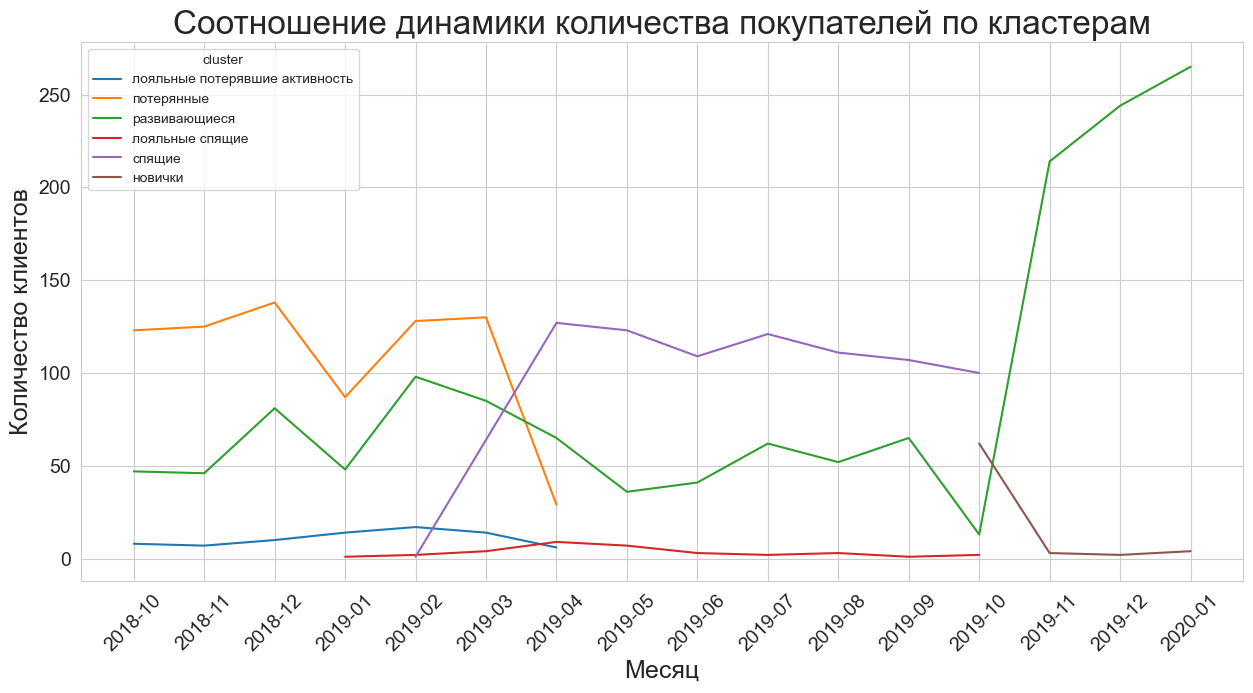

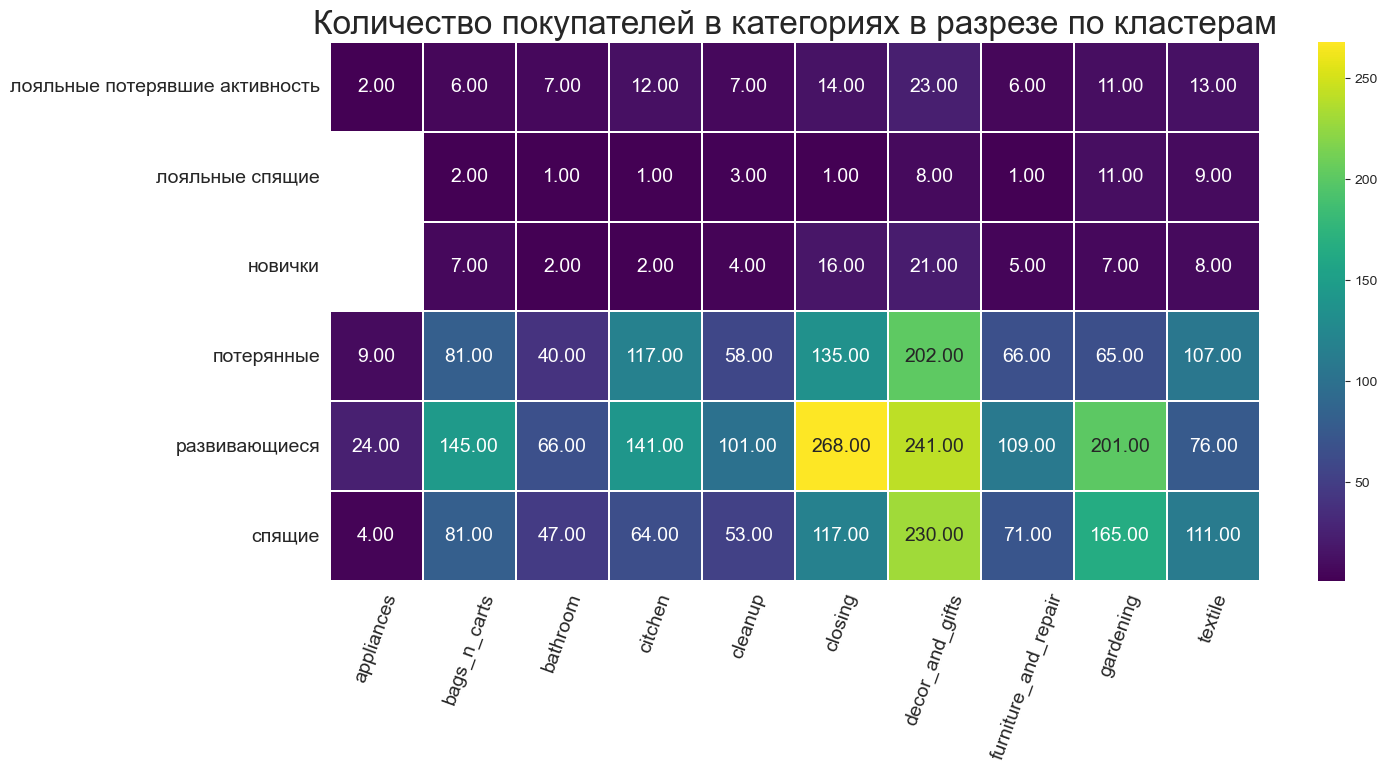

In [1551]:
#смотрим динамику количества клиентов в каждой группе
plt.subplots(figsize=(15, 7))
sns.set_style("whitegrid")
sns.lineplot(data=cluster_customers_pivot,
             x='month', y='customers', hue='cluster')
plt.title('Соотношение динамики количества покупателей по кластерам', size=24)
plt.xlabel('Месяц', size=18)
plt.ylabel('Количество клиентов',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
#смотрим количество пользователей купивших разные товарные типы по кластерам
customers_by_cluster_type = data.pivot_table(
    index='cluster', columns=['type'], values='customer_id', aggfunc='nunique')
plt.figure(figsize=(15, 7))
sns.heatmap(customers_by_cluster_type, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis', annot_kws = {'fontsize':'14'})
plt.title('Количество покупателей в категориях в разрезе по кластерам', size=24)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=70, size=14)
plt.yticks(size=14)
plt.show()

Оценим долю от всех покупателей кластера, приходящихся на каждую категорию.

In [1552]:
#пересоберем таблицу добавим в нее общее количество покупателей на кластер
customers_by_cluster_type_proportion = data.pivot_table(
    index='cluster', columns=['type'], values='customer_id', aggfunc='nunique').fillna(0)

cluster_sizes = (
    data.groupby('cluster')
    .agg({'customer_id': 'nunique'})
    .rename(columns={'customer_id': 'total'})
)

In [1553]:
#объединяем таблицы 
customers_by_cluster_type_proportion = cluster_sizes.merge(
    customers_by_cluster_type_proportion, on='cluster', how='left'
).fillna(0)
customers_by_cluster_type_proportion

total  appliances  bags_n_carts  bathroom  \
cluster                                                                     
лояльные потерявшие активность     61         2.0           6.0       7.0   
лояльные спящие                    19         0.0           2.0       1.0   
новички                            71         0.0           7.0       2.0   
потерянные                        760         9.0          81.0      40.0   
развивающиеся                     734        24.0         145.0      66.0   
спящие                            784         4.0          81.0      47.0   

                                citchen  cleanup  closing  decor_and_gifts  \
cluster                                                                      
лояльные потерявшие активность     12.0      7.0     14.0             23.0   
лояльные спящие                     1.0      3.0      1.0              8.0   
новички                             2.0      4.0     16.0             21.0   
потерянные                        117.0     58.0    135.0            202.0   
развивающиеся                     141.0    101.0    268.0            241.0   
спящие                             64.0     53.0    117.0            230.0   

                                furniture_and_repair  gardening  textile  
cluster                                                                   
лояльные потерявшие активность                   6.0       11.0     13.0  
лояльные спящие                                  1.0       11.0      9.0  
новички                                          5.0        7.0      8.0  
потерянные                                      66.0       65.0    107.0  
развивающиеся                                  109.0      201.0     76.0  
спящие                                          71.0      165.0    111.0

In [1554]:
#рассчитываем доли пользователей совершивших покупки каждой категории внутри кластера
customers_by_cluster_type_proportion = (
    customers_by_cluster_type_proportion
    .div(customers_by_cluster_type_proportion['total'], axis=0)
    .drop(columns=['total'])
)
customers_by_cluster_type_proportion

appliances  bags_n_carts  bathroom   citchen  \
cluster                                                                        
лояльные потерявшие активность    0.032787      0.098361  0.114754  0.196721   
лояльные спящие                   0.000000      0.105263  0.052632  0.052632   
новички                           0.000000      0.098592  0.028169  0.028169   
потерянные                        0.011842      0.106579  0.052632  0.153947   
развивающиеся                     0.032698      0.197548  0.089918  0.192098   
спящие                            0.005102      0.103316  0.059949  0.081633   

                                 cleanup   closing  decor_and_gifts  \
cluster                                                               
лояльные потерявшие активность  0.114754  0.229508         0.377049   
лояльные спящие                 0.157895  0.052632         0.421053   
новички                         0.056338  0.225352         0.295775   
потерянные                      0.076316  0.177632         0.265789   
развивающиеся                   0.137602  0.365123         0.328338   
спящие                          0.067602  0.149235         0.293367   

                                furniture_and_repair  gardening   textile  
cluster                                                                    
лояльные потерявшие активность              0.098361   0.180328  0.213115  
лояльные спящие                             0.052632   0.578947  0.473684  
новички                                     0.070423   0.098592  0.112676  
потерянные                                  0.086842   0.085526  0.140789  
развивающиеся                               0.148501   0.273842  0.103542  
спящие                                      0.090561   0.210459  0.141582

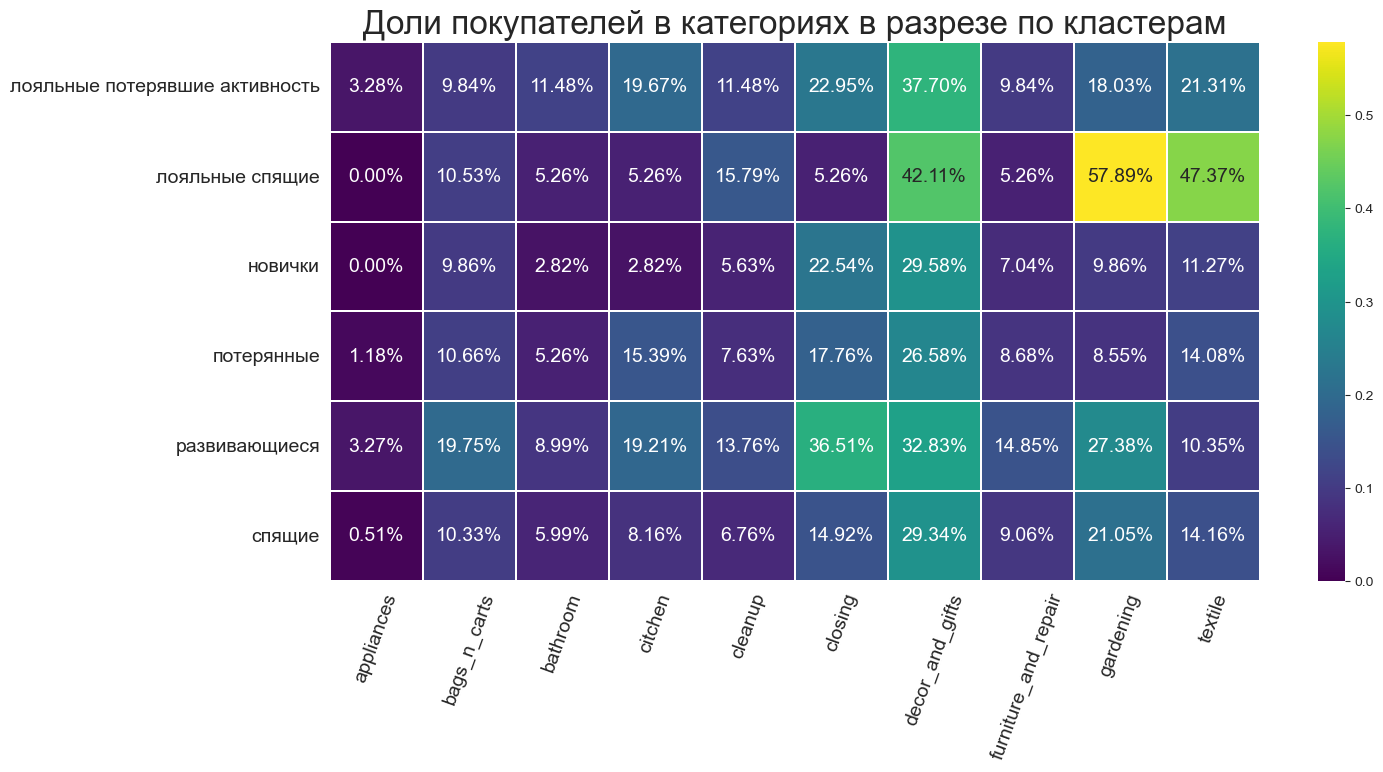

In [1555]:
plt.figure(figsize=(15, 7))
sns.heatmap(customers_by_cluster_type_proportion, annot=True, fmt='.2%', linewidth=0.1, cmap='viridis', annot_kws = {'fontsize':'14'})
plt.title('Доли покупателей в категориях в разрезе по кластерам', size=24)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=70, size=14)
plt.yticks(size=14)
plt.show()

Наибольшее количество покупателей среди развивающихся (пик декабрь 2018, февраль 2019 и с ноября 2019 резкий скачек):  
Категории: 
Товары для одежды (36.51%), Декор и подарки(32.83%), Сад и огород(27.38%), Сумки и тележки(19.75%), Товары для кухни(19.21%).  

Потеряные (пики: декабрь, февраль, март):  
Категории:  
Декор и подарки (26.58%), Товары для одежды(17.76%), Товары для Кухни(15.38%), Текстиль(14.08%), Сумки и тележки(10.66%).  

Спящие (резкий подъем с апреля):  
Декор и подарки(29.34%), Сад и огород(21.05%), Товары для одежды(14.92%), Текстиль(14.16%) Сумки и тележки(10.33%).  

Новички (активность с октября):  
Декор и подарки(29.58%), Товары для одежды(22.54%), Текстиль(11.27%), Сумки и Тележки(9.86%), Сад и огород(9.86%). (остуствуют в кат. Техника)  

Лояльные потерявшие активность (активность октябрь-апрель, больше февраль):  
Декор и подарки(37.70%), Товары для одежды(22.95%), Текстиль(21.31%), Товары для кухни(19.67%), Сад и огород(18.03%).  
Лояльные спящие (январь-октябрь, больше апрель):  
Сад и огород(57.89%), Текстиль(47.37%), Декор и подарки(42.11%), Товары для уборки(15.79%), Сумки и Тележки(10.53%). (остуствуют в кат. Техника)

#### Количество уникальных заказов в категориях в разрезе по кластерам  


##### Соотношение количества заказов по кластерам в месяц

In [1556]:
#создаем сводную таблицу с разбивкой по месяцам, типам товаров и кластерам пользователей
type_pivot_by_cluster = data.pivot_table(index=['month','type','cluster'], values=['order_id'], aggfunc=['nunique']).reset_index()
type_pivot_by_cluster.columns = ['month','type','cluster','order_amount']
type_pivot_by_cluster = type_pivot_by_cluster.sort_values(by=['month','order_amount'])
type_pivot_by_cluster.head()

month             type                         cluster  order_amount
0   2018-10       appliances                      потерянные             1
1   2018-10       appliances                   развивающиеся             1
27  2018-10          textile                   развивающиеся             1
19  2018-10  decor_and_gifts                   развивающиеся             2
23  2018-10        gardening  лояльные потерявшие активность             2

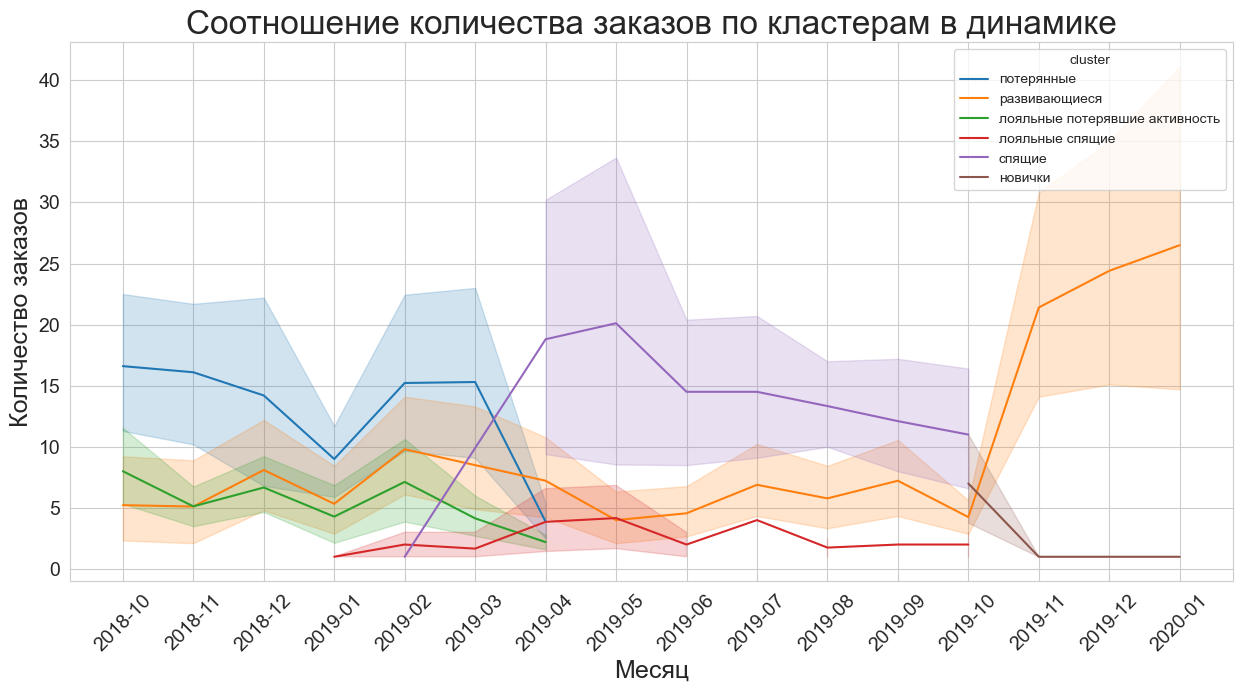

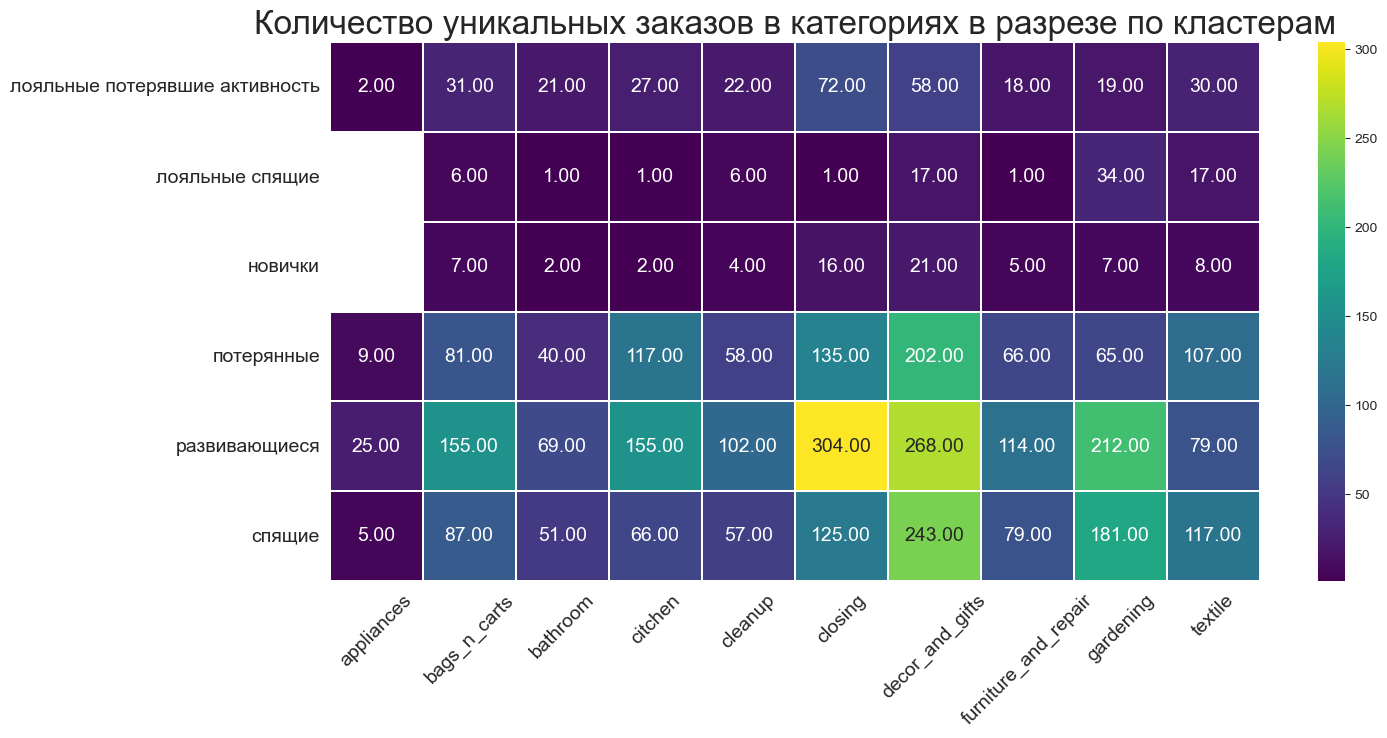

In [1557]:
#визуализируем количество заказов в динамике по кластера
plt.subplots(figsize=(15, 7))
sns.lineplot(data=type_pivot_by_cluster,
             x="month", y="order_amount", hue="cluster")
plt.title('Соотношение количества заказов по кластерам в динамике', size=24)
plt.xlabel('Месяц', size=18)
plt.ylabel('Количество заказов',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
# количество закзазов абсолютные значения тепловая карта
unique_orders = data.pivot_table(
    index='cluster', columns=['type'], values='order_id', aggfunc='nunique')
plt.figure(figsize=(15, 7))
sns.heatmap(unique_orders, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis', annot_kws = {'fontsize':'14'})
plt.title('Количество уникальных заказов в категориях в разрезе по кластерам', size=24)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.show()

На общем фоне среди  
Развивающихся покупателей значительно выделяется количество заказов на   
Товары для одежды, так же  
Декор и подарки и,  
для спящих пользователей, так же декор и подарки.  
Высокий интерес к категории  
Декор и подарки так же проявлял кластер потерянных клиентов.    
Так же высокое количество заказов у категории    
Сад и огород среди развивающихся и спящих клиентов  

Развивающиеся клиенты в порядке убывания интересовались:  
Для одежды  
Декор и подарки    
Сад и огород    
Сумки и тележки  
Товары для кухни 
Предложить сопутствующие товары, подарок за сделанную покупку, программы лояльности, бонусы, чтобы стимулировать показатель "М" (Вложения).
Совершали покупки часто, но достаточно давно, однако на большие суммы. Т.к. в текущем моменте, это одни из лучших клиентов они должны войти в 20% по правилу Парето. Для них будут так же актуальны рекомендации для лучших клиентов.	
Предложить самое ценное, например, золотую карту, или пригласить на отдельное мероприятие, выразить особую благодарность. Скидки предлагать не стоит.

Новички:  
Декор и подарки,  
Для одежды,  
Текстиль,  
Сумки и тележки,
Сад и огород.
На этот сегмент стоит обратить особое внимание.	Помочь в выборе товара, дать полезный контент. Как вариант - поздравить с покупкой, пригласить в соцсети, предложить выгодные акции.


Лояльные потерявшие активност:  
 Для одежды,  
 Декор и подарки,  
 Сумки и тележки,
 Текстиль,  
 Кухня.  
Лояльные спящие:  
 Сад и огород, 
 Декор и подарки,   
 Текстиль,  
 Сумки,  
 Уборка.  
Предложить сопутствующие товары, подарок за сделанную покупку, программы лояльности, бонусы, чтобы стимулировать показатель "М" (Вложения). 

Спящие:  
Декор, Сад, Одежда, Текстиль, Сумки.

Потеряные:  
Декор, Одежда, Кухня, Текстиль, Сумки.

##### Соотношение количества заказов по дням недели и времени суток по кластерам  

**Дни недели**

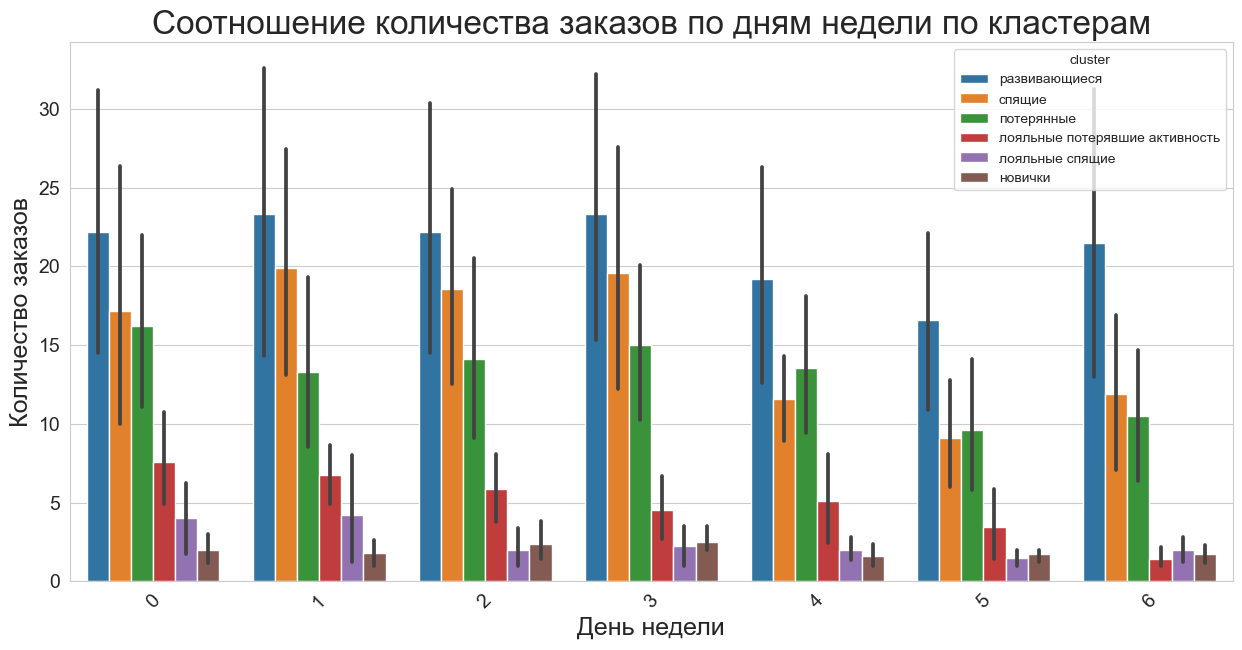

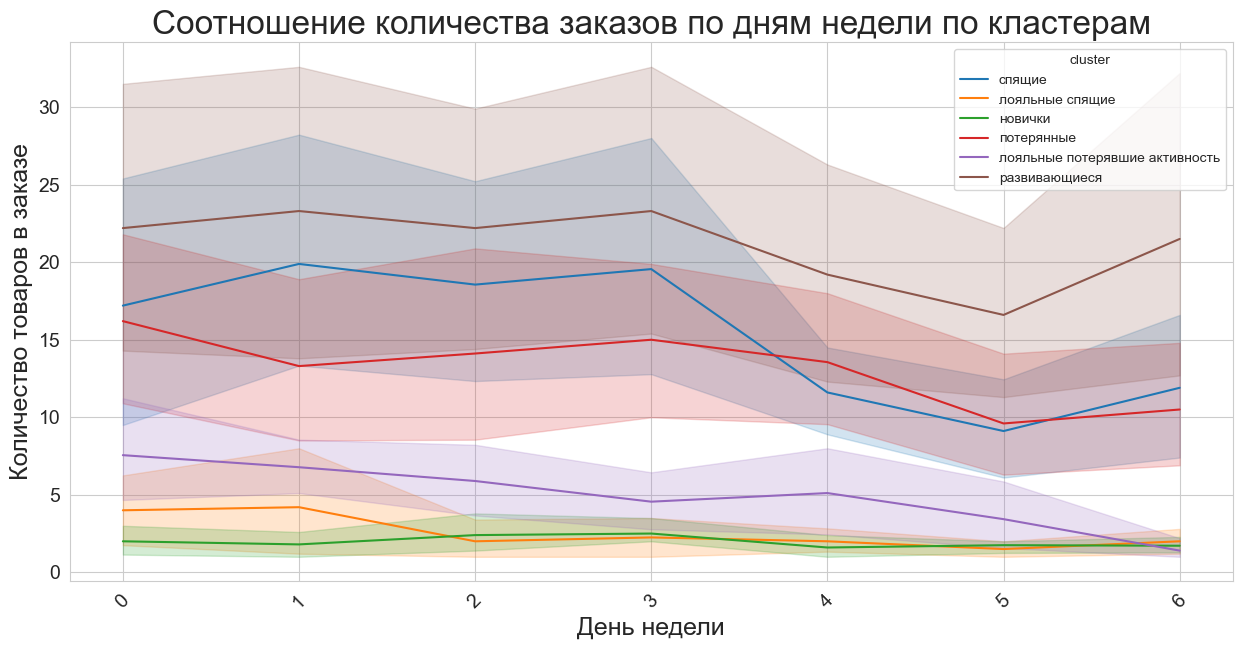

In [1558]:
#Проверим разницу в количестве товаров по дням недели
#перезапишем сводную таблицу по количесву заказов
type_pivot_by_cluster = data.pivot_table(index=['day','type','cluster'], values=['order_id'], aggfunc=['nunique']).reset_index()
type_pivot_by_cluster.columns = ['day','type','cluster','order_amount']
type_pivot_by_cluster = type_pivot_by_cluster.sort_values(by=['day','order_amount'])
type_pivot_by_cluster
#строим график по количеству заказов в течение недели, где 0-Понедельник , 6 - Воскресенье
plt.subplots(figsize=(15, 7))
sns.barplot(data=type_pivot_by_cluster.sort_values(by=['order_amount'], ascending=False), 
            x='day', y='order_amount', hue='cluster')
plt.title('Соотношение количества заказов по дням недели по кластерам',size=24)
plt.xlabel('День недели',size=18)
plt.ylabel('Количество заказов',size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.show()
print()
#линейная диаграма
plt.subplots(figsize=(15, 7))
sns.lineplot(data=type_pivot_by_cluster,
             x="day", y="order_amount", hue="cluster")
plt.title('Соотношение количества заказов по дням недели по кластерам', size=24)
plt.xlabel('День недели', size=18)
plt.ylabel('Количество товаров в заказе',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()

Практически все кластеры совершают больше заказов в будни,  
по выходным в воскресенье так же активны развивающиеся клиенты, они меньше покупают по пятницам и субботам

**Количество заказов по времени суток**

hour          type          cluster  order_amount
0     0    appliances       потерянные             1
2     0  bags_n_carts           спящие             1
3     0      bathroom    развивающиеся             1
4     0      bathroom           спящие             1
5     0       citchen  лояльные спящие             1

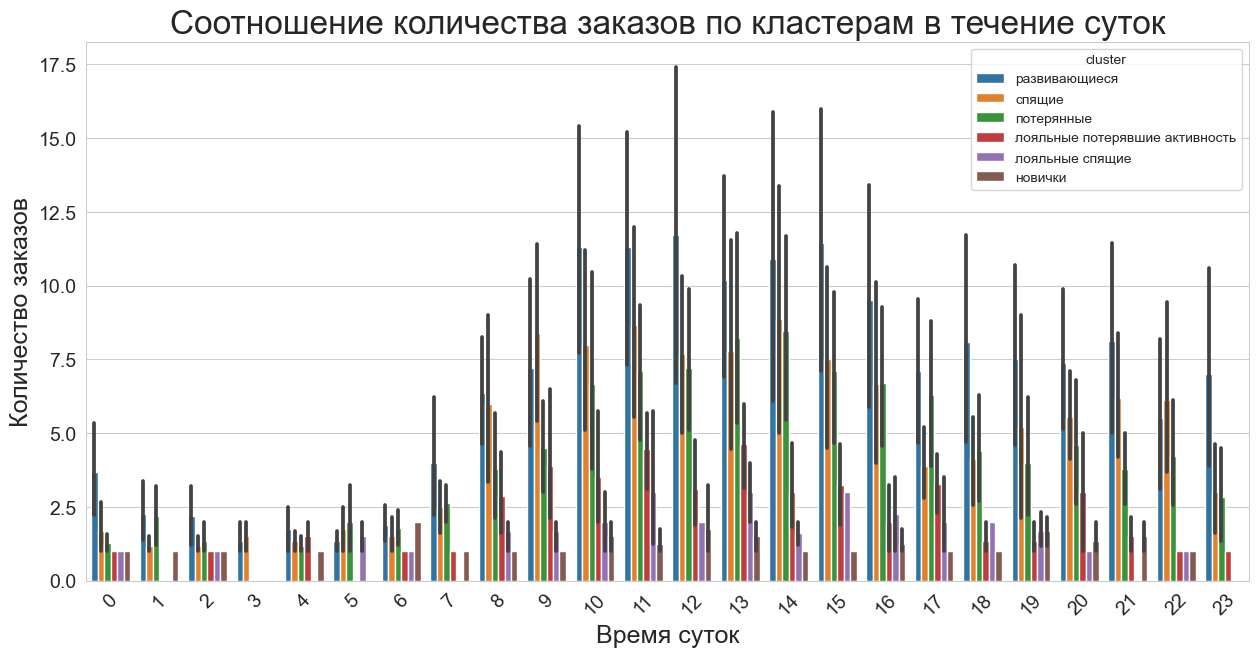

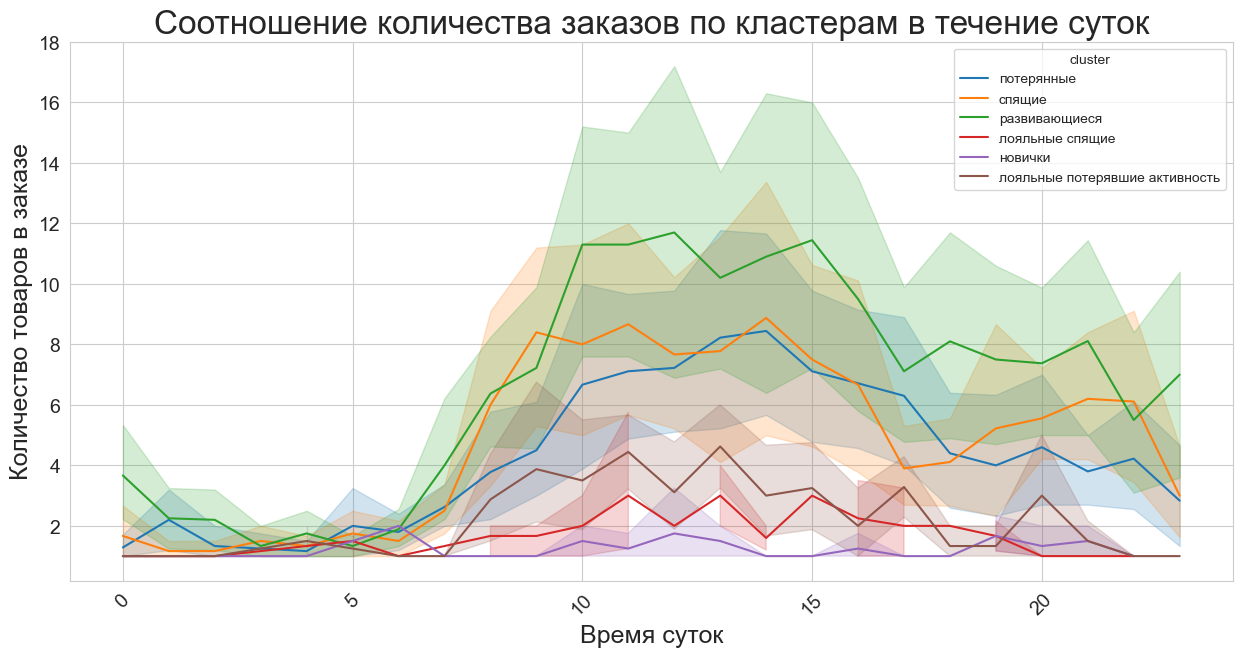

In [1559]:
#Проверим разницу в количестве товаров по дням недели
#перезапишем сводную таблицу по количесву заказов (преддварительно добавив столбец с часом в таблицу дата)
type_pivot_by_cluster = data.pivot_table(index=['hour','type','cluster'], values=['order_id'], aggfunc=['nunique']).reset_index()
type_pivot_by_cluster.columns = ['hour','type','cluster','order_amount']
type_pivot_by_cluster = type_pivot_by_cluster.sort_values(by=['hour','order_amount'])
display(type_pivot_by_cluster.head())
#строим график по количеству заказов в течение суток с отображением по часам
plt.subplots(figsize=(15, 7))
sns.barplot(data=type_pivot_by_cluster.sort_values(by=['order_amount'], ascending=False), x='hour', y='order_amount', hue='cluster')
plt.title('Соотношение количества заказов по кластерам в течение суток',size=24)
plt.xlabel('Время суток',size=18)
plt.ylabel('Количество заказов',size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.show()
#динамика количества заказов в течение суток
plt.subplots(figsize=(15, 7))
sns.lineplot(data=type_pivot_by_cluster, x="hour", y="order_amount", hue="cluster")
plt.title('Соотношение количества заказов по кластерам в течение суток', size=24)
plt.xlabel('Время суток', size=18)
plt.ylabel('Количество товаров в заказе',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()

Основная активность приходится на полдень и 2 часа дня по всем кластерам.  
У лояльных потерявших активность наблюдается всплеск в районе 8 часов,    
Развивающиеся клиенты активны на протяжении практически всех суток, кроме ночного промежутка между полуночью/2 часами и утра около 6-7 утра.  

#### Количество товаров в категориях в разрезе по кластерам

month          type                         cluster  quantity_amount
0  2018-10    appliances                      потерянные                1
1  2018-10    appliances                   развивающиеся                1
2  2018-10  bags_n_carts  лояльные потерявшие активность                8
3  2018-10  bags_n_carts                      потерянные               13
4  2018-10  bags_n_carts                   развивающиеся                6

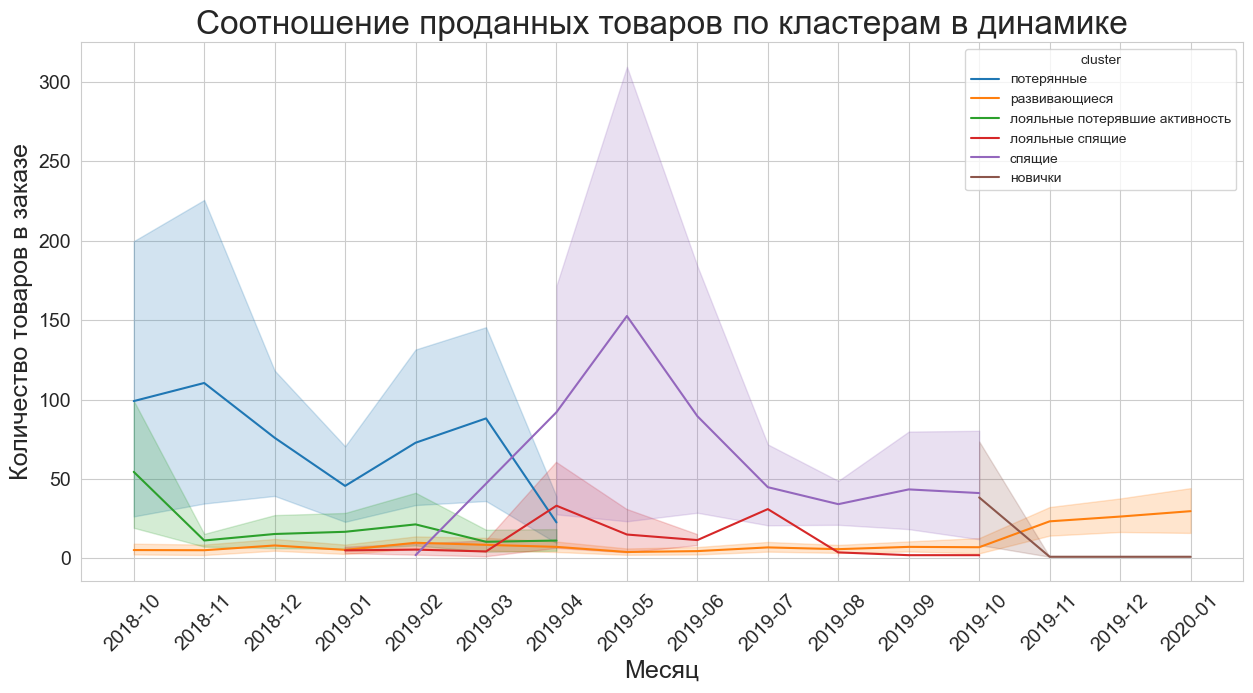

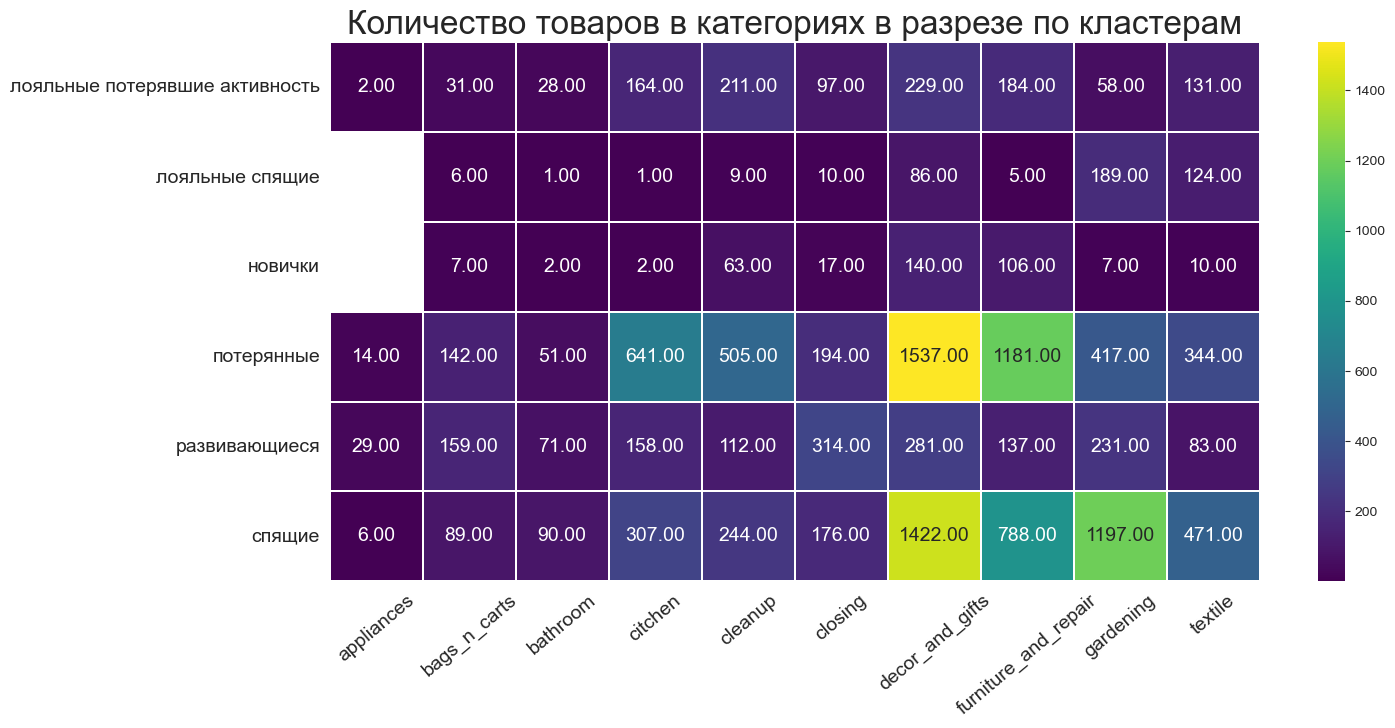

In [1560]:
#создадим сводную таблицу по количеству товаров каждой категории по кластерам
type_pivot_by_cluster_quantity = data.pivot_table(
    index=['month','type','cluster'], values=['quantity'], aggfunc=['sum']).reset_index()
type_pivot_by_cluster_quantity.columns = ['month','type','cluster','quantity_amount']
display(type_pivot_by_cluster_quantity.head())
#смотрим динамику
plt.subplots(figsize=(15, 7))
sns.lineplot(data=type_pivot_by_cluster_quantity, x="month", y="quantity_amount", hue="cluster")
plt.title('Соотношение проданных товаров по кластерам в динамике', size=24)
plt.xlabel('Месяц', size=18)
plt.ylabel('Количество товаров в заказе',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
# смотрим значения количества проданных товаров
unique_orders = data.pivot_table(
    index='cluster', columns=['type'], values='quantity', aggfunc='sum')
plt.figure(figsize=(15, 7))
sns.heatmap(unique_orders, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis', annot_kws = {'fontsize':'14'})
plt.title('Количество товаров в категориях в разрезе по кластерам', size=24)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=40, size=14)
plt.yticks(size=14)
plt.show()

Новички были активны с октября по январь.  
Наибольшее количество товаров было продано в категориях:  
Декор и подарки,  
Мебель и ремонт,  
Товары для уборки,
Текстиль,  
Сад и огород.  

Наилучшие продажи были у кластера  
Потерянные:  
Декор и подарки, Мебель и ремонт, Товары для кухни, Товары для уборки, Сад и огород  
В ноябре и марте наблюдались всплески.

И спящие (пик май, небольшой всплеск в сентябре):  
Декор и подарки, Сад и огород, Мебель и ремонт, Текстиль, Товары для кухни.  

Наибольший интерес к категории Техника и комплектующие проявил кластер развивающихся клиентов и потеряных,  
Среди новичков и спящих лояльных нет этой категории вообще.  

Развивающиеся как и по количеству заказов, так и по количеству товаров в заказах демонстрируют рост с октября по конец исследуемого периода.  
Наибольшее количество проданных товаров для кластера развивающиеся:  
Товары для одежды,  
Декор и подарки,  
Сад и огород,  
Сумки и тележки,  
Товары для кухни  

Лояльные потерявшие активность(активность октябрь, февраль):  
Декор и подарки, Товары для уборки, Мебель и ремонт, Товары для кухни, Текстиль.  
Лояльные спящие (активность апрель, июль):  
Сад и огород, Текстиль, Декор и подарки, Товары для Одежды и Мебель и ремонт в 5ке с сильным отставанием.  

#### Выручка в категориях в разрезе по кластерам

month          type                         cluster  cost_amount
0  2018-10    appliances                      потерянные       1199.0
1  2018-10    appliances                   развивающиеся       1049.0
2  2018-10  bags_n_carts  лояльные потерявшие активность      12691.0
3  2018-10  bags_n_carts                      потерянные      24881.0
4  2018-10  bags_n_carts                   развивающиеся       9085.0

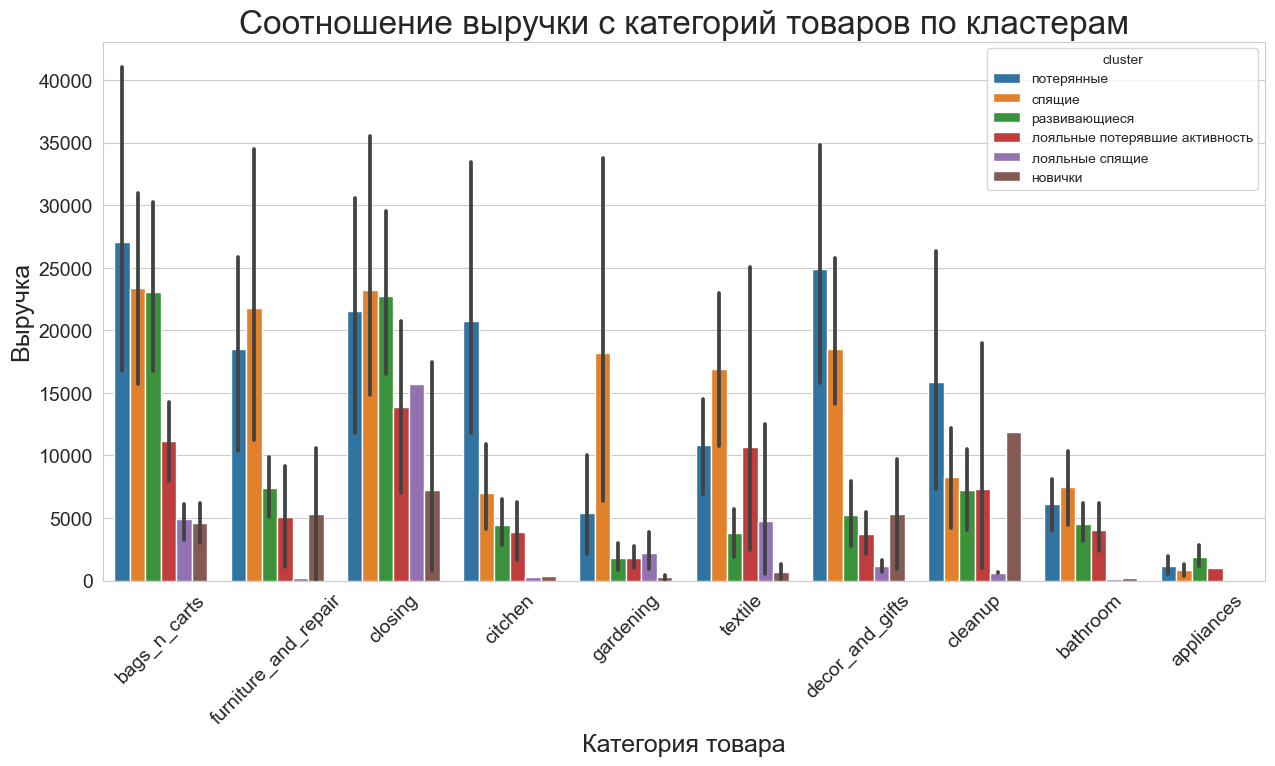

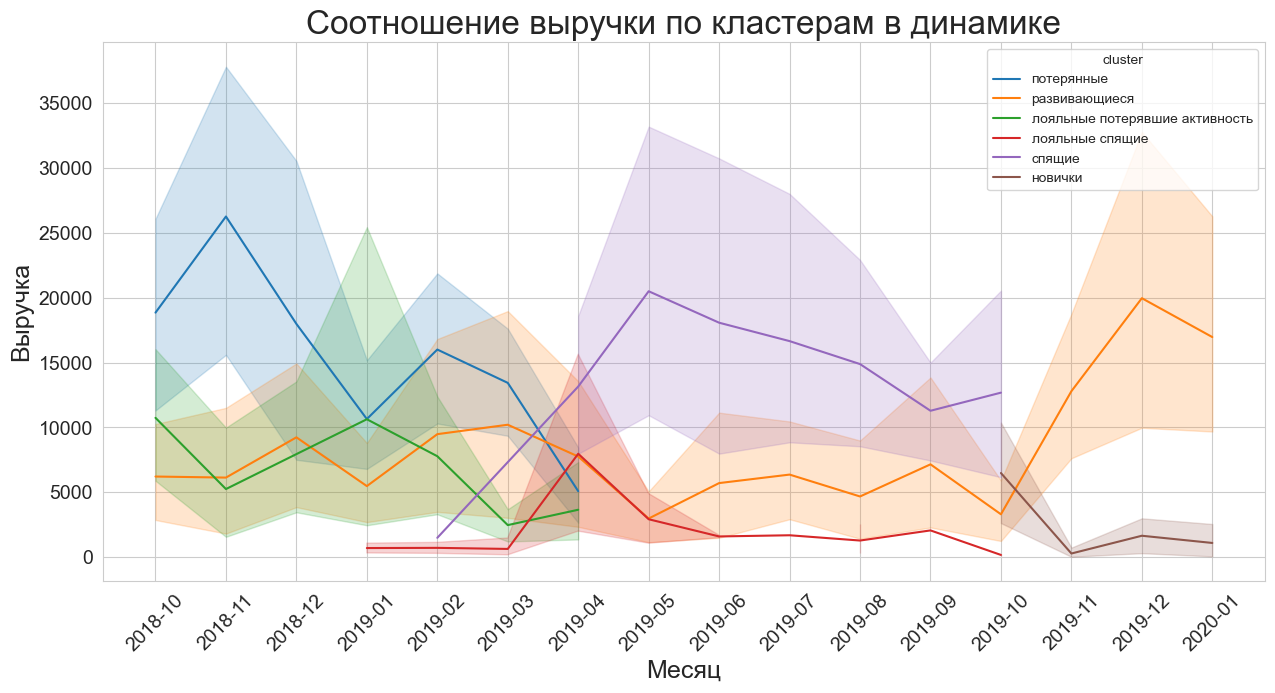

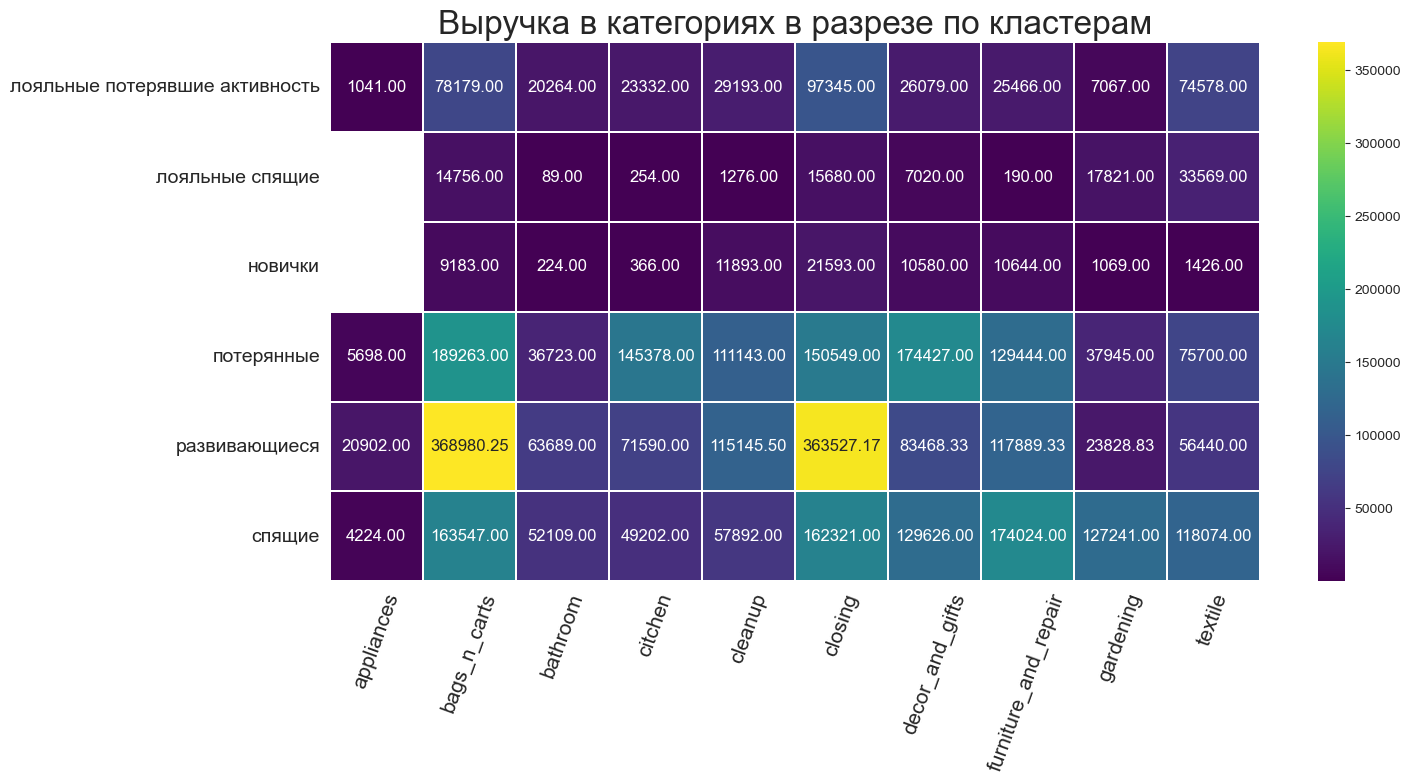

In [1561]:
#считаем выручку с разбивкой по типам товаров по кластерам
type_pivot_by_cluster_cost = data.pivot_table(index=['month','type','cluster'], values=['cost'], aggfunc=['sum']).reset_index()
type_pivot_by_cluster_cost.columns = ['month','type','cluster','cost_amount']
type_pivot_by_cluster_cost = type_pivot_by_cluster_cost#.sort_values(by=['month','cost_amount'])
display(type_pivot_by_cluster_cost.head())
print()
# соотношение
plt.subplots(figsize=(15, 7))
sns.barplot(data=type_pivot_by_cluster_cost.sort_values(by='cost_amount', ascending=False), x='type', y='cost_amount', hue='cluster')
plt.title('Соотношение выручки с категорий товаров по кластерам',size=24)
plt.xlabel('Категория товара',size=18)
plt.ylabel('Выручка',size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.show()
print()
# динамика
plt.subplots(figsize=(15, 7))
sns.lineplot(data=type_pivot_by_cluster_cost,
             x="month", y="cost_amount", hue="cluster")
plt.title('Соотношение выручки по кластерам в динамике', size=24)
plt.xlabel('Месяц', size=18)
plt.ylabel('Выручка',size=18)
plt.xticks(rotation=45,size=14)
plt.yticks(size=14)
plt.show()
print()
#тепловая карта, абсолютные значения
cost_by_cluster_type = data.pivot_table(
    index='cluster', columns=['type'], values='cost', aggfunc='sum')
plt.figure(figsize=(15, 7))
sns.heatmap(cost_by_cluster_type, annot=True, fmt='.2f', linewidth=0.1, cmap='viridis', annot_kws = {'fontsize':'12'})
plt.title('Выручка в категориях в разрезе по кластерам', size=24)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=70, size=15)
plt.yticks(size=14)
plt.show()

Наибольшую выручку, как и стоило ожидать принесли развивающиеся клиенты. Пики декабрь, март, июль, сентябрь, декабрь 
Сумма потраченных средств по убыванию:  
Сумки и тележки,  
Товары для одежды,  
Мебель и ремонт,  
Товары для уборки,  
Декор и подарки.  

Новички больше всего потратили в категориях:  
Товары для одежды,  
Товары для уборки,    
Мебель и ремонт,  
Декор и подарки,  
Сумки и тележки.  

Спящие(пик май) и потеряные клиенты(пик октябрь, так же в феврале) так же выделяются по выручке.  

Спящие: Мебель и ремонт, Сумки и тележки, Товары для одежды, Декор и подарки, Сад и огород.  
Потерянные: Сумки и тележки, Декор и подарки, Товары для одежды, Товары для кухни, Мебель и ремонт.  

Лояльные потерявшие активность (пики октябрь, январь):  
Товары для одежды,  
Сумки и тележки,  
Текстиль,  
Товары для уборки,  
Декор и подарки.  

Лояльные спящие(пик апрель, всплеск сентябрь):  
Тектиль,  
Сад и огород,  
Товары для одежды,  
Сумки и тележки, 
Декор и подарки.  

### Итог (характеристика кластеров)  

Общие тенденции для всех кластеров проявляются по показателю количества заказов по дням недели и времени суток.  

Практически все кластеры совершают больше заказов в будни,  
по выходным в воскресенье так же активны развивающиеся клиенты, они меньше покупают по пятницам и субботам

Основная активность приходится на полдень и 2 часа дня по всем кластерам.  
У лояльных потерявших активность наблюдается всплеск в районе 8 часов,    
Развивающиеся клиенты активны на протяжении практически всех суток, кроме ночного промежутка между полуночью/2 часами и утра около 6-7 утра.  

Так же важно отметить, что в кластерах Новички и Лояльные спящие нет заказов на категорию Техника и комплектующие.  
А наибольший интерес к категории Техника и комплектующие проявил кластер развивающихся клиентов и потеряных.  

Периоды активности кластеров:    
Потеряные: октябрь 2018 - Апрель 2019  
Лояльные потерявшие активность: октябрь 2018 - Апрель 2019  
Спящие: февраль 2019 - октябрь 2019    
Лояльные спящие: январь 2019 - октябрь  
Новички: с октября 2019  
Развивающиеся: на протяжение всего времени с начала исследемого периода, пики: Декабрь 2018, Февраль 2019, Апрель 2019, Сентябрь, провал в октябре с подъем с ноября.  

Подробная сводка по всем характеристикам сгруппированная по кластерам в финальном выводе вместе с рекомендациями для кластеров.  

Выведем для наглядности общие сводные таблицы для кластеров.

**Общая информация для кластеров**

In [1562]:
full_cluster_pivot = (
    data.groupby(['cluster'])
    .agg({'customer_id':'nunique','order_id':'nunique','quantity':'sum','product':'count','cost':'sum'})
    .rename(columns={'customer_id':'customers','order_id':'orders','cost':'revenue'})
)
full_cluster_pivot.style.format({'revenue': '{:.2f}'})

**Средние показатели**

In [1563]:
avg_cluster_pivot = full_cluster_pivot
avg_cluster_pivot['avg_bill'] = full_cluster_pivot['revenue']/full_cluster_pivot['orders']
avg_cluster_pivot['avg_purch'] = full_cluster_pivot['orders']/full_cluster_pivot['customers']
avg_cluster_pivot['avg_revenue'] = full_cluster_pivot['revenue']/full_cluster_pivot['customers']
avg_cluster_pivot['avg_cart'] = full_cluster_pivot['quantity']/full_cluster_pivot['orders']
avg_cluster_pivot['avg_title_per_check'] = full_cluster_pivot['product']/full_cluster_pivot['orders']

avg_cluster_pivot = avg_cluster_pivot.drop(columns=['customers','orders','quantity','product','revenue'])

avg_cluster_pivot.columns = ['средний чек','заказов на покупателя', 'выручка на покупателя','товаров в чеке','наименований в чеке']
avg_cluster_pivot.sort_values(by=['средний чек'], ascending=False).style.format('{:.2f}')

## Подведение итогов исследования

### Общая информационная сводка  

#### 1. Предварительный обзор данных:  

Итоги первичного обзора данных  

В датасете наименования столбцов корректны, приведение к змеиному стилю не потребуется.  
Явных дубликатов не обнаружено.  
Явных пропусков не обнаружено, датасет содержал неявные дубликатов, которые были удалены.  
Возможно имеют место технические ошибки, например, система перезаписывает брошенные карзины, или при переходе в оплату фиксирует заказ даже если фактически оплата была совершена в другое время/дату, так же если на сайте ест кнопка повторить заказ, возможно она отправляет его с тем же id.  

В результате проверки на выбросы и аномалии:  
В столбце с количеством товаров большая часть заказов содержит на одной позиции каждого товара, 1 процент заказов содержит больше 26 позиций одного товарного наименования.  
Цены в магазине варируются от 9 у.е. до 14917 у.е. Половина товаров стоит меньше 150 у.е. и 10% процентов больше 1499б 1% цен выходит за пределы пяти тысяч.

По проверке на уникальные значения:    
Количество уникальных наименований в столбце с датой: 2719  
Количество уникальных наименований столбце с ID клиента: 2429  
Количество уникальных наименований в столбце с ID заказа: 3520  
Количество уникальных наименований товаров: 2333  

В процессе предобработки:  
Был изменен тип данных в столбце с датой на datetime.  
Переработано содержание столбца с наименованиями.   
Удалены не явные дубликаты. Доля удаленных строк: 26.18  
Было принято решение не удалять пользователей в заказах которых содержатся выбросы по количестве товаров - это могут быть оптовые заказчики (2% пользователей), кроме единственного пользователя совершившего единственный заказ, который можно отнести к экстримальным значениям (1000 товаров):   
Для некоторых наименований количество больше 30 вполне нормально, тем не менее рядовой человек в обычных обстоятельствах все же редко покупает товары этих наименований в таких количествах, можно предположить, что эти покупки могли быть совершены не для личного пользования.
Из увиденного можно предположить, что ряд товаров имеет потенциал для бизнеса, например, судя по наименованиям, для стоителей, отелей, кафе, прачечных.  

После очистки датасет содержит:  
5516 строк

Минимальная дата 2018-10-01  
Максимальная дата 2020-01-31  
В ДС содержатся данные с начала октября 2018 по конец января 2020, т.е. за год и 4 месяца.  

Наиболее часто встречающаяся дата 27 апреля 2019 г. на этот день приходится 51 запись.  
Больше всего покупок совершил заказчик с id c971fb21-d54c-4134-938f-16b62ee86d3b - на него приходится 143 записи.  
Самый популярный товар пелагония - 66 записей.

#### 2. Подготовка и переработка:  
В результате подготовки:

была произведена категоризация товаров, были выделены следующие типы (по количеству товарных наименований по убыванию):   
Декор и подарки (decor_and_gifts)         516  
Сад и огород (gardening)               498  
Товары для одежды (closing)                 296  
Товары для кухни (citchen)                 275  
Медель и товары для ремонта (furniture_and_repair)    192  
Товары для уборки (cleanup)                 168  
Текстиль (textile)                 152  
Товары для ванной (bathroom)                106  
Сумки и тележки (bags_n_carts)            104  
Техника и комплектующие (appliances)               26  

были доставлены столбцы с расчетом стоимости товара, номером недели, номером дня недели, датой совершения заказа (без времени) и часом совершения покупки.

#### 3. Исследовательский анализ.  

##### Общие показатели 
Количество клиентов к концу исследуемого периода вырасло, количество заказов так же имеет положительную динамику, количество проданных товароов и выручка упали.  
Количество заказов в конце исслебуемого периода доходит до 25 в день, то же касается и количества покупателей.  
До начала лета 2019 можно увидеть достаточно много всплесков по количеству товаров больше 50, то же касается выручки.  
Так же в количестве товаров наблюдается всплеск в осенний период: октябрь/ноябрь. Выручка тоже снижается к концу исследуемого периода, однако, как мы видели на графике динамике основных показателей в относительных значениях спад не такой резкий, как у количества заказов. 

**Выручка** 

Средняя выручка в месяц 230257.0

TОП 3:  
2018-Ноябрь 359772.000000  
2018-Декабрь 343676.000000  
2018-Октябрь 341089.000000  

АНТИ ТОП 3:  
2019-Сентябрь 179346.000000  
2020-Январь 174036.333333  
2019-Ноябрь 128791.750000   

**Количество заказов** 

Среднее количество заказов в месяц 212

ТОП 3:  
2019-Февраль	288   
2018-Декабрь	279   
2020-Январь	269   

АНТИ ТОП 3:  
2019-Август	175     
2019-Январь	166   
2019-Июнь	163   

**Средний чек** 

Средний чек 1100.27   

На начало исследуемого периода средний чек выше.  
В целом можно сказать, что начало исследуемого периода было более удачным,  
Показатель количества заказов растет в конце периода, но показатели среднего чека и выручка падают.  

ТОП 3:  
2018-Ноябрь	1763.59   
2019-Июнь	1443.67   
2018-Октябрь	1439.19    

АНТИ ТОП 3:  
2019-Декабрь	824.74  
2020-Январь	646.98  
2019-Ноябрь	593.51  

**Количество наименований в чеке**  

Наблюдается пик к маю.    
Самый лучший результат по среднему количеству товаров в чеке:  
Май 2019  
Октябрь 2018  
ноябрь 2018   

имеют худший показатель.  
ноябрь 2019   
декабрь 2019   
и январь 2020  

**Количество покупателей**

Среднее количество покупателей в месяц 181.5

ТОП 3  
2020-Январь	269  
2019-Февраль	246  
2019-Декабрь	246  

АНТИ ТОП 3:  
2019-Август	166  
2019-Июнь	153  
2019-Январь	150  

С среднем покупатели не делают больше одного заказа.  

Средняя **частота покупок** на весь исследуемый период: 0.69
Как было видно из количества заказов на покупателя, пользователи в среднем совершают 1 заказ.  
Средняя частота покупок в год по 2019 году - 0.8, что значит что в среднем покупатели совершают повторные покупки реже раза в год.  

##### Характеристика основных категорий товаров  

**Средняя цена товара по категориям**  по убыванию средней стоимости.  
bags_n_carts            1087.0  
closing                  614.0  
bathroom                 600.0  
furniture_and_repair     389.0  
appliances               280.5  
cleanup                  224.0   
citchen                  187.0  
textile                  150.0  
gardening                120.0  
decor_and_gifts          112.0  


Самой дорогой категорией можно назвать сумки и тележки, а самой дешевой категорию Декор и подарки.  

**Количество товаров по категориям**  
decor_and_gifts         3695  
furniture_and_repair    2401  
gardening               2099  
citchen                 1273  
textile                 1163  
cleanup                 1144  
closing                  808  
bags_n_carts             434  
bathroom                 243  
appliances                51  

**Динамика продаж**   

Сумки и тележки: пик в декабре 2018, небольшой подъем в августе 2019. 

Товары для одежды: Декабрь 2018, Июль 2019, сентябрь-октябрь 2019.  

Товары для ванной: небольшой подъем в Июне 2019. В целом товары для ванной одна из категорий с наименьшим спросом.

Мебель и ремонт имеет пики: Декабрь 2018, Март 2019, Июнь 2019, Октябрь 2019.  

Техника и комплектующие: не имеет выраженных типов, спрос самый низкий.  

Товары для уборки: постепенное снижение во второй половине исследуемого периода, подьемы в мае и октябре 2019

Товары для кухни: удачные месяцы ноябрь 2018 и сентябрь 2019.  

Вспышка покупок Текстиля происходит в Апреле 2019.  

Для категории Сад и огород самый активный период апрель-май 2019.  

Категория Декор и подарки имеет 4 выраженных пика: Ноябрь 2018, Февраль 2019, Май 2019, Октябрь 2019.  



In [1564]:
data.groupby(['type']).agg({'product':'nunique','quantity':'sum','price':'median'}).sort_values(by='product', ascending=False)

product  quantity   price
type                                           
decor_and_gifts           516      3695   112.0
gardening                 498      2099   120.0
closing                   296       808   614.0
citchen                   275      1273   187.0
furniture_and_repair      192      2401   389.0
cleanup                   168      1144   224.0
textile                   152      1163   150.0
bathroom                  106       243   600.0
bags_n_carts              104       434  1087.0
appliances                 26        51   280.5

### Сегментация пользователей и описание характеристик  
Был использован метод сегментации RFM анализ.  
Границы для присвоения класса следующие.  

	perc    recency	frequency	monetary
    0.33	105 дней	1.0 покупок	524.00 рублей
    0.66	299 дней	2.0 покупок	1313.92 рублей
    
В финальном варианте сегментации мы получили следующие группы:  
спящие                            784  
потерянные                        760  
развивающиеся                     734  
новички                            71  
лояльные потерявшие активность     61  
лояльные спящие                    19  

Описание кластеров по RFM классам:  
1 R3—F3—M(1–3) — **потерянные**: Покупали давно более 299 дней назад, не совершили больше одной покупки, средний чек может быть как низким так и высоким;  
2 R3—F(1–2)—M(1–3) — **лояльные потерявшие активность**: покупали давно, совершили 2 и более покупок, средний чек как низкий так и высокий;    
3 R2—F(2-3)—M(1–3) — **спящие**: покупали более 3х месяцев (105 дней) до конца исследуемого периода, но меньше 9-10 месяцев (299 дней), совершили 1-2 покупки, средний чек может быть как низкий так и высокий;  
4 R2—F1—M(1–3) — **лояльные спящие клиенты**: покупали более 3х месяцев (105 дней) до конца исследуемого периода, но меньше 9-10 месяцев (299 дней), совершили более 2х покупок, средний чек как низкий, так и высокий;    
5 R1—F3—M(1–3) — **новички**: новички совершили 1 покупку в пределах последних 105 дней в датасете, монетизация меньше 524 рублей;   
6 R1—F2—M(1–3) — **развивающиеся**: на протяжении всего времени в том числе последних дней исследования, совершили 2 покупки, средний чек как низкий так и высокий;  
7 R1—F1—M(2-3) — **постоянные**: покупали "недавно", в пределах 3х с половиной месяцев (105 дей), совершили больше 2х покупок,  занимают средние и высокие показатели по монетизации в пределах 524-1314 рублей; - **кластер отсутствует**      
8 R1—F1—M1 — **VIP**: самые высокие показатели по монетизации, частоте покупок, и наименее давно совершенные заказы в пределах 3х с половиной месяцев (105 дей) - **кластер был объединен с развивающимися покупателями**, т.к. по смыслу единственный клиент представитель больше всего вписывается под характеристики этого кластера развивающиеся: покупки совершались как давно так и недавно, частота покупок превышает 1, а так же по монетизации в кластер развивающиеся попали клиенты, которые в том числе тратили больше 1313.92 р


### Результаты проверки статистических гипотез  

В ходе исследования были выдвинуты 2 гиппотезы.  

В первом тесте было проведено сравнение сегментов по среднему чеку  
H0: между сегментами нет статистически значимых различий  
H1: между сегментами имеются статистически значимые различия

Во втором проверялась значимость различий в количестве покупок  
H0: между сегментами нет статистически значимых различий по количеству покупок  
H1: между сегментами имеются статистически значимые различия по количеству покупок  

Т.к. в распоряжении оказались выборки разного размера достаточно значительно отличающиеся,  
распеделения внутри групп по среднему чеку и количеству совершенных заказов не нормальны,  
показатели по среднему чеку визуально отличаются не значительно, показатели по среднему количеству для ряда групп практически одинаковые, а дисперсии не равны для обеих величин,      
было принято решение использовать критерий Манна-Уитни, с поправкой Бонферрони для множественных сравнений.  

В процессе тестирования, для каждой гипотезы было произведено по 15 сравнений.  

**По итогам сравнения средних чеков по кластерам:**  
Статистическая значимость различий в среднем чеке,  
при критическом уровне значимости (0.05) с поправкой на 15 0.00333  
Была достигнута для 2х пар:  
потеряных и развивающихся покупателей  
потеряных и новых покупателей  
Нулевая гипотеза для них была отвергнута.

В остальных случаях нулевую гипотезу отвергнуть не удалось.  

**По итогам сравнения количеством заказов на пользователя по кластерам**  
При тех же критериях  
В большинстве случаев гипотеза была отвергнута.

Не получилось отвергнуть нулевую гипотезу в случаях с:  
спящими и новыми покупателями, а так же в паре  
потеряных и новых покупателей.

### Описание кластеров и Рекомендации по работе с сегментами

**Суммарные показатели по кластерам**

In [1565]:
full_cluster_pivot.drop(columns=['avg_bill','avg_purch','avg_revenue','avg_cart','avg_title_per_check']).style.format({'revenue': '{:.2f}'})

**Средние показатели по кластерам**

In [1566]:
avg_cluster_pivot.style.format('{:.2f}')

Периоды активности кластеров (по количеству клиентов):    
Потеряные: октябрь 2018 - Апрель 2019  
Лояльные потерявшие активность: октябрь 2018 - Апрель 2019  
Спящие: февраль 2019 - октябрь 2019    
Лояльные спящие: январь 2019 - октябрь  
Новички: с октября 2019  
Развивающиеся: на протяжение всего времени с начала исследемого периода, пики: Декабрь 2018, Февраль 2019, Апрель 2019, Сентябрь, провал в октябре с подъем с ноября.

Общие тенденции для всех кластеров проявляются по показателю количества заказов по дням недели и времени суток.  

Практически все кластеры совершают больше заказов в будни,  
по выходным в воскресенье так же активны развивающиеся клиенты, они меньше покупают по пятницам и субботам.

Основная активность приходится на полдень и 2 часа дня по всем кластерам.  
У лояльных потерявших активность наблюдается всплеск в районе 8 часов,    
Развивающиеся клиенты активны на протяжении практически всех суток, кроме ночного промежутка между полуночью/2 часами и утра около 6-7 утра.  

Так же важно отметить, что в кластерах Новички и Лояльные спящие нет заказрв на категорию Техника и комплектующие.  
А наибольший интерес к категории Техника и комплектующие проявил кластер развивающихся клиентов и потеряных.  

Практически для всех кластеров необходимо поднимать частоту покупок.  
В магазине имеются товары внесезонные: Товары для кухни, Товары для уборки, товары для ванной, однако они не пользуются особым спросом - можно использовать их для увеличения толическа товаров в чеке, а за счет Товаров для уборки поднять частоту.

#### Потеряные клиенты  
1 R3—F3—M(1–3) — **потерянные**: Покупали давно более 299 дней назад, не совершили больше одной покупки, средний чек может быть как низким так и высоким;  
Размер группы **760**  

Количество клиентов (пики: декабрь, февраль, март):  
Категории:  
Декор и подарки (26.58%),  
Товары для одежды(17.76%),  
Товары для Кухни(15.38%),  
Текстиль(14.08%),  
Сумки и тележки(10.66%).  

ТОП 5 по количеству заказов на категории:  
Декор и подарки,  
Одежда,  
Кухня,  
Текстиль,  
Сумки.

Спрос на товары:  
Декор и подарки,  
Мебель и ремонт,  
Товары для кухни,  
Товары для уборки,  
Сад и огород.   
В ноябре и марте наблюдались всплески.

Выручка.  
(пик октябрь, так же в феврале)
Категории ТОП 5:  
Сумки и тележки,  
Декор и подарки,  
Товары для одежды,  
Товары для кухни,  
Мебель и ремонт.  


На данной части клиентов скорее всего можно сэкономить бюджет. Вероятность вернуть этих клинтов очень низкая.  

Было бы неплохо понять, почему эти клиенты не вернулись. Например, провести e-mail анкетирование, или интервью если есть такая возможность.  

Можно попробовать снова заполучить внимание кластера. Пики активности этих заказчиков приходились на "праздничные" месяцы, Новый год, 23 февраля, 8 марта. В очередной "Праздничный" сезон, напомнить рассылкой об ассортименте магазина с упором на категорию декор и подарки, Товары для одежды, Товары для кухни, или ретаргетированной рекламой с оплатой за конверсию(переход в оплату).   

#### Лояльные клиенты потерявшие активность   

2 R3—F(1–2)—M(1–3) — **лояльные потерявшие активность**: покупали давно, совершили 2 и более покупок, средний чек как низкий так и высокий;    
Размер группы **61**  

Количество (доли) клиентов (активность октябрь-апрель, больше февраль):  
Декор и подарки(37.70%),  
Товары для одежды(22.95%),  
Текстиль(21.31%),  
Товары для кухни(19.67%),  
Сад и огород(18.03%).  


ТОП 5 по количеству заказов на категории:  
 Товары для одежды,  
 Декор и подарки,  
 Сумки и тележки,  
 Текстиль,   
 Кухня.  

Спрос на товары:  
(активность октябрь, февраль):  
Декор и подарки,  
Товары для уборки,  
Мебель и ремонт,  
Товары для кухни,  
Текстиль.  

Выручка:  
(пики октябрь, январь):  
Товары для одежды,  
Сумки и тележки,  
Текстиль,  
Товары для уборки,  
Декор и подарки.  

Для этого кластера стоит продумать персонализированные предложения, бонусную или скидочную карту. Наибольшим спросом пользовалась категория Декор и подарки, а так же Товары для уборки. Однако возможно этим пользователям стоит предложить что-то новое за чем они еще не обращались или предложить новинки.  

Для этой группы даже более важно понять почему клиенты ушли, у этой группы одна из самых высоких выручек на пользователя, к тому же она относительно не велика. Было бы хорошо связаться с клиентами и провести интервью, возможно UX-исследование, в целом было бы хорошо понять их опыт взаимодействия с магазином, все ли было хорошо в интерфейсе, устраивало ли качество товара, опыт взаимодействия с сопряженными сервисами, общение с менеджерами (если было), качество доставки и т.п.

#### Спящие клиенты
3 R2—F(2-3)—M(1–3) — **спящие**: покупали более 3х месяцев (105 дней) до конца исследуемого периода, но больше 9-10 месяцев (299 дней), совершили 1-2 покупки, средний чек может быть как низкий так и высокий;   
Размер группы **784**  

Количество клиентов (резкий подъем с апреля):   
Декор и подарки(29.34%),  
Сад и огород(21.05%),  
Товары для одежды(14.92%),  
Текстиль(14.16%),  
Сумки и тележки(10.33%).  


ТОП 5 Количества заказов:
Декор и подарки,  
Сад и огород,  
Товары для одежда,  
Текстиль,  
Сумки и тележки.  

Спрос на товары:  
Пик май, небольшой всплеск в сентябре:  
Декор и подарки,  
Сад и огород,  
Мебель и ремонт,  
Текстиль,  
Товары для кухни.  

Выручка (пик май).  
Категории:   
Мебель и ремонт,  
Сумки и тележки,  
Товары для одежды,  
Декор и подарки,  
Сад и огород.  

Группа достаточно общирная.  

Проверить половозрастной состав.  
Можно предположить, что в этой группе много "дачников", в топе Сад и Огород и Декор и Подарки.  
Возможно основную массу клиентов составляют женщины.  
Надо выяснить, почему потерялась активность. 
Можно рекомендовать товары на основе предыдущих покупок, предложить новый продукт. Рассказать об акциях, скидках, распродажах.  
Если кластер действительно состоит преимущественно из женщин имеет смысл предложить по акции чистящие средства и т.п.  

Напомнить о себе в преддверии следующего давного сезона с упором на категории: Сад и огород, Мебель и ремонт, Декор и подарки.

#### Лояльные спящие клиенты
4 R2—F1—M(1–3) — **лояльные спящие клиенты**: покупали более 3х месяцев (105 дней) до конца исследуемого периода, но меньше 9-10 месяцев (299 дней), совершили более 2х покупок, средний чек как низкий, так и высокий;    
Размер группы **19**  

Количество клиентов (активность январь-октябрь, больше апрель):  
Сад и огород(57.89%),  
Текстиль(47.37%),  
Декор и подарки(42.11%),  
Товары для уборки(15.79%),  
Сумки и Тележки(10.53%). (остуствуют в кат. Техника)


Количество заказов:  
 Сад и огород,   
 Декор и подарки,     
 Текстиль,   
 Сумки,  
 Уборка.  

Спрос на товары:
(активность апрель, июль):  
Сад и огород,  
Текстиль,  
Декор и подарки,  
Товары для Одежды и Мебель и ремонт в 5ке с сильным отставанием.  

Выручка:  
(пик апрель, всплеск сентябрь):  
Тектиль,  
Сад и огород,  
Товары для одежды,  
Сумки и тележки, 
Декор и подарки.  

Основная задача для кластера: поднять "давность", помимо актуальной для врех частоты.
Предложить стать участником программы лояльности, бонусы.  
Пригласить в соц сети, что бы больше не терять связь и вовремя сообщать о новинках. 
Предложить персональные промокоды на категорию Техника и комплектующие.

Актуально как и в предыдущем кластере:  
Проверить половозрастной состав и выяснить, почему давно не покупали.  

#### Новички
5 R1—F3—M(1–3) — **новички**: новички совершили 1 покупку в пределах последних 105 дней в датасете, монетизация меньше 524 рублей;  
Размер группы **71**  

Количество (доли от кластера) клиентов (активность с октября):  
Категории:  
Декор и подарки(29.58%),  
Товары для одежды(22.54%),  
Текстиль(11.27%),  
Сумки и Тележки(9.86%),  
Сад и огород(9.86%). (остуствуют в кат. Техника)  

Количество заказов:
Декор и подарки,  
Для одежды,  
Текстиль,  
Сумки и тележки,  
Сад и огород.   

Спрос на товары:   
Наибольшее количество товаров было продано в категориях:  
Декор и подарки,  
Мебель и ремонт,  
Товары для уборки,  
Текстиль,  
Сад и огород.  

Выручка:  
Новички больше всего потратили в категориях:  
Товары для одежды,  
Товары для уборки,    
Мебель и ремонт,  
Декор и подарки,  
Сумки и тележки.  



На этот сегмент стоит обратить особое внимание.	 
Помогать в выборе товара, познакомить с ассортиментом, дать полезный контент. Поздравить с покупкой, подарок за сделанную покупку(например промокод на скидку на повторную покупку), установить устойчивые взаимоотношения, пригласить в соцсети для формирования понимания о магазине, оповещать об акциях, не забывать информировать о сезонных товарах.  

#### Развивающиеся клиенты
6 R1—F2—M(1–3) — **развивающиеся**: на протяжении всего времени в том числе последних дней исследования, совершили 2 покупки, средний чек как низкий так и высокий;   
Размер группы **734**  

Количество покупателей среди развивающихся (пик декабрь 2018, февраль 2019 и с ноября 2019 резкий скачек):  
Категории: 
Товары для одежды (36.51%),  
Декор и подарки(32.83%),  
Сад и огород(27.38%),  
Сумки и тележки(19.75%),  
Товары для кухни(19.21%).  

Количество заказов:  
Для одежды  
Декор и подарки    
Сад и огород    
Сумки и тележки  
Товары для кухни  

Количество товаров (спрос):  
Развивающиеся как и по количеству заказов, так и по количеству товаров в заказах демонстрируют рост с октября по конец исследуемого периода.  
Наибольшее количество проданных товаров для кластера развивающиеся:  
Товары для одежды,  
Декор и подарки,  
Сад и огород,  
Сумки и тележки,  
Товары для кухни  

Выручка:  
Пики декабрь, март, июль, сентябрь, декабрь  
Сумма потраченных средств по убыванию:  
Сумки и тележки,  
Товары для одежды,  
Мебель и ремонт,  
Товары для уборки,  
Декор и подарки.  


Предложить сопутствующие товары, программы лояльности, бонусы, чтобы стимулировать показатель "М" (Вложения) и "F" (Частоту).
Совершили 2 покупки, недавно, однако на большие суммы. Т.к. в текущем моменте, это одни из лучших клиентов они должны войти в 20% по правилу Парето. Для них будут так же актуальны рекомендации для лучших клиентов.	
Сформировать максимально ценное предложение, оформить карту лояльности (бонусную, скидочную), разрабатывать спец подборки, персонализированные предложения, поощрить подарком за долгоесотрудничество.  

В целом кластер получился довольно общирным. Возможно его следует разбить на более мелкие сегменты и работать более точечно.  
Для тех кто с магазином давно - предложить участие в программе лояльности, информировать о новинках, сообщать о сезонных предложениях.  
Из всех кластеров этот лучше всего реагировал на категорию Техника и комплектующие, догнат тех кто ее преобретал сопутствующими товарами, например через ретаргетированную рекламу.

### Ссылки на презентацию и дашборд

Ссылка на презентацию: https://disk.yandex.ru/i/DJNtOiiJlKW0zA    
Ссылка на дашборд: https://public.tableau.com/app/profile/aleksandra.traugot/viz/E_com_practicum/Dashboard1?publish=yes 